In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor
import xgboost

c:\users\jhkim6\pycharmprojects\gc\venv\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression

In [4]:
from joblib import dump, load

In [5]:
import json

In [6]:
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family': 'Malgun Gothic'})
import sklearn

# 마이너스 부호 깨짐 현상 해결
matplotlib.rcParams['axes.unicode_minus'] = False

In [7]:
# row 출력제한 해제
pd.set_option('display.max_row', 500)

# column 출력제한 해제
pd.set_option('display.max_columns', 100)

In [8]:
from impyute.imputation.cs import mice
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [9]:
from impyute.imputation.cs import mice, fast_knn

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
from itertools import product
from scipy.stats import gaussian_kde
from scipy import stats

In [12]:
# import keras
# from keras import layers
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.callbacks import EarlyStopping

In [13]:
# import torch 
# from torch import nn,optim
# from torch.utils.data import DataLoader, Dataset
# import torch.nn.functional as F

# Data Load

In [14]:
with open('../input/DM_건강검진결과_토탈_피봇241014.json', encoding='utf-8') as f:
    js = json.loads(f.read())
raw = pd.DataFrame(js)

In [15]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227553 entries, 0 to 1227552
Columns: 136 entries, 검진년도 to 심장주위지방CT
dtypes: int64(4), object(132)
memory usage: 1.2+ GB


In [16]:
raw.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', 'BRDT', '검진당시나이', 'CU_INF_CONT',
       'ETL_REG_DTM', '백혈구(WBC)', '공복시혈당(FBS)',
       ...
       'Cortisol(스트레스호르몬)', '성장관련인자(IGF1)', 'Testosterone(테스토스테론)',
       '에스트라디올(Estradiol)', 'FSH(난포자극호르몬)', 'NK세포활성도검사', 'P(인)',
       '류마티스인자 (RA Factor)', '심장칼슘CT', '심장주위지방CT'],
      dtype='object', length=136)

## config 설정

In [17]:
# scaling_bool = True
scaling_bool = False

In [18]:
sample_len = 2000

In [19]:
XGB_bool = True
pyTorch_bool = False

In [20]:
# 높을수록 False, 낮을수록 True
target_cols_direction = [False, 'center', 'center', 'center']

In [21]:
target_cols_ratio = [3, 3, 2, 2,]

In [22]:
target_cols_kde = ['알부민_kde', '총단백 (T-Protein)_kde', '글로블린_kde', '요산(Uric acid)_kde',]

In [23]:
csv_path = './output/대사기능_단백질대사.csv'

In [24]:
model_path_man = './model/0803_man.pkl'

In [25]:
model_path_woman = './model/0803_woman.pkl'

## 연령대 제한

In [26]:
len(raw)

1227553

In [27]:
raw = raw[(raw['검진당시나이'] >= 20) & (raw['검진당시나이'] < 70)]
raw.reset_index(drop=True, inplace=True)

In [28]:
len(raw)

1213899

In [29]:
# df = raw.drop(['CU_INF_CONT', 'BRDT', 'ETL_REG_DTM', '검진완료일자',                           
#                # text
#                '심전도', '아질산염 (Nitrite)',
#                '갑상선초음파 (Thyroid Sono)', '위내시경 (Endo)', '상복부초음파 (Abdominal Sono)', '대장내시경',
#                '흉부X-선 (Chest PA)', '골밀도검사(BMD)', '경동맥초음파 (Carotid Sono)', '요추 CT', '뇌 CT', '동맥경화검사', '경추 CT',
#                '심장초음파 (Echocardio Sono)', '뇌MRI', '뇌MRA', '골밀도검사(허리)', '골밀도검사 (T-Score)', 
#                '위암혈액검사(Pepsinogen I)', 'Gastrin(가스트린)', 'Helicobactor pylori IgG(혈액)', 
#                'Helicobactor Pylori IgM(혈액)', '심장칼슘CT', '심장주위지방CT',
#               ], axis=1)

In [30]:
cols = ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이',
#                '체중', '신장', '허리둘레', # 기본신체정보
        '알부민', '총단백 (T-Protein)', '글로블린', '요산(Uric acid)',
        ]

df = raw[cols]

In [31]:
df.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid)
0,2010,7282,2520,1,42,4.4,7.6,None,6.9
1,2010,7490,3638,1,39,4.5,6.9,2.4,5.3
2,2010,7915,3997,1,36,4.3,7.3,3,5.4
3,2010,8056,4745,1,42,4.7,7.2,2.5,7.5
4,2010,8457,3929,1,38,4.5,7.6,3.1,6.1


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 9 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   검진년도             1213899 non-null  object
 1   UID              1213899 non-null  int64 
 2   CU_REC_ID        1213899 non-null  int64 
 3   SEX              1213899 non-null  int64 
 4   검진당시나이           1213899 non-null  int64 
 5   알부민              1051291 non-null  object
 6   총단백 (T-Protein)  1051116 non-null  object
 7   글로블린             909932 non-null   object
 8   요산(Uric acid)    1037524 non-null  object
dtypes: int64(4), object(5)
memory usage: 83.4+ MB


In [33]:
df.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '알부민', '총단백 (T-Protein)',
       '글로블린', '요산(Uric acid)'],
      dtype='object')

## 그룹별 결측값을 대체, 종합검진과 공단검진 차이(누락)에 대한 대체

In [34]:
df.isnull().sum()

검진년도                    0
UID                     0
CU_REC_ID               0
SEX                     0
검진당시나이                  0
알부민                162608
총단백 (T-Protein)    162783
글로블린               303967
요산(Uric acid)      176375
dtype: int64

In [35]:
df_group = df.groupby(['UID', '검진년도'])

In [36]:
temp = df.columns.to_list()
for idx in ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']:
    temp.remove(idx)

In [37]:
temp

['알부민', '총단백 (T-Protein)', '글로블린', '요산(Uric acid)']

In [38]:
import time
start = time.time()
for col in temp:
    print('column :', col)
    df[col] = df_group[col].transform(lambda x: x.interpolate('nearest').ffill().bfill())
end = time.time()
print(f"{end - start:.5f} sec")

column : 알부민
column : 총단백 (T-Protein)
column : 글로블린
column : 요산(Uric acid)
2391.85437 sec


In [39]:
df.isnull().sum()

검진년도                    0
UID                     0
CU_REC_ID               0
SEX                     0
검진당시나이                  0
알부민                101408
총단백 (T-Protein)    101592
글로블린               250035
요산(Uric acid)      116110
dtype: int64

## nemeric으로 치환 못하는 수치들 결측치로 변환

In [40]:
numeric_col = df.columns

In [41]:
df[numeric_col] = df[numeric_col].apply(pd.to_numeric, errors='coerce')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 9 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   검진년도             1213899 non-null  int64  
 1   UID              1213899 non-null  int64  
 2   CU_REC_ID        1213899 non-null  int64  
 3   SEX              1213899 non-null  int64  
 4   검진당시나이           1213899 non-null  int64  
 5   알부민              1111635 non-null  float64
 6   총단백 (T-Protein)  1111245 non-null  float64
 7   글로블린             962998 non-null   float64
 8   요산(Uric acid)    1096571 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 83.4 MB


In [43]:
df.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid)
count,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,1.111635e+06,1.111245e+06,962998.000000,1.096571e+06
mean,2.021881e+03,5.086762e+05,1.491305e+06,1.369421e+00,4.074524e+01,4.562028e+00,7.242203e+00,2.653711,5.770419e+00
std,1.696427e+00,3.652092e+05,7.933459e+05,4.826483e-01,8.917396e+00,6.360481e-01,2.094523e+00,1.004647,4.732992e+00
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,-62.000000,0.000000e+00
25%,2.021000e+03,2.212800e+05,6.799645e+05,1.000000e+00,3.400000e+01,4.400000e+00,6.900000e+00,2.400000,4.580000e+00
50%,2.022000e+03,3.806200e+05,1.409842e+06,1.000000e+00,4.000000e+01,4.600000e+00,7.200000e+00,2.600000,5.600000e+00
75%,2.023000e+03,8.361275e+05,2.173650e+06,2.000000e+00,4.800000e+01,4.800000e+00,7.500000e+00,2.900000,6.700000e+00
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,2.860000e+02,2.830000e+02,546.000000,4.650000e+02


In [44]:
df_result = df.copy()

# 이상치 제거

In [45]:
len(df_result)

1213899

In [46]:
# IQR 기준 이상치 확인하는 함수
def findOutliers_column(x, column):
    q1 = x[column].quantile(0.25)
    q3 = x[column].quantile(0.75)
    iqr = q3 - q1
    threshold = 1.5
    minimum = q1 - (iqr * threshold)
    maximum = q3 + (iqr * threshold)
    print('minimum :', minimum, 'maximum :', maximum)
    y = x[(x[column] > maximum) | (x[column] < minimum)]
#     y = x[(x[column] <= maximum) & (x[column] >= minimum)]
#     print(y.info())
#     print(y.index)
    return y, minimum, maximum

def findOutliers_column_out(x, column, minimum, maximum):
    y = x[(x[column] > maximum) | (x[column] < minimum)]
    return y
    
# IQR 기준 이상치 확인하는 함수
def findOutliers(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    threshold = 1.5
    minimum = q1 - (iqr * threshold)
    maximum = q3 + (iqr * threshold)
    print(minimum)
    y = x[(x > maximum) | (x < minimum)]
#     return len(y)
    return y

## 이상치 컬럼 min, max 확인 및 drop

In [47]:
temp = df.columns.to_list()
for idx in ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']:
    temp.remove(idx)

In [48]:
# IQR 기준 이상치 개수 확인
# target_cols = [
#                '검진당시나이', 
# #                '체중', '신장', '허리둘레', '체질량지수(BMI)', #기본신체정보
#                'AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)', # 해독기능
#                '총빌리루빈', '직접빌리루빈', '간접빌리루빈', # 배설기능
#                ]
target_cols = temp

minimums = []
maximums = []

for col in target_cols:
    target_outlier, temp_min, temp_max = findOutliers_column(df_result, col)
    print(col, ':', len(df_result[col]),"/ IQR outliers: ", len(target_outlier), '/ ratio :', len(target_outlier)/len(df_result[col]))
    print()
    minimums.append(temp_min)
    maximums.append(temp_max)

for idx, col in enumerate(target_cols):    
    target_outlier = findOutliers_column_out(df_result, col, minimums[idx], maximums[idx])
    df_result = df_result.drop(target_outlier.index)
    df_result.reset_index(drop=True, inplace=True)

minimum : 3.800000000000001 maximum : 5.399999999999999
알부민 : 1213899 / IQR outliers:  18818 / ratio : 0.015502113437773654

minimum : 6.000000000000001 maximum : 8.399999999999999
총단백 (T-Protein) : 1213899 / IQR outliers:  13871 / ratio : 0.011426815575266147

minimum : 1.65 maximum : 3.65
글로블린 : 1213899 / IQR outliers:  10452 / ratio : 0.008610271530003731

minimum : 1.4 maximum : 9.88
요산(Uric acid) : 1213899 / IQR outliers:  8224 / ratio : 0.00677486347710971



In [49]:
target_cols

['알부민', '총단백 (T-Protein)', '글로블린', '요산(Uric acid)']

In [50]:
minimums

[3.800000000000001, 6.000000000000001, 1.65, 1.4]

In [51]:
maximums

[5.399999999999999, 8.399999999999999, 3.65, 9.88]

In [52]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1172898 entries, 0 to 1172897
Data columns (total 9 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   검진년도             1172898 non-null  int64  
 1   UID              1172898 non-null  int64  
 2   CU_REC_ID        1172898 non-null  int64  
 3   SEX              1172898 non-null  int64  
 4   검진당시나이           1172898 non-null  int64  
 5   알부민              1070688 non-null  float64
 6   총단백 (T-Protein)  1070399 non-null  float64
 7   글로블린             926097 non-null   float64
 8   요산(Uric acid)    1056289 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 80.5 MB


In [53]:
df_result.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid)
0,2010,7282,2520,1,42,4.4,7.6,NaN,6.9
1,2010,7490,3638,1,39,4.5,6.9,2.4,5.3
2,2010,7915,3997,1,36,4.3,7.3,3.0,5.4
3,2010,8056,4745,1,42,4.7,7.2,2.5,7.5
4,2010,8457,3929,1,38,4.5,7.6,3.1,6.1


In [54]:
len(df_result)

1172898

In [55]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1172898 entries, 0 to 1172897
Data columns (total 9 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   검진년도             1172898 non-null  int64  
 1   UID              1172898 non-null  int64  
 2   CU_REC_ID        1172898 non-null  int64  
 3   SEX              1172898 non-null  int64  
 4   검진당시나이           1172898 non-null  int64  
 5   알부민              1070688 non-null  float64
 6   총단백 (T-Protein)  1070399 non-null  float64
 7   글로블린             926097 non-null   float64
 8   요산(Uric acid)    1056289 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 80.5 MB


In [56]:
df_result.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid)
count,1.172898e+06,1.172898e+06,1.172898e+06,1.172898e+06,1.172898e+06,1.070688e+06,1.070399e+06,926097.000000,1.056289e+06
mean,2.021880e+03,5.088394e+05,1.492800e+06,1.368815e+00,4.075768e+01,4.560015e+00,7.199139e+00,2.631638,5.651041e+00
std,1.700246e+00,3.653673e+05,7.928667e+05,4.824838e-01,8.929213e+00,2.856817e-01,4.065150e-01,0.342828,1.445679e+00
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,3.810000e+00,6.030000e+00,1.680000,1.400000e+00
25%,2.021000e+03,2.213390e+05,6.817402e+05,1.000000e+00,3.400000e+01,4.400000e+00,6.900000e+00,2.400000,4.600000e+00
50%,2.022000e+03,3.806040e+05,1.414744e+06,1.000000e+00,4.000000e+01,4.600000e+00,7.200000e+00,2.600000,5.600000e+00
75%,2.023000e+03,8.362908e+05,2.174115e+06,2.000000e+00,4.800000e+01,4.800000e+00,7.500000e+00,2.900000,6.700000e+00
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,5.390000e+00,8.390000e+00,3.650000,9.880000e+00


# 스크리닝

## 총단백 스크리닝

In [57]:
screening = 8.5

In [58]:
scr_col = '총단백 (T-Protein)'

In [59]:
df_result[df_result[scr_col] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid)
0,2010,7282,2520,1,42,4.4,7.6,NaN,6.9
1,2010,7490,3638,1,39,4.5,6.9,2.4,5.3
2,2010,7915,3997,1,36,4.3,7.3,3.0,5.4
3,2010,8056,4745,1,42,4.7,7.2,2.5,7.5
4,2010,8457,3929,1,38,4.5,7.6,3.1,6.1


In [60]:
len(df_result[df_result[scr_col] < screening])

1070399

In [61]:
len(df_result[df_result[scr_col] >= screening])

0

In [62]:
# df_result.loc[df_result[scr_col] < screening, scr_col] = screening

In [63]:
df_result[df_result[scr_col] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid)
0,2010,7282,2520,1,42,4.4,7.6,NaN,6.9
1,2010,7490,3638,1,39,4.5,6.9,2.4,5.3
2,2010,7915,3997,1,36,4.3,7.3,3.0,5.4
3,2010,8056,4745,1,42,4.7,7.2,2.5,7.5
4,2010,8457,3929,1,38,4.5,7.6,3.1,6.1


In [64]:
len(df_result[df_result[scr_col] < screening])

1070399

## 글로블린 스크리닝

In [65]:
screening = 3.5

In [66]:
scr_col = '글로블린'

In [67]:
df_result[df_result[scr_col] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid)
1,2010,7490,3638,1,39,4.5,6.9,2.4,5.3
2,2010,7915,3997,1,36,4.3,7.3,3.0,5.4
3,2010,8056,4745,1,42,4.7,7.2,2.5,7.5
4,2010,8457,3929,1,38,4.5,7.6,3.1,6.1
5,2010,8634,4751,1,43,4.4,6.9,2.5,5.6


In [68]:
len(df_result[df_result[scr_col] < screening])

916670

In [69]:
len(df_result[df_result[scr_col] >= screening])

9427

In [70]:
# df_result.loc[df_result[scr_col] < screening, scr_col] = screening

In [71]:
df_result[df_result[scr_col] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid)
1,2010,7490,3638,1,39,4.5,6.9,2.4,5.3
2,2010,7915,3997,1,36,4.3,7.3,3.0,5.4
3,2010,8056,4745,1,42,4.7,7.2,2.5,7.5
4,2010,8457,3929,1,38,4.5,7.6,3.1,6.1
5,2010,8634,4751,1,43,4.4,6.9,2.5,5.6


In [72]:
len(df_result[df_result[scr_col] < screening])

916670

# target (건강지수) 계산

In [73]:
len(df_result)

1172898

## Linear Regression coefficient 계산

In [74]:
def LR_coef(df):
    df_ = df.copy()
#     df_.reset_index(drop=True, inplace=True)
    df_.fillna(df_.mean().round(2), inplace=True)
    print(len(df_))
    
    df_temp = pd.DataFrame()

    for age in range(df_['검진당시나이'].min(), df_['검진당시나이'].max()):
        temp_ = df_[df_['검진당시나이'] == age].sample(n = sample_len, replace=True)
        df_temp = pd.concat([df_temp, temp_])
        
    X_train, X_test, y_train, y_test = train_test_split(df_temp[target_cols], df_temp['검진당시나이'], test_size=0.25, random_state=87)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    print('r2_score :',r2_score(y_test, y_pred))
    print('MAE :',mean_absolute_error(y_test, y_pred))
    print('model.coef_ :',model.coef_)
    print('model.intercept_ :',model.intercept_)
    
    df_['target_org'] = (model.coef_[0] * df_[target_cols[0]]) 
    + (model.coef_[1] * df_[target_cols[1]]) 
    + (model.coef_[2] * df_[target_cols[2]]) 
    + (model.coef_[3] * df_[target_cols[3]]) 
    + (model.coef_[4] * df_[target_cols[4]]) 
    + (model.coef_[5] * df_[target_cols[5]]) 
    + (model.coef_[6] * df_[target_cols[6]])
    + (model.coef_[7] * df_[target_cols[7]])
    
    df_['target'] = ((df_['target_org'] - df_['target_org'].min()) / (df_['target_org'].max() - df_['target_org'].min()))
        
    print('min :', df_['target_org'].min())
    print('max :', df_['target_org'].max())
    
    df_['target'] = (df_['target'] * 100) + 50
    
    df['target'] = df_['target']
    
    return df

In [75]:
# target_cols

In [76]:
# df_man = df_result[df_result['SEX'] == 1]
# df_man = LR_coef(df_man)

In [77]:
# df_man[df_man['target'].isna()]

In [78]:
# df_woman = df_result[df_result['SEX'] == 2]
# df_woman = LR_coef(df_woman)

In [79]:
# df_target = pd.concat([df_man, df_woman])

In [80]:
# len(df_target)

In [81]:
# df_target.dropna(subset=target_cols, how='all', inplace=True)
# df_target.reset_index(drop=True, inplace=True)

In [82]:
# len(df_target)

In [83]:
# df_target[df_target['target'].isna()]

In [84]:
# df_target.info()

In [85]:
# df_target.head()

In [86]:
# df_target['target'] = np.round(df_target['target'])
# df_target['target'] = df_target['target'].astype(int)

In [87]:
# len(df_target)

In [88]:
# df_target.describe()

In [89]:
# df_target[df_target['target'] == 50]

In [90]:
# df_target[df_target['target'] == 150]

## target (건강지수) 컬럼들간 mean으로 계산

In [91]:
# df_target = pd.DataFrame()

# for age in range(int(df_result['검진당시나이'].min()), int(df_result['검진당시나이'].max()) + 1):
# # for age in range(int(df_result['검진당시나이'].min()), 21):
    
#     df_cols = pd.DataFrame()
#     for col in target_cols:
#         df_temp = df_result[df_result['검진당시나이'] == age].copy()
#         df_temp['target_' + col] = ((df_temp[col] - df_temp[col].min()) / (df_temp[col].max() - df_temp[col].min()))
# #         print(age, df_temp[col].min(), df_temp[col].max(), df_temp[col].mean())
#         temp = df_temp['target_' + col].copy()
#         df_cols = pd.concat([df_cols, temp], axis=1)
    
#     df_cols['target'] = np.round(df_cols.mean(axis='columns') * 100) + 50
# #     df_target = pd.concat([df_target,pd.concat([df_result[df_result['검진당시나이'] == age].copy(), df_cols], axis=1)])
    
#     df_age = pd.concat([df_result[df_result['검진당시나이'] == age].copy(), df_cols['target']], axis=1)        
    
#     df_target = pd.concat([df_target, df_age])
    
# df_target.reset_index(drop=True, inplace=True)
# df_target.dropna(subset=['target'], inplace=True)
# df_target['target'] = df_target['target'].astype(int)

In [92]:
# len(df_target)

In [93]:
# df_target.head()

In [94]:
# df_target.info()

## gaussian_kde

<AxesSubplot:>

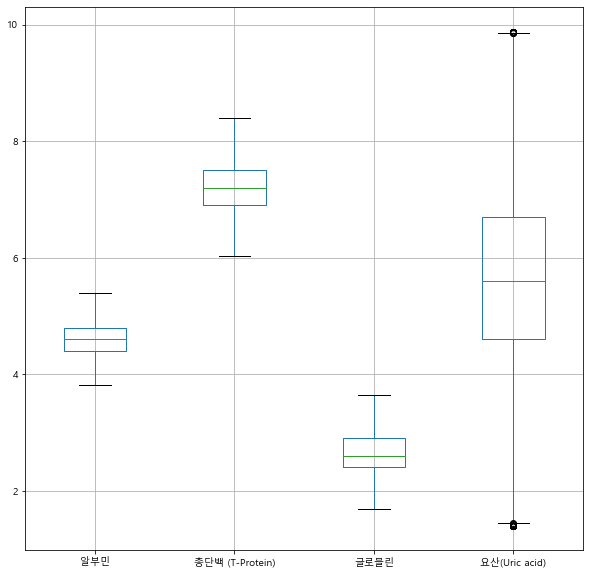

In [95]:
plt.rcParams["figure.figsize"] = (10, 10)
df_result.boxplot(column=target_cols)

In [96]:
df_result.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid)
0,2010,7282,2520,1,42,4.4,7.6,NaN,6.9
1,2010,7490,3638,1,39,4.5,6.9,2.4,5.3
2,2010,7915,3997,1,36,4.3,7.3,3.0,5.4
3,2010,8056,4745,1,42,4.7,7.2,2.5,7.5
4,2010,8457,3929,1,38,4.5,7.6,3.1,6.1


In [97]:
target_cols

['알부민', '총단백 (T-Protein)', '글로블린', '요산(Uric acid)']

In [98]:
len(target_cols)

4

In [99]:
target_cols_direction

[False, 'center', 'center', 'center']

In [100]:
def kde_col(df, cols):
    
    threshold = 100
    max_threshold = 150
    
    df_target = pd.DataFrame() # return DF
    
    # 연령대별로 sample_len개 샘플링
    tmp_data = df.groupby(['SEX', '검진당시나이']).apply(
        lambda x: x.sample(sample_len, replace=True, random_state=42))

    tmp_data.reset_index(drop=True, inplace=True)
    
    # 성연령별 모델 생성
    for sex, age in product([1, 2], range(df['검진당시나이'].min(), df['검진당시나이'].max() + 1)):    
        tmp_data2 = tmp_data[tmp_data['SEX'] == sex]
        tmp_data3 = tmp_data2[tmp_data2['검진당시나이'] == age]
        
        df_temp = df[df['SEX'] == sex]
        df_temp = df_temp[df_temp['검진당시나이'] == age]
        df_temp.reset_index(drop=True, inplace=True)
            
        df_age = pd.DataFrame()
        
        for index, col in enumerate(cols):
        
            input_data = tmp_data3[col].copy()
            
            # 결측치가 많을 때 평균을 넣게 되면 평균쪽으로 쏠림
#             try:
#                 input_data.fillna(input_data.mean().round(0), inplace=True)
#             except:                
#                 input_data.fillna(tmp_data2[col].mean().round(0), inplace=True)

            input_data.dropna(inplace = True)
                
            input_data = input_data.sort_values()
            
            if len(input_data.value_counts()) > 1:
                # kde 모델
                kde = gaussian_kde(input_data)
                result = kde(input_data)
                max_value = result.max()            

                df_col = df_temp[col].copy()
                df_col.fillna(df_col.mean().round(0), inplace=True)

                # 방향성이 있을 경우
                max_idx = result.argmax()  # 최대값의 인덱스
                std_value = input_data.iloc[max_idx] # 인덱스 최대값의 밸류값

                '''
                display print
                '''
#                 print('')
#                 print('@@ col :',col)
#                 plt.rcParams["figure.figsize"] = (5, 5)
#                 print('sex :',sex)
#                 print('age :',age)
#                 fig = plt.figure()
#                 ax = fig.add_subplot(111)
#                 x_eval = np.linspace(50, 140, num=200)
#                 ax.plot(input_data, result, 'k-')                
#                 plt.show()
#                 print('max_value: ',max_value)
#                 print('std_value: ',std_value)

                arr = []

                temp = pd.DataFrame(kde(df_col), columns=['kde'])

                if target_cols_direction[index]:
                    # center right
                    temp['trigger'] = (df_col >= std_value)
                elif target_cols_direction[index] == False:
                    # center left
                    temp['trigger'] = (df_col < std_value)

                if target_cols_direction[index] != 'center':
                    temp['output'] = [(temp['kde'].iloc[idx] / max_value) * threshold if trigger else (1 + (1 - (temp['kde'].iloc[idx] / max_value))) * threshold
                                      for idx, trigger in temp['trigger'].iteritems()]
                else:                
                    temp['output'] = [(temp['kde'].iloc[idx] / max_value) * (threshold * 1.5) for idx, value in temp['kde'].iteritems()]

    #             temp['gap'] = abs(temp['output'] - threshold)            
    #             a = 11
    #             temp['adjusted_gap'] = [np.log(temp['gap'].iloc[idx]) * a if gap> np.e else gap for idx, gap in temp['gap'].iteritems()]            
    #             temp[col + '_kde'] = [threshold - temp['adjusted_gap'].iloc[idx] if trigger else threshold + temp['adjusted_gap'].iloc[idx] for idx, trigger in temp['trigger'].iteritems()]

                temp[col + '_kde'] = temp['output']
                temp[col + '_kde'] = temp[col + '_kde'].round(2)
            else:
                temp[col + '_kde'] = threshold
            
            df_age = pd.concat([df_age, temp[col + '_kde']], axis=1)

        df_temp = pd.concat([df_temp, df_age], axis=1)
        df_target = pd.concat([df_target, df_temp])
        df_target.reset_index(drop=True, inplace=True)
    
    # Null 이면 100
    for col in target_cols:
        for idx in df_target[col][df_target[col].isnull()].index:        
            df_target.loc[idx, col + '_kde'] = threshold
            
    # 파생요소 때문에 1을 추가
    df_target['kde_mean'] = df_target.iloc[:, (5+len(cols) + 1):(5+len(cols) + 1 + len(cols))].mean('columns').round(2)
    
#     for col in target_cols:
#         df_target.drop([col + '_kde'], axis = 1, inplace = True)
    
    df_target.sort_values(by='CU_REC_ID', inplace=True)
    
    return df_target

In [101]:
import time
start = time.time()
df_target = kde_col(df_result, target_cols)
end = time.time()
print(f"{end - start:.5f} sec")

762.36262 sec


## 검진 항목 별 가중치 

In [102]:
df_target.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid),알부민_kde,총단백 (T-Protein)_kde,글로블린_kde,요산(Uric acid)_kde,kde_mean
305592,2010,609272,143,1,40,4.3,6.9,2.6,5.8,48.49,108.84,144.32,125.24,126.13
613637,2010,585711,154,1,52,4.4,7.3,NaN,6.8,80.70,145.98,100.00,116.96,120.98
515458,2010,593983,156,1,48,4.3,7.5,NaN,5.3,59.98,109.33,100.00,115.15,108.16
278935,2010,612330,185,1,39,4.5,7.3,2.8,5.2,97.65,139.82,119.01,83.94,114.26
24947,2010,645901,212,1,28,4.7,7.8,3.1,5.5,100.04,56.24,59.41,100.55,72.07


In [103]:
target_cols_kde

['알부민_kde', '총단백 (T-Protein)_kde', '글로블린_kde', '요산(Uric acid)_kde']

In [104]:
target_cols_ratio

[3, 3, 2, 2]

In [105]:
sum(target_cols_ratio)

10

In [106]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1172898 entries, 305592 to 170544
Data columns (total 14 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   검진년도                 1172898 non-null  int64  
 1   UID                  1172898 non-null  int64  
 2   CU_REC_ID            1172898 non-null  int64  
 3   SEX                  1172898 non-null  int64  
 4   검진당시나이               1172898 non-null  int64  
 5   알부민                  1070688 non-null  float64
 6   총단백 (T-Protein)      1070399 non-null  float64
 7   글로블린                 926097 non-null   float64
 8   요산(Uric acid)        1056289 non-null  float64
 9   알부민_kde              1172898 non-null  float64
 10  총단백 (T-Protein)_kde  1172898 non-null  float64
 11  글로블린_kde             1172898 non-null  float64
 12  요산(Uric acid)_kde    1172898 non-null  float64
 13  kde_mean             1172898 non-null  float64
dtypes: float64(9), int64(5)
memory usage: 134.2 MB

In [107]:
df_target['kde_mean'] = (
      (target_cols_ratio[0] * df_target[target_cols_kde[0]])
    + (target_cols_ratio[1] * df_target[target_cols_kde[1]])
    + (target_cols_ratio[2] * df_target[target_cols_kde[2]])
    + (target_cols_ratio[3] * df_target[target_cols_kde[3]])
) / sum(target_cols_ratio)

In [108]:
df_target['kde_mean'] = np.round(df_target['kde_mean'], 2)

In [109]:
target_cols

['알부민', '총단백 (T-Protein)', '글로블린', '요산(Uric acid)']

In [110]:
df_target['kde_mean'].min()

13.23

In [111]:
df_target['kde_mean'].max()

156.43

In [112]:
df_target.sort_values(by=['검진당시나이', 'SEX']).head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid),알부민_kde,총단백 (T-Protein)_kde,글로블린_kde,요산(Uric acid)_kde,kde_mean
19,2019,153543,325845,1,20,4.30,6.28,NaN,6.73,23.64,5.85,100.00,144.20,57.69
17,2019,152079,325977,1,20,4.90,7.90,NaN,8.00,129.51,36.44,100.00,71.64,84.11
41,2019,392728,325980,1,20,4.80,7.80,NaN,6.60,100.00,59.23,100.00,132.42,94.25
43,2019,438481,325982,1,20,4.80,7.40,NaN,7.60,100.00,106.82,100.00,93.32,100.71
44,2019,439691,326889,1,20,4.80,7.20,2.4,7.20,100.00,143.39,148.11,133.30,129.30
18,2019,153352,327360,1,20,4.40,7.00,2.6,5.80,32.56,119.93,117.50,92.02,87.65
13,2019,130234,328771,1,20,5.30,8.00,2.7,6.40,189.29,15.64,139.05,111.24,111.54
34,2019,339160,328877,1,20,4.80,7.00,2.2,8.00,100.00,119.93,150.00,71.64,110.31
8,2019,41096,329045,1,20,4.38,7.10,NaN,7.01,29.28,150.00,100.00,147.36,103.26
9,2019,117629,330495,1,20,5.00,7.70,2.7,6.40,149.22,77.07,139.05,111.24,117.94


In [113]:
df_target['검진당시나이'].value_counts()

40    52247
38    50449
36    48113
42    47472
39    43772
41    43518
37    42769
34    42506
32    41804
30    41045
44    40593
35    39922
43    38185
46    37343
48    36820
50    36544
31    34747
33    34724
45    33350
49    32758
47    32508
28    32487
51    32267
52    31734
29    30083
53    26104
54    23695
27    22354
26    18959
55    16909
56    15018
57    12403
58    11069
25    10189
59     8660
24     6813
60     6280
23     3233
22     2480
61     1785
62     1769
21     1257
63     1243
64     1200
20     1080
65      815
66      710
67      445
68      436
69      232
Name: 검진당시나이, dtype: int64

In [114]:
df_target.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid),알부민_kde,총단백 (T-Protein)_kde,글로블린_kde,요산(Uric acid)_kde,kde_mean
count,1.172898e+06,1.172898e+06,1.172898e+06,1.172898e+06,1.172898e+06,1.070688e+06,1.070399e+06,926097.000000,1.056289e+06,1.172898e+06,1.172898e+06,1.172898e+06,1.172898e+06,1.172898e+06
mean,2.021880e+03,5.088394e+05,1.492800e+06,1.368815e+00,4.075768e+01,4.560015e+00,7.199139e+00,2.631638,5.651041e+00,1.012115e+02,1.064765e+02,1.070061e+02,1.032853e+02,1.043647e+02
std,1.700246e+00,3.653673e+05,7.928667e+05,4.824838e-01,8.929213e+00,2.856817e-01,4.065150e-01,0.342828,1.445679e+00,3.666390e+01,3.857294e+01,3.486711e+01,4.014372e+01,2.072827e+01
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,3.810000e+00,6.030000e+00,1.680000,1.400000e+00,7.400000e-01,2.000000e-01,3.600000e-01,0.000000e+00,1.323000e+01
25%,2.021000e+03,2.213390e+05,6.817402e+05,1.000000e+00,3.400000e+01,4.400000e+00,6.900000e+00,2.400000,4.600000e+00,8.534000e+01,8.454000e+01,9.878000e+01,7.831000e+01,9.302000e+01
50%,2.022000e+03,3.806040e+05,1.414744e+06,1.000000e+00,4.000000e+01,4.600000e+00,7.200000e+00,2.600000,5.600000e+00,1.000000e+02,1.131000e+02,1.051600e+02,1.082700e+02,1.053900e+02
75%,2.023000e+03,8.362908e+05,2.174115e+06,2.000000e+00,4.800000e+01,4.800000e+00,7.500000e+00,2.900000,6.700000e+00,1.166600e+02,1.405600e+02,1.372000e+02,1.395400e+02,1.198100e+02
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,5.390000e+00,8.390000e+00,3.650000,9.880000e+00,1.999100e+02,1.508500e+02,1.534700e+02,1.503000e+02,1.564300e+02


<AxesSubplot:>

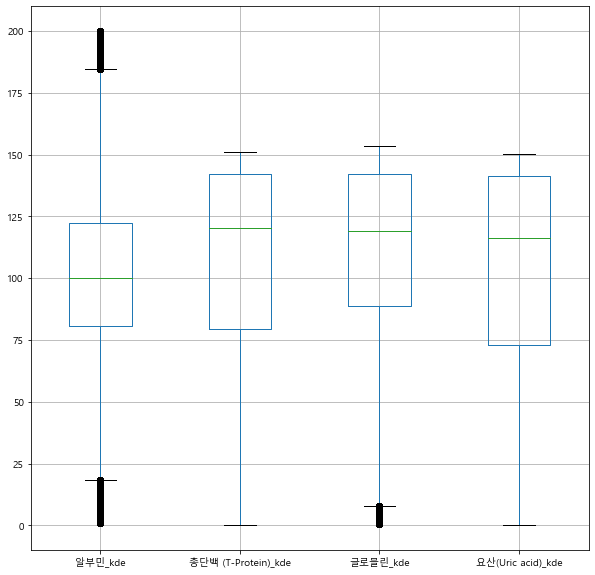

In [115]:
plt.rcParams["figure.figsize"] = (10, 10)
df_boxplot = df_target.copy()
df_boxplot.replace(100, np.NaN, inplace=True)
df_boxplot.boxplot(column=target_cols_kde)

<AxesSubplot:>

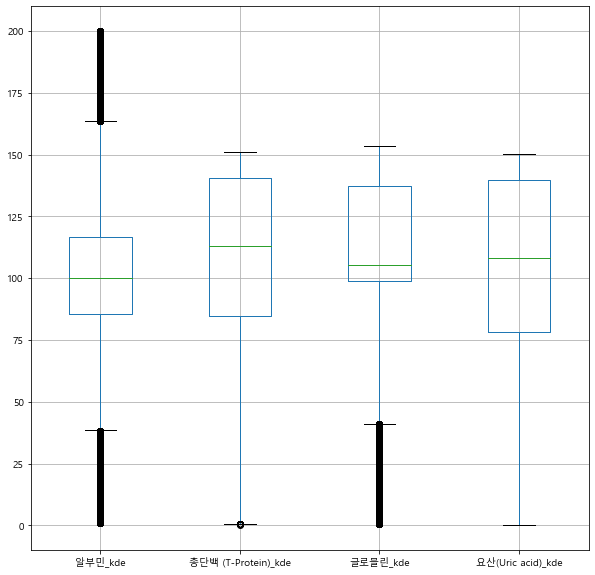

In [116]:
plt.rcParams["figure.figsize"] = (10, 10)
df_boxplot = df_target.copy()
df_boxplot.boxplot(column=target_cols_kde)

## target Scaling

In [117]:
df_target['kde_mean'].max()

156.43

In [118]:
df_target['kde_mean'].min()

13.23

In [119]:
# df_target['target'] = ((df_target['kde_mean'] - df_target['kde_mean'].min()) / (df_target['kde_mean'].max() - df_target['kde_mean'].min()))
df_target['target'] = ((df_target['kde_mean'] - 0) / (200 - 0))

In [120]:
df_target['target'] = (df_target['target'] * 100) + 50

In [121]:
df_target['target'] = df_target['target'].round(0)

In [122]:
df_target['target'].value_counts().reset_index().sort_values('index')

,index,target
69,57.0,7
68,58.0,16
67,59.0,22
65,60.0,59
64,61.0,71
63,62.0,106
61,63.0,169
60,64.0,194
59,65.0,240
58,66.0,378


In [123]:
df_target.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid),알부민_kde,총단백 (T-Protein)_kde,글로블린_kde,요산(Uric acid)_kde,kde_mean,target
count,1.172898e+06,1.172898e+06,1.172898e+06,1.172898e+06,1.172898e+06,1.070688e+06,1.070399e+06,926097.000000,1.056289e+06,1.172898e+06,1.172898e+06,1.172898e+06,1.172898e+06,1.172898e+06,1.172898e+06
mean,2.021880e+03,5.088394e+05,1.492800e+06,1.368815e+00,4.075768e+01,4.560015e+00,7.199139e+00,2.631638,5.651041e+00,1.012115e+02,1.064765e+02,1.070061e+02,1.032853e+02,1.043647e+02,1.021818e+02
std,1.700246e+00,3.653673e+05,7.928667e+05,4.824838e-01,8.929213e+00,2.856817e-01,4.065150e-01,0.342828,1.445679e+00,3.666390e+01,3.857294e+01,3.486711e+01,4.014372e+01,2.072827e+01,1.036768e+01
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,3.810000e+00,6.030000e+00,1.680000,1.400000e+00,7.400000e-01,2.000000e-01,3.600000e-01,0.000000e+00,1.323000e+01,5.700000e+01
25%,2.021000e+03,2.213390e+05,6.817402e+05,1.000000e+00,3.400000e+01,4.400000e+00,6.900000e+00,2.400000,4.600000e+00,8.534000e+01,8.454000e+01,9.878000e+01,7.831000e+01,9.302000e+01,9.700000e+01
50%,2.022000e+03,3.806040e+05,1.414744e+06,1.000000e+00,4.000000e+01,4.600000e+00,7.200000e+00,2.600000,5.600000e+00,1.000000e+02,1.131000e+02,1.051600e+02,1.082700e+02,1.053900e+02,1.030000e+02
75%,2.023000e+03,8.362908e+05,2.174115e+06,2.000000e+00,4.800000e+01,4.800000e+00,7.500000e+00,2.900000,6.700000e+00,1.166600e+02,1.405600e+02,1.372000e+02,1.395400e+02,1.198100e+02,1.100000e+02
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,5.390000e+00,8.390000e+00,3.650000,9.880000e+00,1.999100e+02,1.508500e+02,1.534700e+02,1.503000e+02,1.564300e+02,1.280000e+02


<AxesSubplot:>

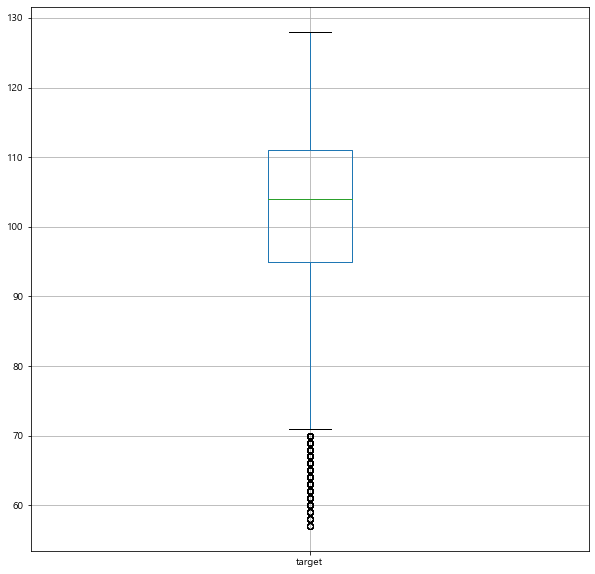

In [124]:
plt.rcParams["figure.figsize"] = (10, 10)
df_boxplot = df_target.copy()
df_boxplot.replace(100, np.NaN, inplace=True)
df_boxplot.boxplot(column=['target'])

<AxesSubplot:>

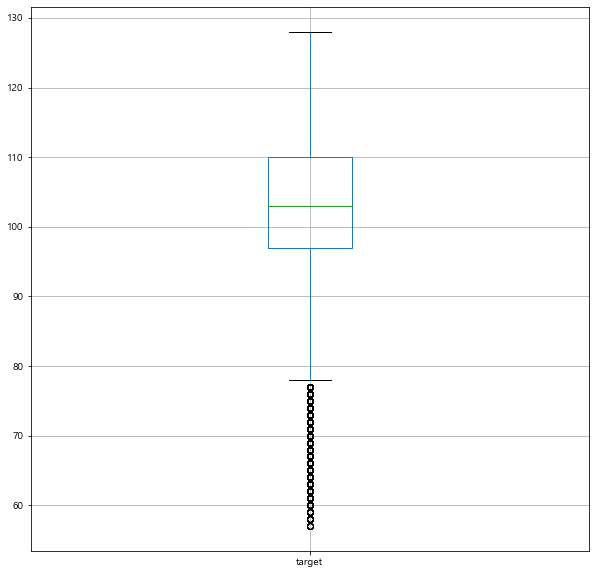

In [125]:
plt.rcParams["figure.figsize"] = (10, 10)
df_boxplot = df_target.copy()
# df_boxplot.replace(100, np.NaN, inplace=True)
df_boxplot.boxplot(column=['target'])

<AxesSubplot:>

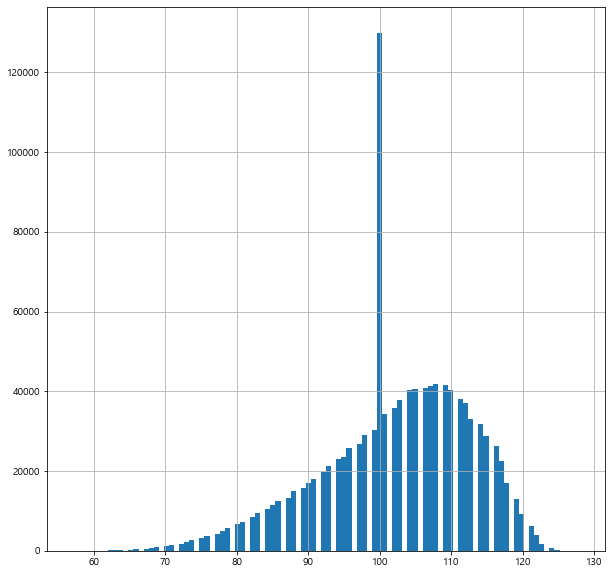

In [126]:
df_boxplot['target'].hist(bins=100)

In [127]:
df_target.head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid),알부민_kde,총단백 (T-Protein)_kde,글로블린_kde,요산(Uric acid)_kde,kde_mean,target
305592,2010,609272,143,1,40,4.3,6.9,2.6,5.8,48.49,108.84,144.32,125.24,101.11,101.0
613637,2010,585711,154,1,52,4.4,7.3,NaN,6.8,80.70,145.98,100.00,116.96,111.40,106.0
515458,2010,593983,156,1,48,4.3,7.5,NaN,5.3,59.98,109.33,100.00,115.15,93.82,97.0
278935,2010,612330,185,1,39,4.5,7.3,2.8,5.2,97.65,139.82,119.01,83.94,111.83,106.0
24947,2010,645901,212,1,28,4.7,7.8,3.1,5.5,100.04,56.24,59.41,100.55,78.88,89.0
781759,2010,710490,213,2,28,4.5,7.8,3.3,2.6,99.99,58.63,24.51,10.84,54.66,77.0
446623,2010,491012,226,1,45,4.4,7.6,3.2,7.4,73.31,98.26,39.53,99.64,79.30,90.0
743710,2010,315847,230,2,23,4.5,7.6,3.1,5.5,94.37,77.17,65.58,105.30,85.64,93.0
746042,2010,719072,231,2,24,4.8,8.3,3.5,4.9,118.95,4.45,9.70,139.07,66.77,83.0
248730,2010,614169,238,1,38,4.5,7.8,3.3,6.8,90.76,53.55,18.77,144.41,75.93,88.0


## target 계산 결과

<AxesSubplot:xlabel='검진당시나이'>

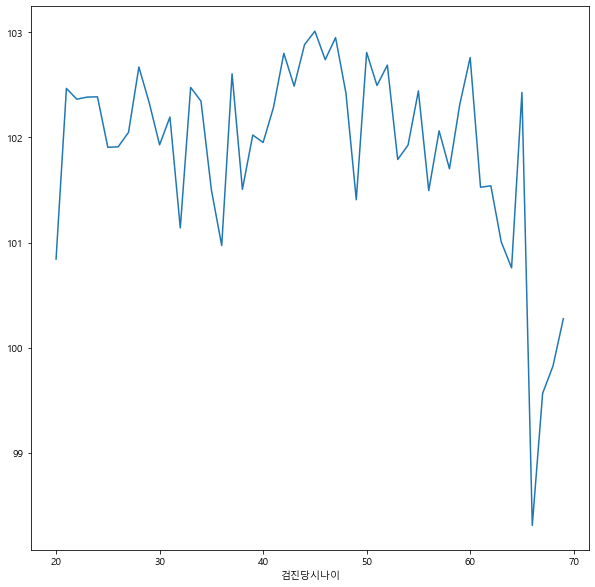

In [128]:
plt.rcParams["figure.figsize"] = (10, 10)
df_target.groupby('검진당시나이').mean()['target'].plot()

<AxesSubplot:xlabel='검진당시나이'>

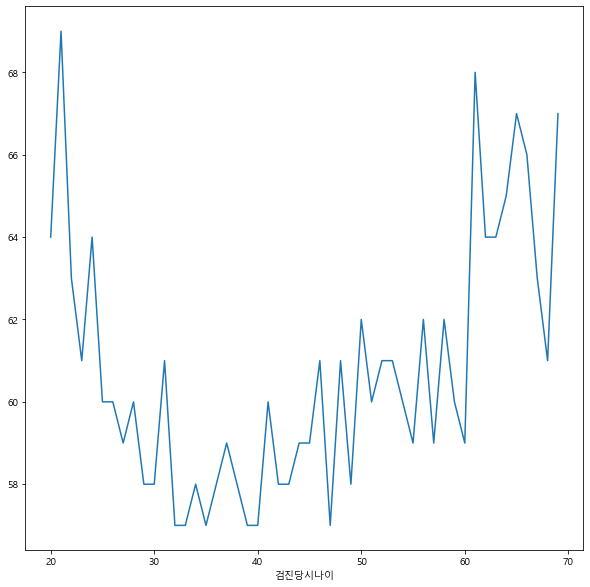

In [129]:
plt.rcParams["figure.figsize"] = (10, 10)
df_target.groupby('검진당시나이').min()['target'].plot()

<AxesSubplot:xlabel='검진당시나이'>

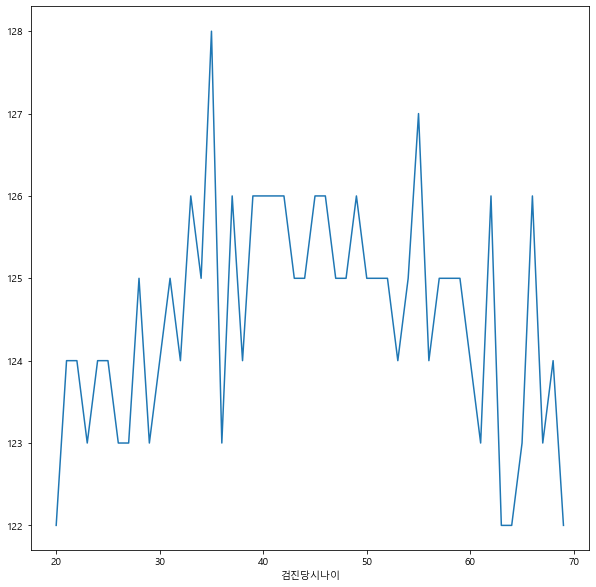

In [130]:
plt.rcParams["figure.figsize"] = (10, 10)
df_target.groupby('검진당시나이').max()['target'].plot()

In [131]:
df_target.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid),알부민_kde,총단백 (T-Protein)_kde,글로블린_kde,요산(Uric acid)_kde,kde_mean,target
305592,2010,609272,143,1,40,4.3,6.9,2.6,5.8,48.49,108.84,144.32,125.24,101.11,101.0
613637,2010,585711,154,1,52,4.4,7.3,NaN,6.8,80.70,145.98,100.00,116.96,111.40,106.0
515458,2010,593983,156,1,48,4.3,7.5,NaN,5.3,59.98,109.33,100.00,115.15,93.82,97.0
278935,2010,612330,185,1,39,4.5,7.3,2.8,5.2,97.65,139.82,119.01,83.94,111.83,106.0
24947,2010,645901,212,1,28,4.7,7.8,3.1,5.5,100.04,56.24,59.41,100.55,78.88,89.0


# 결측행 제거

In [132]:
# df_result.dropna(axis=0).info()

In [133]:
# df_result.dropna(axis=0, inplace=True)

# 남성 모델

In [134]:
df_target['SEX'].value_counts()

1    740316
2    432582
Name: SEX, dtype: int64

In [135]:
df_man = df_target[df_target['SEX'] == 1]
len(df_man)

740316

In [136]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid),알부민_kde,총단백 (T-Protein)_kde,글로블린_kde,요산(Uric acid)_kde,kde_mean,target
305592,2010,609272,143,1,40,4.3,6.9,2.6,5.8,48.49,108.84,144.32,125.24,101.11,101.0
613637,2010,585711,154,1,52,4.4,7.3,NaN,6.8,80.70,145.98,100.00,116.96,111.40,106.0
515458,2010,593983,156,1,48,4.3,7.5,NaN,5.3,59.98,109.33,100.00,115.15,93.82,97.0
278935,2010,612330,185,1,39,4.5,7.3,2.8,5.2,97.65,139.82,119.01,83.94,111.83,106.0
24947,2010,645901,212,1,28,4.7,7.8,3.1,5.5,100.04,56.24,59.41,100.55,78.88,89.0


# 결측치 처리

## 결측치 삭제

In [137]:
# df_man.dropna(inplace=True)

In [138]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid),알부민_kde,총단백 (T-Protein)_kde,글로블린_kde,요산(Uric acid)_kde,kde_mean,target
305592,2010,609272,143,1,40,4.3,6.9,2.6,5.8,48.49,108.84,144.32,125.24,101.11,101.0
613637,2010,585711,154,1,52,4.4,7.3,NaN,6.8,80.70,145.98,100.00,116.96,111.40,106.0
515458,2010,593983,156,1,48,4.3,7.5,NaN,5.3,59.98,109.33,100.00,115.15,93.82,97.0
278935,2010,612330,185,1,39,4.5,7.3,2.8,5.2,97.65,139.82,119.01,83.94,111.83,106.0
24947,2010,645901,212,1,28,4.7,7.8,3.1,5.5,100.04,56.24,59.41,100.55,78.88,89.0


## 결측치 평균으로 대체

In [139]:
# 결측치를 평균으로 대체 하는 함수
# fill_mean_func = lambda g: g.fillna(g.mean().round(2))

In [140]:
# 나이로 group by, 결측치를 평균으로 대체
# df_man = df_man.groupby('검진당시나이').apply(fill_mean_func)

## 검진 항목 all 결측치 지우기

In [141]:
target_cols

['알부민', '총단백 (T-Protein)', '글로블린', '요산(Uric acid)']

In [142]:
len(df_man)

740316

In [143]:
df_man.dropna(subset=target_cols, how='all', inplace=True)

In [144]:
len(df_man)

681212

In [145]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid),알부민_kde,총단백 (T-Protein)_kde,글로블린_kde,요산(Uric acid)_kde,kde_mean,target
305592,2010,609272,143,1,40,4.3,6.9,2.6,5.8,48.49,108.84,144.32,125.24,101.11,101.0
613637,2010,585711,154,1,52,4.4,7.3,NaN,6.8,80.70,145.98,100.00,116.96,111.40,106.0
515458,2010,593983,156,1,48,4.3,7.5,NaN,5.3,59.98,109.33,100.00,115.15,93.82,97.0
278935,2010,612330,185,1,39,4.5,7.3,2.8,5.2,97.65,139.82,119.01,83.94,111.83,106.0
24947,2010,645901,212,1,28,4.7,7.8,3.1,5.5,100.04,56.24,59.41,100.55,78.88,89.0


## fillna

In [146]:
df_man.mean().round(2)

검진년도                      2022.00
UID                     509430.92
CU_REC_ID              1477726.95
SEX                          1.00
검진당시나이                      42.27
알부민                          4.60
총단백 (T-Protein)              7.22
글로블린                         2.61
요산(Uric acid)                6.31
알부민_kde                    100.79
총단백 (T-Protein)_kde        106.52
글로블린_kde                   107.18
요산(Uric acid)_kde          103.87
kde_mean                   104.40
target                     102.20
dtype: float64

In [147]:
df_man.fillna(df_man.mean().round(2), inplace=True)

In [148]:
# df_man.fillna(0, inplace=True)

## IterativeImputer

In [149]:
# df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(df_target))
# df_impute.columns = df.columns
# df_target = df_impute

## MICE(Multivariate Imputation by Chained Equation) Imputation

In [150]:
# import time
# start = time.time()
# np_imputed = mice(df_man.values) # mice 학습시작
# df_man = pd.DataFrame(np_imputed)
# end = time.time()
# print(f"{end - start:.5f} sec")

# 중복 제거

In [151]:
len(df_man)

681212

In [152]:
len(df_man)

681212

In [153]:
# 동일한 검진년도에 중복건을 제외하기 위해서 sort value 한다음 중복시 첫 번째것만 남겨둠
df_man.sort_values(by=['UID', '검진년도', 'CU_REC_ID'], ascending=[True, True, False], inplace=True)

In [154]:
df_man.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid),알부민_kde,총단백 (T-Protein)_kde,글로블린_kde,요산(Uric acid)_kde,kde_mean,target
2329,2011,32,11757,1,24,4.6,6.9,2.30,4.5,99.71,123.83,106.96,35.95,95.64,98.0
637660,2019,50,356493,1,53,4.0,6.8,2.80,5.1,15.75,103.31,117.98,110.99,81.51,91.0
678833,2021,50,642497,1,55,4.2,6.9,2.70,5.3,47.80,128.89,142.64,121.63,105.86,103.0
306203,2019,62,421626,1,40,4.7,7.6,2.90,4.6,100.00,110.54,106.22,50.37,94.48,97.0
340331,2020,62,565527,1,41,4.5,7.4,2.90,4.6,94.74,132.45,113.17,42.35,99.26,100.0
371425,2021,62,699357,1,42,4.4,7.0,2.60,5.1,81.32,133.10,144.56,85.62,110.36,105.0
403068,2022,62,1356310,1,43,4.8,7.2,2.40,4.5,124.80,142.59,130.95,46.65,115.74,108.0
434800,2023,62,2170394,1,44,4.4,7.5,3.10,5.1,85.51,114.12,62.72,89.12,90.26,95.0
590023,2019,67,410099,1,51,4.1,6.7,2.61,6.1,32.92,82.41,100.00,149.54,84.51,92.0
615875,2020,67,481109,1,52,4.2,6.9,2.61,6.6,47.15,130.30,100.00,133.42,99.92,100.0


In [155]:
len(df_man)

681212

In [156]:
df_man[target_cols]

,알부민,총단백 (T-Protein),글로블린,요산(Uric acid)
2329,4.6,6.9,2.3,4.5
637660,4.0,6.8,2.8,5.1
678833,4.2,6.9,2.7,5.3
306203,4.7,7.6,2.9,4.6
340331,4.5,7.4,2.9,4.6
...,...,...,...,...
738774,5.0,6.8,1.8,5.8
738773,5.0,6.8,1.8,5.8
52188,4.8,7.4,2.6,6.6
11995,5.1,8.0,2.9,7.4


## first만 남겨두고 중복 제거

In [157]:
df_man = df_man.drop_duplicates(subset=['UID', '검진년도'], keep='first')

In [158]:
len(df_man)

573898

In [159]:
df_man.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid),알부민_kde,총단백 (T-Protein)_kde,글로블린_kde,요산(Uric acid)_kde,kde_mean,target
2329,2011,32,11757,1,24,4.6,6.9,2.30,4.5,99.71,123.83,106.96,35.95,95.64,98.0
637660,2019,50,356493,1,53,4.0,6.8,2.80,5.1,15.75,103.31,117.98,110.99,81.51,91.0
678833,2021,50,642497,1,55,4.2,6.9,2.70,5.3,47.80,128.89,142.64,121.63,105.86,103.0
306203,2019,62,421626,1,40,4.7,7.6,2.90,4.6,100.00,110.54,106.22,50.37,94.48,97.0
340331,2020,62,565527,1,41,4.5,7.4,2.90,4.6,94.74,132.45,113.17,42.35,99.26,100.0
371425,2021,62,699357,1,42,4.4,7.0,2.60,5.1,81.32,133.10,144.56,85.62,110.36,105.0
403068,2022,62,1356310,1,43,4.8,7.2,2.40,4.5,124.80,142.59,130.95,46.65,115.74,108.0
434800,2023,62,2170394,1,44,4.4,7.5,3.10,5.1,85.51,114.12,62.72,89.12,90.26,95.0
590023,2019,67,410099,1,51,4.1,6.7,2.61,6.1,32.92,82.41,100.00,149.54,84.51,92.0
615875,2020,67,481109,1,52,4.2,6.9,2.61,6.6,47.15,130.30,100.00,133.42,99.92,100.0


In [160]:
df_man.reset_index(drop=True, inplace=True)

In [161]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid),알부민_kde,총단백 (T-Protein)_kde,글로블린_kde,요산(Uric acid)_kde,kde_mean,target
0,2011,32,11757,1,24,4.6,6.9,2.3,4.5,99.71,123.83,106.96,35.95,95.64,98.0
1,2019,50,356493,1,53,4.0,6.8,2.8,5.1,15.75,103.31,117.98,110.99,81.51,91.0
2,2021,50,642497,1,55,4.2,6.9,2.7,5.3,47.80,128.89,142.64,121.63,105.86,103.0
3,2019,62,421626,1,40,4.7,7.6,2.9,4.6,100.00,110.54,106.22,50.37,94.48,97.0
4,2020,62,565527,1,41,4.5,7.4,2.9,4.6,94.74,132.45,113.17,42.35,99.26,100.0


In [162]:
df_man.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573898 entries, 0 to 573897
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   검진년도                 573898 non-null  int64  
 1   UID                  573898 non-null  int64  
 2   CU_REC_ID            573898 non-null  int64  
 3   SEX                  573898 non-null  int64  
 4   검진당시나이               573898 non-null  int64  
 5   알부민                  573898 non-null  float64
 6   총단백 (T-Protein)      573898 non-null  float64
 7   글로블린                 573898 non-null  float64
 8   요산(Uric acid)        573898 non-null  float64
 9   알부민_kde              573898 non-null  float64
 10  총단백 (T-Protein)_kde  573898 non-null  float64
 11  글로블린_kde             573898 non-null  float64
 12  요산(Uric acid)_kde    573898 non-null  float64
 13  kde_mean             573898 non-null  float64
 14  target               573898 non-null  float64
dtypes: float64(10), i

# 연령별 개수 현황(검진당시나이)

<AxesSubplot:xlabel='index'>

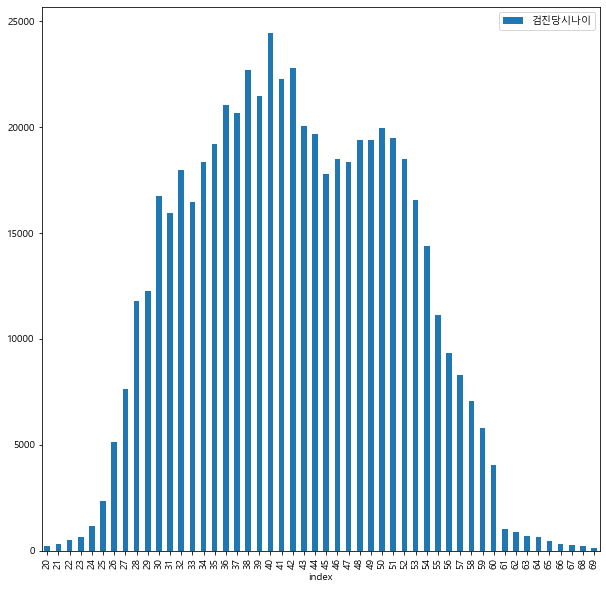

In [163]:
df_man['검진당시나이'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='검진당시나이')

In [164]:
df_man['검진당시나이'].value_counts().reset_index().sort_values('index')

,index,검진당시나이
48,20,199
45,21,294
42,22,487
40,23,651
36,24,1169
35,25,2316
33,26,5123
30,27,7625
26,28,11766
25,29,12269


# 검진항목 시각화

In [165]:
df_man.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid),알부민_kde,총단백 (T-Protein)_kde,글로블린_kde,요산(Uric acid)_kde,kde_mean,target
count,573898.000000,5.738980e+05,5.738980e+05,573898.0,573898.000000,573898.000000,573898.00000,573898.000000,573898.000000,573898.000000,573898.000000,573898.000000,573898.000000,573898.000000,573898.000000
mean,2021.945938,5.050065e+05,1.473139e+06,1.0,42.230307,4.599180,7.22339,2.616471,6.316680,100.197468,106.291202,106.956216,103.782486,104.094330,102.047233
std,1.645333,3.605673e+05,8.171804e+05,0.0,8.810686,0.278903,0.40272,0.315418,1.246121,38.327209,40.357675,35.876303,41.735175,21.552467,10.780054
min,2010.000000,3.200000e+01,1.430000e+02,1.0,20.000000,3.820000,6.03000,1.680000,1.400000,0.740000,0.200000,0.850000,0.000000,13.390000,57.000000
25%,2021.000000,2.218765e+05,6.395962e+05,1.0,35.000000,4.400000,6.90000,2.400000,5.500000,81.320000,78.500000,96.010000,74.590000,90.520000,95.000000
50%,2022.000000,3.800560e+05,1.383197e+06,1.0,42.000000,4.600000,7.20000,2.610000,6.300000,100.000000,119.300000,106.530000,115.060000,107.160000,104.000000
75%,2023.000000,8.290380e+05,2.188167e+06,1.0,49.000000,4.800000,7.50000,2.800000,7.100000,118.910000,141.360000,139.070000,141.210000,120.230000,110.000000
max,2024.000000,1.473602e+06,2.871357e+06,1.0,69.000000,5.390000,8.39000,3.650000,9.880000,199.020000,150.630000,153.470000,150.290000,152.180000,126.000000


<AxesSubplot:xlabel='검진당시나이'>

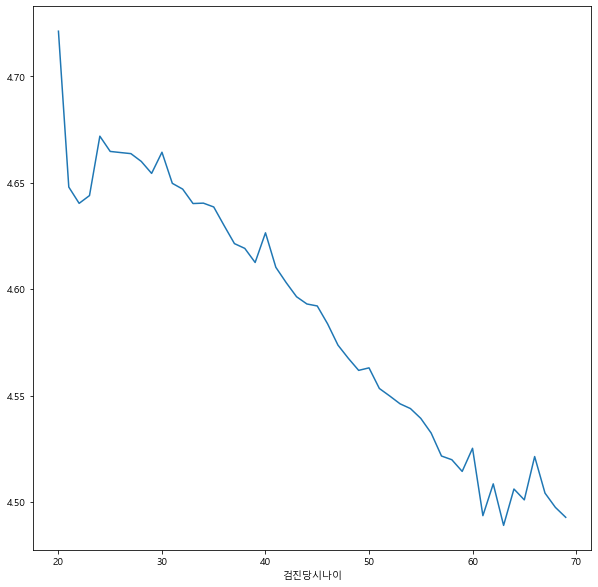

In [166]:
df_man.groupby('검진당시나이').mean()[target_cols[0]].plot()

<AxesSubplot:xlabel='검진당시나이'>

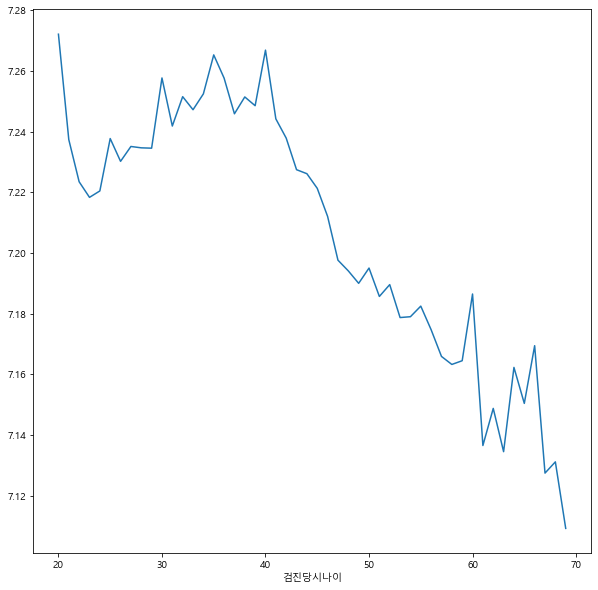

In [167]:
df_man.groupby('검진당시나이').mean()[target_cols[1]].plot()

In [168]:
# df_man.groupby('검진당시나이').mean()[target_cols[2]].plot()

<AxesSubplot:xlabel='검진당시나이', ylabel='target'>

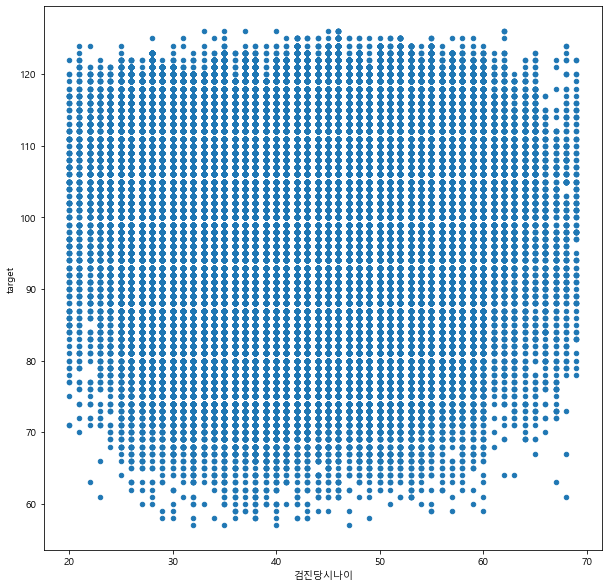

In [169]:
df_man.plot.scatter(x='검진당시나이', y='target')

# 건강지수 Sampling

<AxesSubplot:xlabel='index'>

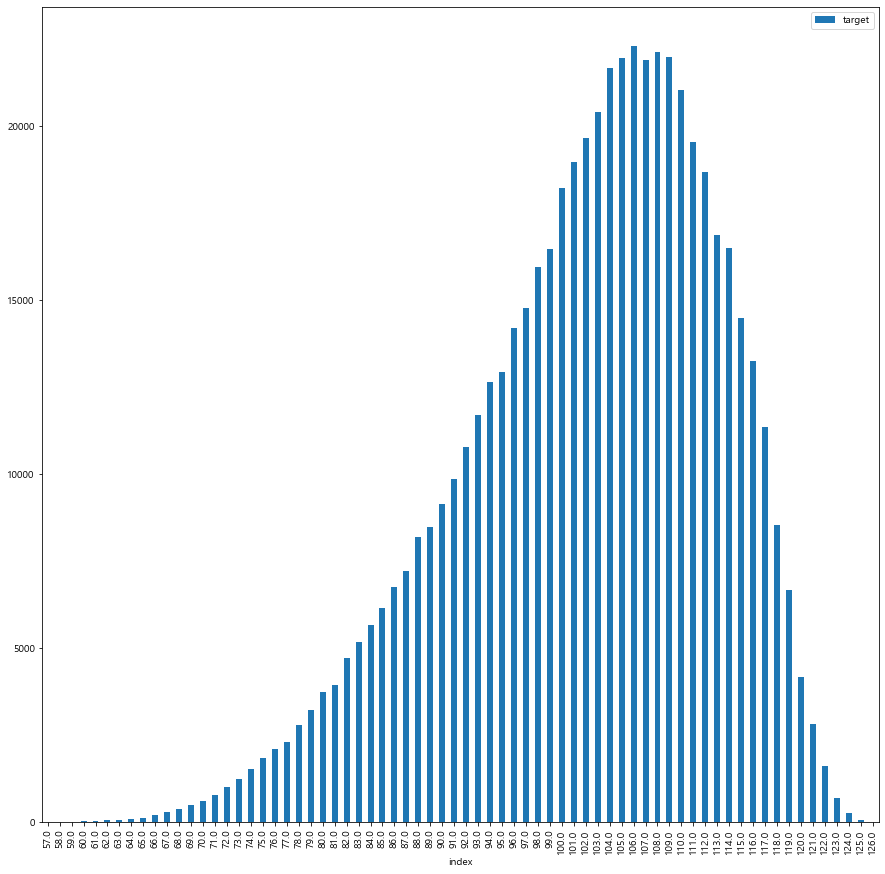

In [170]:
plt.rcParams["figure.figsize"] = (15, 15)
df_man['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [171]:
df_man['target'].value_counts().reset_index().sort_values('index')

,index,target
69,57.0,4
68,58.0,14
66,59.0,18
65,60.0,30
64,61.0,41
63,62.0,63
61,63.0,84
60,64.0,110
59,65.0,124
58,66.0,212


In [172]:
df_man_sampling = pd.DataFrame()

# for target in range(int(df_man['target'].min()), 100):
for target in range(50, 100):
    
#     print(target, 200 - target)
    left_len = len(df_man[df_man['target'] == target])
    right_len = len(df_man[df_man['target'] == (200 - target)])
    
#     print(target, left_len, right_len)
    
    if left_len >= right_len:
        if left_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == target].sample(left_len, replace=True, random_state=87)])
        if right_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == (200 - target)].sample(left_len, replace=True, random_state=87)])
    else:
        if left_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == target].sample(right_len, replace=True, random_state=87)])
        if right_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == (200 - target)].sample(right_len, replace=True, random_state=87)])   

df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == 100]])                    

In [173]:
# df_man = df_man_sampling.copy()

<AxesSubplot:xlabel='index'>

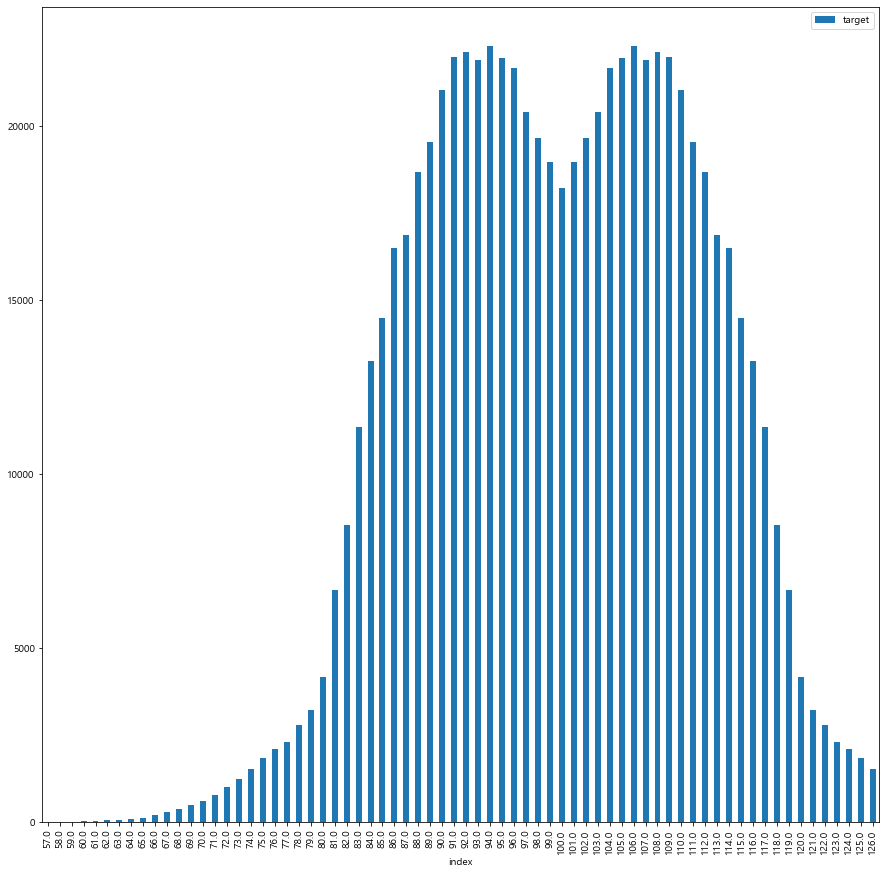

In [174]:
plt.rcParams["figure.figsize"] = (15, 15)
df_man_sampling['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [175]:
df_man_sampling['target'].value_counts().reset_index().sort_values('index')

,index,target
69,57.0,4
68,58.0,14
67,59.0,18
66,60.0,30
65,61.0,41
64,62.0,63
63,63.0,84
62,64.0,110
61,65.0,124
60,66.0,212


# 나이별 확인하기

In [176]:
# target = 'target'

In [177]:
# df_man_sample = None
                 
# for idx in range(int(df_man[target].min()), int(df_man[target].max() + 1)):    
#     if len(df_man[df_man[target] == idx]) > 0:
#         temp_ = df_man[df_man[target] == idx].sample(n = sample_len, replace=True)
# #     df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(temp))
# #     print(df_impute.columns)
# #     df_impute.columns = df_man.columns
    
# #     np_imputed = mice(temp.values)
# #     np_imputed = fast_knn(temp.values, k=5)
# #     df_impute = pd.DataFrame(np_immputed)
# #     temp = df_impute
    
#         df_man_sample = pd.concat([df_man_sample, temp_])

# df_man_sample.sample(frac=1).reset_index(drop=True, inplace=True)

In [178]:
# df_man = df_man_sample

In [179]:
# int(df_man['검진당시나이'].value_counts().mean())

In [180]:
# df_man['검진당시나이'].min()

In [181]:
# df_man['검진당시나이'].max()

In [182]:
# df_man.columns

In [183]:
# df_temp = None
# # sample_len = int(df_man['검진당시나이'].value_counts().mean())
# # sample_len = 1000
                 
# for age in range(df_man['검진당시나이'].min(), df_man['검진당시나이'].max()):
#     temp_ = df_man[df_man['검진당시나이'] == age].sample(n = sample_len, replace=True)
# #     df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(temp))
# #     print(df_impute.columns)
# #     df_impute.columns = df_man.columns
    
# #     np_imputed = mice(temp.values)
# #     np_imputed = fast_knn(temp.values, k=5)
# #     df_impute = pd.DataFrame(np_immputed)
# #     temp = df_impute
    
#     df_temp = pd.concat([df_temp, temp_])

In [184]:
# df_temp.info()

In [185]:
# df_temp.reset_index(drop=True, inplace=True)

In [186]:
# df_man = df_temp.copy()

In [187]:
# df_man['검진당시나이'].value_counts()

In [188]:
# df_man[df_man['검진당시나이']==38]

In [189]:
# df_man[df_man['검진당시나이']==38]['UID'].value_counts()

# model train

In [190]:
df_man.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '알부민', '총단백 (T-Protein)',
       '글로블린', '요산(Uric acid)', '알부민_kde', '총단백 (T-Protein)_kde', '글로블린_kde',
       '요산(Uric acid)_kde', 'kde_mean', 'target'],
      dtype='object')

In [191]:
# train_columns = [
# #                '체중', '신장', '허리둘레', '체질량지수(BMI)',
#                'AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)', # 해독기능
#                '총빌리루빈', '직접빌리루빈', '간접빌리루빈', # 배설기능
#                  ]

In [192]:
target_cols

['알부민', '총단백 (T-Protein)', '글로블린', '요산(Uric acid)']

In [193]:
train_columns = target_cols.copy()

In [194]:
train_columns.insert(0, '검진당시나이')

In [195]:
target_cols

['알부민', '총단백 (T-Protein)', '글로블린', '요산(Uric acid)']

In [196]:
train_columns

['검진당시나이', '알부민', '총단백 (T-Protein)', '글로블린', '요산(Uric acid)']

In [197]:
target_col = 'target'

## Min Max Scaling

In [198]:
from sklearn.preprocessing import MinMaxScaler

In [199]:
scaling_bool

False

In [200]:
if scaling_bool:
    scaler = MinMaxScaler()
    data_scaler = scaler.fit_transform(df_man_sampling[train_columns])
    df_man_scaled = pd.DataFrame(data=data_scaler, columns=train_columns)

## train_test_split

In [201]:
if scaling_bool:
    X_train, X_test, y_train, y_test = train_test_split(df_man_scaled[train_columns], df_man_sampling[target_col], test_size=0.25, random_state=87)
else :
    X_train, X_test, y_train, y_test = train_test_split(df_man_sampling[train_columns], df_man_sampling[target_col], test_size=0.25, random_state=87)

## Linear Regression

In [202]:
# model = LinearRegression()

In [203]:
# model.fit(X_train, y_train)

In [204]:
# model.intercept_

In [205]:
# model.coef_

## Randomized SearchCV, 파라미터 튜닝

In [206]:
model = XGBRegressor()

In [207]:
# A parameter grid for XGBoost
params = {
    'n_estimators':[500],
#     'min_child_weight':[4,5], 
#     'gamma':[i/10.0 for i in range(3,6)],  
#     'subsample':[i/10.0 for i in range(6,11)],
#     'colsample_bytree':[i/10.0 for i in range(6,11)], 
#     'max_depth': [2,3,4,6,7],
    'objective': ['reg:squarederror', 'reg:tweedie'],
    'booster': ['gbtree', 'gblinear'],
    'eval_metric': ['rmse'],
    'eta': [i/10.0 for i in range(3,6)],
}

In [208]:
# run randomized search
n_iter_search = 10

random_search = RandomizedSearchCV(model, param_distributions=params,
                                   n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error')

In [209]:
import time
start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search)) # best parameter

RandomizedSearchCV took 2895.36 seconds for 10 candidates parameter settings.


In [210]:
# best parameter
random_search.best_params_

{'objective': 'reg:tweedie',
 'n_estimators': 500,
 'eval_metric': 'rmse',
 'eta': 0.5,
 'booster': 'gbtree'}

In [211]:
# best score
random_search.best_score_

-0.21750727064673786

In [212]:
model = random_search.best_estimator_
model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.5,
             eval_metric='rmse', gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.5, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=8,
             num_parallel_tree=1, objective='reg:tweedie', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

## Keras

In [213]:
# def build_model():
#     model = keras.Sequential([
#         layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
#         layers.Dense(64, activation='relu'),
#         layers.Dense(16, activation='relu'),
#         layers.Dense(4, activation='relu'),
#         layers.Dense(1)
#     ])

#     optimizer = keras.optimizers.RMSprop(0.001)
    
#     model.compile(loss='mse',
#                 optimizer=optimizer,
#                 metrics=['mae', 'mse'])
    
#     return model

In [214]:
# model = build_model()

In [215]:
# # 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
# class PrintDot(keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs):
#         if epoch % 10 == 0: print('')
#         print('.', end='')

# EPOCHS = 100

# # patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
# early_stop = EarlyStopping(monitor='val_loss', patience=10)

# history = model.fit(
#     X_train, y_train,
#     epochs=EPOCHS, validation_split=0.2, verbose=0,
#     callbacks=[early_stop, PrintDot()])
# #     callbacks=[PrintDot()])

In [216]:
# model.summary()

In [217]:
# hist = pd.DataFrame(history.history)
# hist['epoch'] = history.epoch
# hist.tail()

In [218]:
# def plot_history(history):
#     hist = pd.DataFrame(history.history)
#     hist['epoch'] = history.epoch

#     plt.figure(figsize=(8,12))

#     plt.subplot(2,1,1)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Abs Error [MPG]')
#     plt.plot(hist['epoch'], hist['mae'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
# #     plt.ylim([0,5])
#     plt.legend()

#     plt.subplot(2,1,2)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Square Error [$MPG^2$]')
#     plt.plot(hist['epoch'], hist['mse'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
# #     plt.ylim([0,20])
#     plt.legend()
#     plt.show()

In [219]:
# plot_history(history)

## pyTorch 신경망

In [220]:
np.shape(X_train)[1]

5

In [221]:
# class Regressor(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.fc1 = nn.Linear(np.shape(X_train)[1], 100) #첫 번째 레이어 
#         self.fc2 = nn.Linear(100, 50) #두 번째 레이어
#         self.fc3 = nn.Linear(50, 1) #출력 레이어 
# #         self.dropout = nn.Dropout(0.5) #연산 마다 50%의 노드를 랜덤하게 없앤다
# #         self.relu = nn.ReLU()
        
#     def forward(self, x):
#         x = F.relu(self.fc1(x)) #활성화 함수 적용                 
# #         x = self.dropout(F.relu(self.fc2(x))) #은닉층에서 전달할 때, 50% 를 dropout 
#         x = F.relu(self.fc2(x)) #활성화 함수 적용 
#         x = F.relu(self.fc3(x))
# #         x = self.fc1(x)
# #         x = self.fc2(x)
# #         x = self.fc3(x)
# #         x = self.relu(x)
#         return x

In [222]:
# model = Regressor()
# reg_loss = nn.MSELoss()
# # optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-7)
# optimizer = optim.Adam(model.parameters(), lr=0.001)

In [223]:
# epochs = 1000

In [224]:
# X_train  = torch.Tensor(X_train.to_numpy())
# X_test  = torch.Tensor(X_test.to_numpy())
# y_train  = torch.Tensor(y_train.to_numpy().reshape(-1, 1))
# y_test  = torch.Tensor(y_test.to_numpy().reshape(-1, 1))

In [225]:
# losses = []

# # 총 100번의 에포크 동안 모델 학습
# for epoch in range(epochs):
#     optimizer.zero_grad()      # 옵티마이저의 기울기 초기화
#     y_pred = model(X_train)          # 순전파 연산으로 예측값 계산
#     loss = reg_loss(y_pred, y_train)  # 손실 함수로 비용 계산
#     loss.backward()            # 역전파 연산으로 기울기 계산
#     optimizer.step()           # 옵티마이저를 통해 파라미터 업데이트

#     # 10번째 에포크마다 현재 에포크와 손실 값 출력
#     if epoch % 100 == 0:
#         print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, epochs, loss.item()))

#     # 손실 값을 리스트에 추가하여 추적
#     losses.append(loss.item())

In [226]:
# plt.plot(losses)

## coef 계산

In [227]:
# df_coef = pd.concat([pd.DataFrame(train_columns).reset_index(drop=True), pd.DataFrame(model.coef_).reset_index(drop=True)], axis=1)

In [228]:
# df_coef.columns = ['검사항목', 'coef']

In [229]:
# df_coef['coef'] = df_coef['coef'].round(4)

In [230]:
# df_coef['abs_coef'] = df_coef['coef'].abs()

In [231]:
# df_coef.sort_values('abs_coef', ascending=False)

## Linear Regression Poly

In [232]:
# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(degree=2, include_bias=False)

In [233]:
# X_train_poly = poly.fit_transform(X_train)
# X_test_poly = poly.fit_transform(X_test)

In [234]:
# slr = LinearRegression()

In [235]:
# slr.fit(X_train_poly, y_train)

In [236]:
# np.shape(X_train)

In [237]:
# np.shape(X_train_poly)

In [238]:
# np.shape(X_test)

In [239]:
# np.shape(X_test_poly)

In [240]:
# y_pred_poly = slr.predict(X_test_poly)

In [241]:
# '''
# 성능 평가
# '''
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(y_test, y_pred_poly))
# # MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
# print('MSE :', mean_squared_error(y_test, y_pred_poly))
# #  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
# print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred_poly)))

In [242]:
# from sklearn.metrics import r2_score
# r2_score(y_test, y_pred_poly)

# model save

In [243]:
import pickle
with open(model_path_man,'wb') as f:
    pickle.dump(model, f)

In [244]:
import pickle
with open(model_path_man, 'rb') as f:
    model = pickle.load(f)

# 성능 평가

## pyTorch 예측

In [245]:
pyTorch_bool

False

In [246]:
if pyTorch_bool:
    # Get predictions, 
    with torch.no_grad():
        model.eval()
        y_pred = model(X_test)
        y_pred = y_pred.numpy()

## XGBRegressor

In [247]:
XGB_bool

True

In [248]:
if XGB_bool:
    y_pred = model.predict(X_test)

In [249]:
'''
성능 평가
'''
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(y_test, y_pred))
# MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
print('MSE :', mean_squared_error(y_test, y_pred))
#  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE : 0.3470881941726152
MSE : 0.20609249660842757
RMSE : 0.45397411446956704


In [250]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9983596266301705

In [251]:
model.score(X_test, y_test)

0.9983596266301705

## feature importance

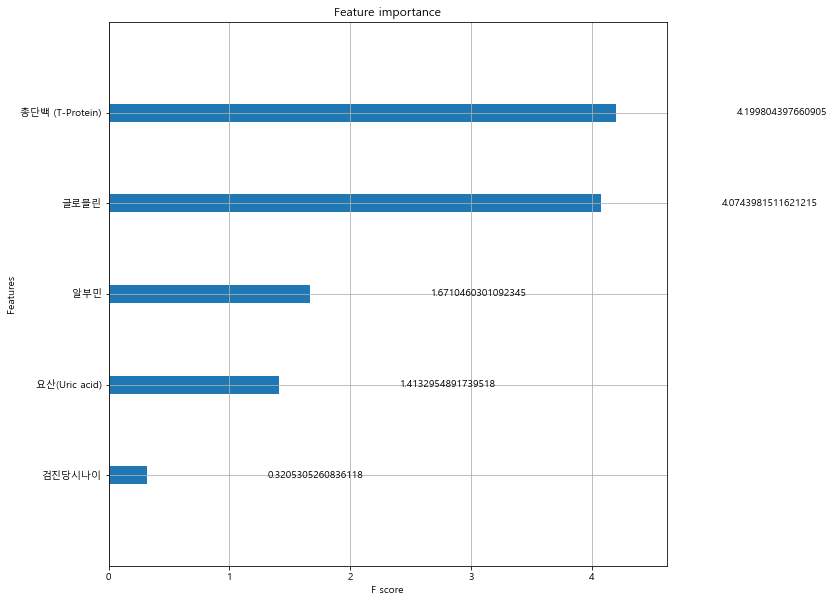

In [252]:
if XGB_bool:
    plt.rcParams["figure.figsize"] = (10, 10)
    xgboost.plot_importance(model, importance_type='gain')

In [253]:
model.feature_importances_

array([0.02744486, 0.14308034, 0.35960075, 0.34886307, 0.12101091],
      dtype=float32)

In [254]:
df_feature = pd.concat([pd.DataFrame(train_columns), pd.DataFrame(model.feature_importances_)], axis=1)
df_feature.columns = ['columns', 'feature_importance']

In [255]:
df_feature.sort_values('feature_importance', ascending=False)

,columns,feature_importance
2,총단백 (T-Protein),0.359601
3,글로블린,0.348863
1,알부민,0.143080
4,요산(Uric acid),0.121011
0,검진당시나이,0.027445


# 실제지수 - 예측지수 결과

In [256]:
pd.DataFrame(y_test).reset_index(drop=True)

,target
0,108.0
1,98.0
2,113.0
3,105.0
4,102.0
...,...
183944,107.0
183945,95.0
183946,112.0
183947,89.0


In [257]:
pd.DataFrame(y_pred).reset_index(drop=True)

,0
0,108.312279
1,96.180992
2,112.351410
3,104.390785
4,102.484848
...,...
183944,107.049690
183945,94.930672
183946,112.377876
183947,89.373314


In [258]:
df_test = pd.concat([pd.DataFrame(y_test).reset_index(drop=True), pd.DataFrame(y_pred).reset_index(drop=True)], axis=1)

In [259]:
df_test.head()

,target,0
0,108.0,108.312279
1,98.0,96.180992
2,113.0,112.351410
3,105.0,104.390785
4,102.0,102.484848


In [260]:
df_test.columns

Index(['target', 0], dtype='object')

In [261]:
df_test.columns = ['실제지수', '예측지수']

In [262]:
df_test['diff'] = df_test['예측지수'] - df_test['실제지수']

In [263]:
df_test.head()

,실제지수,예측지수,diff
0,108.0,108.312279,0.312279
1,98.0,96.180992,-1.819008
2,113.0,112.351410,-0.648590
3,105.0,104.390785,-0.609215
4,102.0,102.484848,0.484848


In [264]:
df_test['diff_int'] = df_test['diff'].round(0)

In [265]:
len(df_test)

183949

In [266]:
df_test.head()

,실제지수,예측지수,diff,diff_int
0,108.0,108.312279,0.312279,0.0
1,98.0,96.180992,-1.819008,-2.0
2,113.0,112.351410,-0.648590,-1.0
3,105.0,104.390785,-0.609215,-1.0
4,102.0,102.484848,0.484848,0.0


<AxesSubplot:>

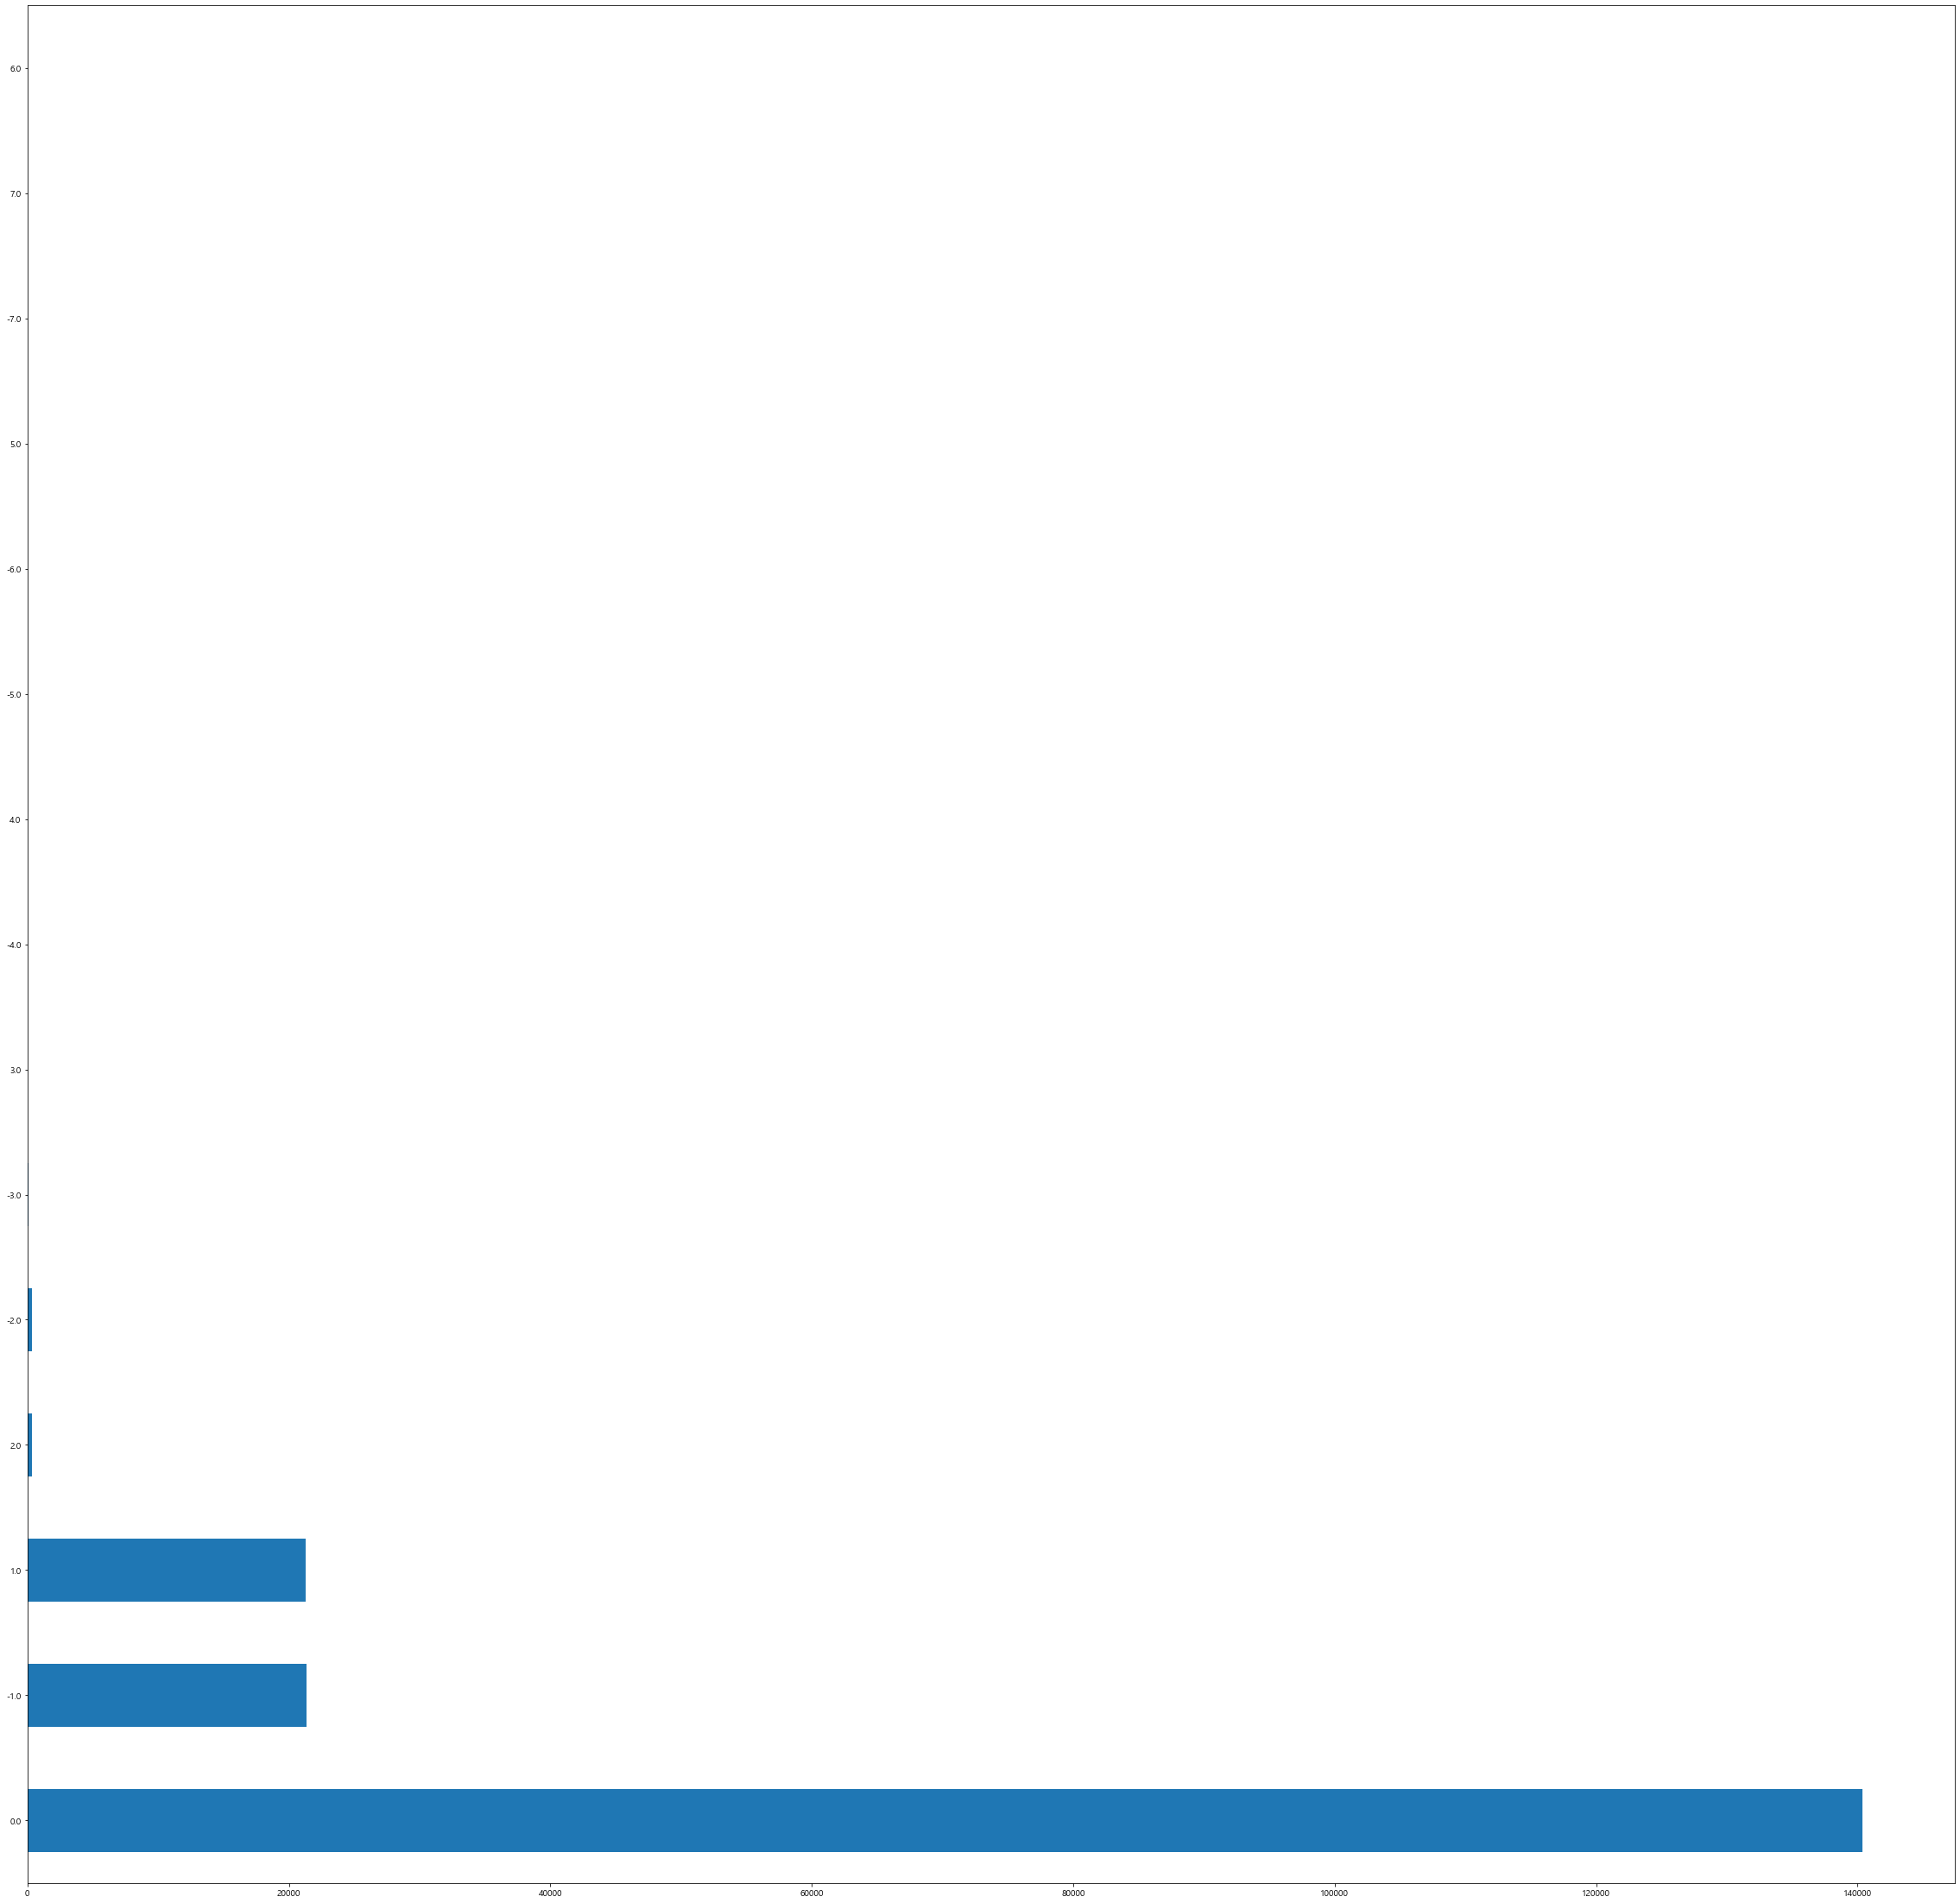

In [267]:
plt.figure(figsize=(40, 40))
df_test['diff_int'].value_counts().plot(kind='barh')
# plt.savefig('./output/png/숙취나이_결측치제거_20대_남자.png')

In [268]:
df_test['diff_int'].value_counts(ascending=False)

 0.0    140401
-1.0     21340
 1.0     21316
 2.0       367
-2.0       351
-3.0        54
 3.0        46
-4.0        26
 4.0        15
-5.0        12
-6.0         7
 5.0         6
-7.0         4
 7.0         2
 6.0         2
Name: diff_int, dtype: int64

In [269]:
df_test['예측지수'].round(0).value_counts()

93.0     5655
109.0    5619
106.0    5590
107.0    5560
91.0     5545
108.0    5543
105.0    5507
96.0     5492
94.0     5462
95.0     5456
92.0     5452
104.0    5447
110.0    5328
90.0     5234
103.0    5116
97.0     5010
89.0     4953
102.0    4895
111.0    4893
98.0     4879
101.0    4769
99.0     4716
112.0    4644
88.0     4572
100.0    4494
87.0     4248
114.0    4197
113.0    4087
86.0     4009
115.0    3602
85.0     3538
84.0     3434
116.0    3290
117.0    2881
83.0     2845
82.0     2152
118.0    2078
119.0    1638
81.0     1615
80.0     1059
120.0    1050
121.0     829
79.0      801
122.0     769
78.0      709
77.0      583
123.0     577
124.0     513
76.0      502
75.0      491
125.0     435
74.0      408
126.0     396
73.0      329
72.0      247
71.0      179
70.0      162
69.0      147
68.0       84
67.0       81
66.0       41
65.0       31
63.0       25
64.0       21
62.0       11
60.0        7
61.0        7
59.0        6
58.0        3
57.0        1
Name: 예측지수, dtype: i

# 예측 나이 분포

In [270]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model.eval()
        X_train_pred = model(X_train)
        X_train_pred = X_train_pred.numpy()

    df_train = pd.DataFrame(X_train_pred).reset_index(drop=True)
    y_test = pd.DataFrame(y_test.numpy())

In [271]:
if XGB_bool:
    df_train = pd.DataFrame(model.predict(X_train)).reset_index(drop=True)

In [272]:
# df_test = pd.DataFrame(model.predict(X_test)).reset_index(drop=True)

In [273]:
df_plot = pd.DataFrame(y_test.value_counts())

In [274]:
df_plot.columns = ['count']

In [275]:
df_plot.reset_index(inplace=True)

In [276]:
df_plot = df_plot.sort_values('index', ascending=True)

In [277]:
df_plot

,index,count
67,58.0,3
66,59.0,5
65,60.0,11
68,61.0,2
64,62.0,16
62,63.0,23
63,64.0,20
61,65.0,31
60,66.0,47
59,67.0,72


In [278]:
df_plot.set_index('index', inplace=True)

<AxesSubplot:xlabel='index'>

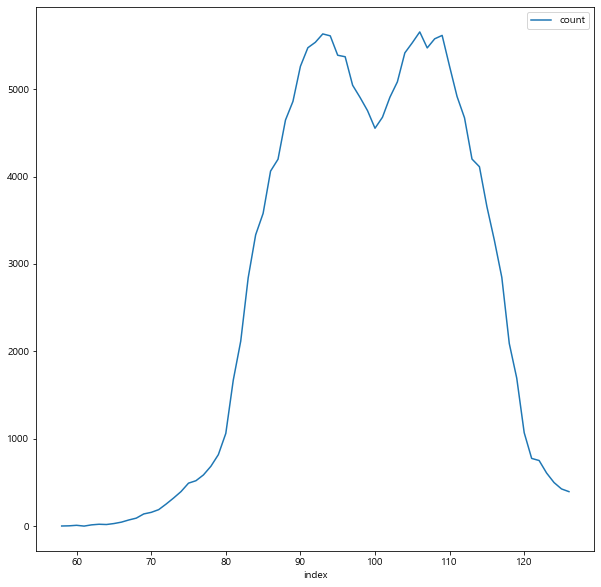

In [279]:
df_plot.plot()

In [280]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model.eval()
        X_test_pred = model(X_test)
        X_test_pred = X_test_pred.numpy()
    df_test = pd.DataFrame(X_test_pred).reset_index(drop=True)

In [281]:
if XGB_bool:
    df_test = pd.DataFrame(model.predict(X_test)).reset_index(drop=True)

In [282]:
df_plot = pd.DataFrame(df_test.round(0).value_counts())

In [283]:
df_plot.columns = ['count']

In [284]:
df_plot.reset_index(inplace=True)

In [285]:
df_plot = df_plot.sort_values(0, ascending=True)

In [286]:
df_plot.set_index(0, inplace=True)

In [287]:
df_plot

,count
0,
57.0,1
58.0,3
59.0,6
60.0,7
61.0,7
62.0,11
63.0,25
64.0,21
65.0,31


<AxesSubplot:xlabel='0'>

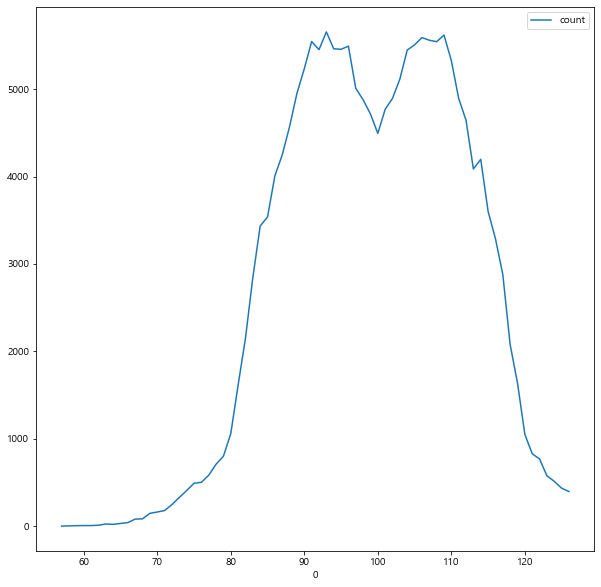

In [288]:
df_plot.plot()

# 시각화

In [289]:
# model.coef_

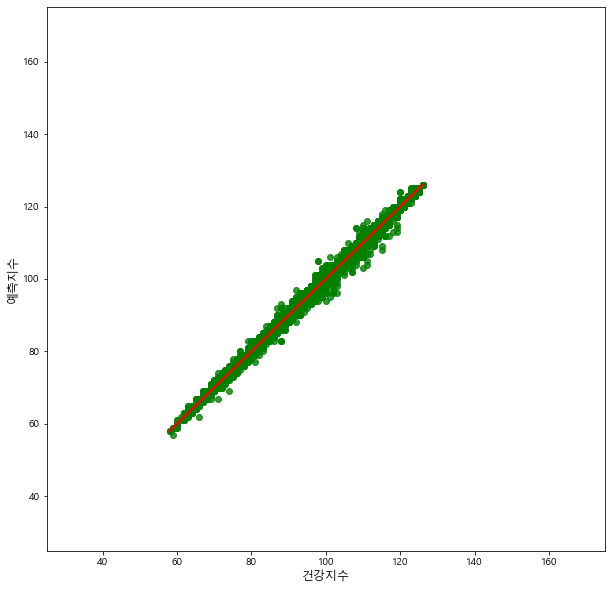

In [290]:
plt.rcParams["figure.figsize"] = (10, 10)
df_scatter = pd.concat([pd.DataFrame(y_test).reset_index(drop=True), df_test.round(0)], axis = 1)
df_scatter.columns = ['건강지수', '예측지수']

import seaborn as sns

# plt.figure(figsize=(10, 10))
# plt.scatter(df_scatterx='나이', y='예측나이', s=9, cmap='Reds', color='green', trendline="ols")
# plt.colorbar()
# sns.scatterplot(x=df_scatter['나이'], y=df_scatter['예측나이'], color='green')
sns.regplot(x=df_scatter['건강지수'], y=df_scatter['예측지수'], scatter_kws={'color':'green'}, line_kws={'color':'red'})
plt.xlabel('건강지수', fontsize=12)
plt.ylabel('예측지수', fontsize=12)
plt.xlim([25, 175])
plt.ylim([25, 175])
plt.show()

# 남성 데이터 전체 계산

In [291]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid),알부민_kde,총단백 (T-Protein)_kde,글로블린_kde,요산(Uric acid)_kde,kde_mean,target
0,2011,32,11757,1,24,4.6,6.9,2.3,4.5,99.71,123.83,106.96,35.95,95.64,98.0
1,2019,50,356493,1,53,4.0,6.8,2.8,5.1,15.75,103.31,117.98,110.99,81.51,91.0
2,2021,50,642497,1,55,4.2,6.9,2.7,5.3,47.80,128.89,142.64,121.63,105.86,103.0
3,2019,62,421626,1,40,4.7,7.6,2.9,4.6,100.00,110.54,106.22,50.37,94.48,97.0
4,2020,62,565527,1,41,4.5,7.4,2.9,4.6,94.74,132.45,113.17,42.35,99.26,100.0


In [292]:
df_man.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573898 entries, 0 to 573897
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   검진년도                 573898 non-null  int64  
 1   UID                  573898 non-null  int64  
 2   CU_REC_ID            573898 non-null  int64  
 3   SEX                  573898 non-null  int64  
 4   검진당시나이               573898 non-null  int64  
 5   알부민                  573898 non-null  float64
 6   총단백 (T-Protein)      573898 non-null  float64
 7   글로블린                 573898 non-null  float64
 8   요산(Uric acid)        573898 non-null  float64
 9   알부민_kde              573898 non-null  float64
 10  총단백 (T-Protein)_kde  573898 non-null  float64
 11  글로블린_kde             573898 non-null  float64
 12  요산(Uric acid)_kde    573898 non-null  float64
 13  kde_mean             573898 non-null  float64
 14  target               573898 non-null  float64
dtypes: float64(10), i

In [293]:
df_man[df_man['UID'] == 168996]

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid),알부민_kde,총단백 (T-Protein)_kde,글로블린_kde,요산(Uric acid)_kde,kde_mean,target
89290,2022,168996,2259500,1,35,4.9,7.5,2.6,6.5,130.46,128.90,147.88,149.50,137.28,119.0
89291,2023,168996,2259499,1,36,4.7,7.5,2.8,6.3,103.46,104.97,110.68,146.07,113.88,107.0
89292,2024,168996,2281994,1,37,4.9,7.5,2.6,7.9,133.91,114.98,145.99,74.83,118.83,109.0


In [294]:
train_columns

['검진당시나이', '알부민', '총단백 (T-Protein)', '글로블린', '요산(Uric acid)']

In [295]:
if scaling_bool:
    df_pred = df_man_scaled.copy()
else:
    df_pred = df_man.copy()

In [296]:
len(df_pred)

573898

In [297]:
df_pred.reset_index(drop=True, inplace=True)

In [298]:
X_test

,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid)
283876,50,4.4,7.4,3.00,5.5
455765,21,4.6,7.2,2.61,2.7
449946,39,4.6,7.0,2.40,6.3
95261,39,4.4,7.3,2.90,5.7
33204,53,4.4,7.1,2.70,7.6
...,...,...,...,...,...
296779,41,4.7,7.2,2.50,8.5
362046,32,4.8,7.7,2.90,8.0
74665,46,4.6,7.2,2.61,6.4
311267,51,4.3,6.5,2.61,5.1


In [299]:
df_pred.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '알부민', '총단백 (T-Protein)',
       '글로블린', '요산(Uric acid)', '알부민_kde', '총단백 (T-Protein)_kde', '글로블린_kde',
       '요산(Uric acid)_kde', 'kde_mean', 'target'],
      dtype='object')

In [300]:
df_pred[train_columns]

,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid)
0,24,4.6,6.9,2.3,4.5
1,53,4.0,6.8,2.8,5.1
2,55,4.2,6.9,2.7,5.3
3,40,4.7,7.6,2.9,4.6
4,41,4.5,7.4,2.9,4.6
...,...,...,...,...,...
573893,36,4.9,7.7,2.8,7.3
573894,65,5.0,6.8,1.8,5.8
573895,29,4.8,7.4,2.6,6.6
573896,26,5.1,8.0,2.9,7.4


In [301]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model.eval()
        pred_data = model(torch.Tensor(df_pred[train_columns].to_numpy()))
        pred_data = pred_data.numpy()

In [302]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data = model.predict(df_pred[train_columns])

In [303]:
pred_data = pred_data.round(0)

In [304]:
pred_data

array([ 97.,  91., 103., ..., 115., 101., 105.], dtype=float32)

In [305]:
df_output = pd.concat([df_pred, pd.DataFrame(pred_data, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [306]:
if scaling_bool:
    df_output = pd.concat([df_man[['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']], df_output], axis=1)

In [307]:
df_output.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid),알부민_kde,총단백 (T-Protein)_kde,글로블린_kde,요산(Uric acid)_kde,kde_mean,target,예측지수
0,2011,32,11757,1,24,4.6,6.9,2.30,4.5,99.71,123.83,106.96,35.95,95.64,98.0,97.0
1,2019,50,356493,1,53,4.0,6.8,2.80,5.1,15.75,103.31,117.98,110.99,81.51,91.0,91.0
2,2021,50,642497,1,55,4.2,6.9,2.70,5.3,47.80,128.89,142.64,121.63,105.86,103.0,103.0
3,2019,62,421626,1,40,4.7,7.6,2.90,4.6,100.00,110.54,106.22,50.37,94.48,97.0,97.0
4,2020,62,565527,1,41,4.5,7.4,2.90,4.6,94.74,132.45,113.17,42.35,99.26,100.0,99.0
5,2021,62,699357,1,42,4.4,7.0,2.60,5.1,81.32,133.10,144.56,85.62,110.36,105.0,105.0
6,2022,62,1356310,1,43,4.8,7.2,2.40,4.5,124.80,142.59,130.95,46.65,115.74,108.0,108.0
7,2023,62,2170394,1,44,4.4,7.5,3.10,5.1,85.51,114.12,62.72,89.12,90.26,95.0,96.0
8,2019,67,410099,1,51,4.1,6.7,2.61,6.1,32.92,82.41,100.00,149.54,84.51,92.0,93.0
9,2020,67,481109,1,52,4.2,6.9,2.61,6.6,47.15,130.30,100.00,133.42,99.92,100.0,99.0


## 예측지수 성능평가

In [308]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output['target'], df_output['예측지수'])

0.24527006541232066

# target으로 나이 계산

In [309]:
df_output['예측나이'] = ((100 - df_output['예측지수']) / 5) + df_output['검진당시나이']
df_output['예측나이'] = df_output['예측나이'].round(2)

In [310]:
df_output.head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid),알부민_kde,총단백 (T-Protein)_kde,글로블린_kde,요산(Uric acid)_kde,kde_mean,target,예측지수,예측나이
0,2011,32,11757,1,24,4.6,6.90,2.30,4.5,99.71,123.83,106.96,35.95,95.64,98.0,97.0,24.6
1,2019,50,356493,1,53,4.0,6.80,2.80,5.1,15.75,103.31,117.98,110.99,81.51,91.0,91.0,54.8
2,2021,50,642497,1,55,4.2,6.90,2.70,5.3,47.80,128.89,142.64,121.63,105.86,103.0,103.0,54.4
3,2019,62,421626,1,40,4.7,7.60,2.90,4.6,100.00,110.54,106.22,50.37,94.48,97.0,97.0,40.6
4,2020,62,565527,1,41,4.5,7.40,2.90,4.6,94.74,132.45,113.17,42.35,99.26,100.0,99.0,41.2
5,2021,62,699357,1,42,4.4,7.00,2.60,5.1,81.32,133.10,144.56,85.62,110.36,105.0,105.0,41.0
6,2022,62,1356310,1,43,4.8,7.20,2.40,4.5,124.80,142.59,130.95,46.65,115.74,108.0,108.0,41.4
7,2023,62,2170394,1,44,4.4,7.50,3.10,5.1,85.51,114.12,62.72,89.12,90.26,95.0,96.0,44.8
8,2019,67,410099,1,51,4.1,6.70,2.61,6.1,32.92,82.41,100.00,149.54,84.51,92.0,93.0,52.4
9,2020,67,481109,1,52,4.2,6.90,2.61,6.6,47.15,130.30,100.00,133.42,99.92,100.0,99.0,52.2


## 예측나이 성능평가

In [311]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output['검진당시나이'], df_output['예측나이'])

1.8105750499217632

# 최종 산출

In [312]:
df_output.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid),알부민_kde,총단백 (T-Protein)_kde,글로블린_kde,요산(Uric acid)_kde,kde_mean,target,예측지수,예측나이
0,2011,32,11757,1,24,4.6,6.9,2.3,4.5,99.71,123.83,106.96,35.95,95.64,98.0,97.0,24.6
1,2019,50,356493,1,53,4.0,6.8,2.8,5.1,15.75,103.31,117.98,110.99,81.51,91.0,91.0,54.8
2,2021,50,642497,1,55,4.2,6.9,2.7,5.3,47.80,128.89,142.64,121.63,105.86,103.0,103.0,54.4
3,2019,62,421626,1,40,4.7,7.6,2.9,4.6,100.00,110.54,106.22,50.37,94.48,97.0,97.0,40.6
4,2020,62,565527,1,41,4.5,7.4,2.9,4.6,94.74,132.45,113.17,42.35,99.26,100.0,99.0,41.2


# DataMart csv

In [313]:
df_copy = df.copy()

In [314]:
df_copy.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid)
0,2010,7282,2520,1,42,4.4,7.6,NaN,6.9
1,2010,7490,3638,1,39,4.5,6.9,2.4,5.3
2,2010,7915,3997,1,36,4.3,7.3,3.0,5.4
3,2010,8056,4745,1,42,4.7,7.2,2.5,7.5
4,2010,8457,3929,1,38,4.5,7.6,3.1,6.1


In [315]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 9 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   검진년도             1213899 non-null  int64  
 1   UID              1213899 non-null  int64  
 2   CU_REC_ID        1213899 non-null  int64  
 3   SEX              1213899 non-null  int64  
 4   검진당시나이           1213899 non-null  int64  
 5   알부민              1111635 non-null  float64
 6   총단백 (T-Protein)  1111245 non-null  float64
 7   글로블린             962998 non-null   float64
 8   요산(Uric acid)    1096571 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 83.4 MB


In [316]:
minimums

[3.800000000000001, 6.000000000000001, 1.65, 1.4]

In [317]:
maximums

[5.399999999999999, 8.399999999999999, 3.65, 9.88]

In [318]:
train_columns

['검진당시나이', '알부민', '총단백 (T-Protein)', '글로블린', '요산(Uric acid)']

In [319]:
target_cols

['알부민', '총단백 (T-Protein)', '글로블린', '요산(Uric acid)']

In [320]:
for idx, col in enumerate(target_cols):    
    df_copy.loc[df_copy[col] < minimums[idx], col] = minimums[idx]
    df_copy.loc[df_copy[col] > maximums[idx], col] = maximums[idx]

In [321]:
df_man_csv = df_copy[df_copy['SEX'] == 1]
len(df_man_csv)

765459

In [322]:
df_man_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid)
0,2010,7282,2520,1,42,4.4,7.6,NaN,6.9
1,2010,7490,3638,1,39,4.5,6.9,2.4,5.3
2,2010,7915,3997,1,36,4.3,7.3,3.0,5.4
3,2010,8056,4745,1,42,4.7,7.2,2.5,7.5
4,2010,8457,3929,1,38,4.5,7.6,3.1,6.1


## 총단백 스크리닝

In [323]:
screening = 8.5

In [324]:
scr_col = '총단백 (T-Protein)'

In [325]:
df_man_csv[df_man_csv[scr_col] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid)
0,2010,7282,2520,1,42,4.4,7.6,NaN,6.9
1,2010,7490,3638,1,39,4.5,6.9,2.4,5.3
2,2010,7915,3997,1,36,4.3,7.3,3.0,5.4
3,2010,8056,4745,1,42,4.7,7.2,2.5,7.5
4,2010,8457,3929,1,38,4.5,7.6,3.1,6.1


In [326]:
len(df_man_csv[df_man_csv[scr_col] < screening])

703559

In [327]:
# df_man_csv.loc[df_man_csv[scr_col] < screening, scr_col] = screening

In [328]:
df_man_csv[df_man_csv[scr_col] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid)
0,2010,7282,2520,1,42,4.4,7.6,NaN,6.9
1,2010,7490,3638,1,39,4.5,6.9,2.4,5.3
2,2010,7915,3997,1,36,4.3,7.3,3.0,5.4
3,2010,8056,4745,1,42,4.7,7.2,2.5,7.5
4,2010,8457,3929,1,38,4.5,7.6,3.1,6.1


In [329]:
len(df_man_csv[df_man_csv[scr_col] < screening])

703559

## 글로블린 스크리닝

In [330]:
screening = 3.5

In [331]:
scr_col = '글로블린'

In [332]:
df_man_csv[df_man_csv[scr_col] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid)
1,2010,7490,3638,1,39,4.5,6.9,2.4,5.3
2,2010,7915,3997,1,36,4.3,7.3,3.0,5.4
3,2010,8056,4745,1,42,4.7,7.2,2.5,7.5
4,2010,8457,3929,1,38,4.5,7.6,3.1,6.1
5,2010,8634,4751,1,43,4.4,6.9,2.5,5.6


In [333]:
len(df_man_csv[df_man_csv[scr_col] < screening])

596547

In [334]:
# df_man_csv.loc[df_man_csv[scr_col] < screening, scr_col] = screening

In [335]:
df_man_csv[df_man_csv[scr_col] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid)
1,2010,7490,3638,1,39,4.5,6.9,2.4,5.3
2,2010,7915,3997,1,36,4.3,7.3,3.0,5.4
3,2010,8056,4745,1,42,4.7,7.2,2.5,7.5
4,2010,8457,3929,1,38,4.5,7.6,3.1,6.1
5,2010,8634,4751,1,43,4.4,6.9,2.5,5.6


In [336]:
len(df_man_csv[df_man_csv[scr_col] < screening])

596547

## 검진 항목 all 결측치 지우기

In [337]:
target_cols

['알부민', '총단백 (T-Protein)', '글로블린', '요산(Uric acid)']

In [338]:
df_man_csv.dropna(subset=target_cols, how='all', inplace=True)

In [339]:
df_man_csv.reset_index(drop=True, inplace=True)

In [340]:
len(df_man_csv)

706355

## fillna

In [341]:
df_man_csv.fillna(df_man.mean().round(2), inplace=True)

## 모델 예측

In [342]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data = model.predict(df_man_csv[train_columns])

In [343]:
pred_data = pred_data.round(0)

In [344]:
df_man_csv = pd.concat([df_man_csv, pd.DataFrame(pred_data, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [345]:
df_man_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid),예측지수
0,2010,7282,2520,1,42,4.4,7.6,2.62,6.9,107.0
1,2010,7490,3638,1,39,4.5,6.9,2.40,5.3,102.0
2,2010,7915,3997,1,36,4.3,7.3,3.00,5.4,98.0
3,2010,8056,4745,1,42,4.7,7.2,2.50,7.5,113.0
4,2010,8457,3929,1,38,4.5,7.6,3.10,6.1,99.0


### 성능 평가

In [346]:
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(df_man_csv['target'], df_man_csv['예측지수']))

In [347]:
# r2_score(df_man_csv['target'], df_man_csv['예측지수'])

## 예측나이 계산

In [348]:
df_man_csv['예측나이'] = ((100 - df_man_csv['예측지수']) / 5) + df_man_csv['검진당시나이']
df_man_csv['예측나이'] = df_man_csv['예측나이'].round(2)

### 성능 평가

In [349]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(df_man_csv['검진당시나이'], df_man_csv['예측나이']))

MAE : 1.9127733221963454


In [350]:
r2_score(df_man_csv['검진당시나이'], df_man_csv['예측나이'])

0.9311160610350275

In [351]:
df_man_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid),예측지수,예측나이
0,2010,7282,2520,1,42,4.4,7.6,2.62,6.9,107.0,40.6
1,2010,7490,3638,1,39,4.5,6.9,2.40,5.3,102.0,38.6
2,2010,7915,3997,1,36,4.3,7.3,3.00,5.4,98.0,36.4
3,2010,8056,4745,1,42,4.7,7.2,2.50,7.5,113.0,39.4
4,2010,8457,3929,1,38,4.5,7.6,3.10,6.1,99.0,38.2


In [352]:
df_man_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706355 entries, 0 to 706354
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   검진년도             706355 non-null  int64  
 1   UID              706355 non-null  int64  
 2   CU_REC_ID        706355 non-null  int64  
 3   SEX              706355 non-null  int64  
 4   검진당시나이           706355 non-null  int64  
 5   알부민              706355 non-null  float64
 6   총단백 (T-Protein)  706355 non-null  float64
 7   글로블린             706355 non-null  float64
 8   요산(Uric acid)    706355 non-null  float64
 9   예측지수             706355 non-null  float32
 10  예측나이             706355 non-null  float64
dtypes: float32(1), float64(5), int64(5)
memory usage: 56.6 MB


# 최종 UID별 확인

In [353]:
# 김태현 본부장님
df_man_csv[df_man_csv['UID'] == 175673].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid),예측지수,예측나이
253438,2022,175673,751348,1,48,4.2,6.8,2.6,5.3,98.0,48.4
253439,2022,175673,1463838,1,48,4.2,6.8,2.6,5.3,98.0,48.4
253375,2022,175673,1919125,1,48,4.2,6.8,2.6,5.3,98.0,48.4
253440,2022,175673,2169120,1,48,4.2,6.8,2.6,5.3,98.0,48.4
253376,2022,175673,2223795,1,48,4.2,6.8,2.6,5.3,98.0,48.4
253377,2022,175673,2237465,1,48,4.2,6.8,2.6,5.3,98.0,48.4
253441,2022,175673,2238320,1,48,4.2,6.8,2.6,5.3,98.0,48.4
253442,2022,175673,2246042,1,48,4.2,6.8,2.6,5.3,98.0,48.4
413893,2023,175673,1463893,1,49,4.6,6.9,2.3,5.6,107.0,47.6
413889,2023,175673,1919126,1,49,4.6,6.9,2.3,5.6,107.0,47.6


In [354]:
# 양원영 유닛장님
df_man_csv[df_man_csv['UID'] == 289587].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid),예측지수,예측나이
180020,2021,289587,796178,1,47,4.2,7.5,3.3,4.4,83.0,50.4
284561,2022,289587,866076,1,48,4.5,7.4,2.9,4.9,102.0,47.6
284516,2022,289587,2115999,1,48,4.5,7.4,2.9,4.9,102.0,47.6
88348,2022,289587,2603574,1,48,4.5,7.4,2.9,4.9,102.0,47.6
462749,2023,289587,1487447,1,49,4.2,7.4,3.2,5.4,92.0,50.6
462750,2023,289587,2227964,1,49,4.2,7.4,3.2,5.4,92.0,50.6
642793,2024,289587,2243723,1,50,4.5,7.2,2.7,6.1,116.0,46.8
642771,2024,289587,2603575,1,50,4.5,7.2,2.7,6.1,116.0,46.8


In [355]:
# 한...
df_man_csv[df_man_csv['UID'] == 897603].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid),예측지수,예측나이
384113,2022,897603,1066133,1,51,5.0,7.2,2.2,5.0,116.0,47.8
384124,2022,897603,1068885,1,51,5.0,7.2,2.2,5.0,116.0,47.8
384125,2022,897603,1728532,1,51,5.0,7.2,2.2,5.0,116.0,47.8
384126,2022,897603,2555144,1,51,5.0,7.2,2.2,5.0,116.0,47.8
553687,2023,897603,1458387,1,52,4.7,7.2,2.5,4.7,112.0,49.6
553688,2023,897603,1728531,1,52,4.7,7.2,2.5,4.7,112.0,49.6
542372,2023,897603,2120063,1,52,4.7,7.2,2.5,4.7,112.0,49.6
542373,2023,897603,2351665,1,52,4.7,7.2,2.5,4.7,112.0,49.6
553689,2023,897603,2555143,1,52,4.7,7.2,2.5,4.7,112.0,49.6
542374,2023,897603,2622260,1,52,4.7,7.2,2.5,4.7,112.0,49.6


In [356]:
# 김명근 팀장님
df_man_csv[df_man_csv['UID'] == 119172].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid),예측지수,예측나이
237967,2022,119172,751336,1,41,4.9,7.3,2.4,6.3,122.0,36.6
237968,2022,119172,1432355,1,41,4.9,7.3,2.4,6.3,122.0,36.6
237965,2022,119172,1432476,1,41,4.9,7.3,2.4,6.3,122.0,36.6
237969,2022,119172,2247083,1,41,4.9,7.3,2.4,6.3,122.0,36.6
237970,2022,119172,2252956,1,41,4.9,7.3,2.4,6.3,122.0,36.6
399865,2023,119172,1436742,1,42,4.5,7.4,2.9,6.1,110.0,40.0
399866,2023,119172,2247082,1,42,4.5,7.4,2.9,6.1,110.0,40.0
399867,2023,119172,2252955,1,42,4.5,7.4,2.9,6.1,110.0,40.0
624461,2024,119172,2250063,1,43,4.6,7.1,2.5,6.0,114.0,40.2
624462,2024,119172,2252954,1,43,4.6,7.1,2.5,6.0,114.0,40.2


In [357]:
# 성주용
df_man_csv[df_man_csv['UID'] == 897595].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid),예측지수,예측나이
553682,2023,897595,1525045,1,40,4.4,6.5,2.1,4.5,75.0,45.0
553683,2023,897595,1593851,1,40,4.4,6.5,2.1,4.5,75.0,45.0
553680,2023,897595,2005289,1,40,4.4,6.5,2.1,4.5,75.0,45.0
553681,2023,897595,2138998,1,40,4.4,6.5,2.1,4.5,75.0,45.0
538001,2023,897595,2320478,1,40,4.4,6.5,2.1,4.5,75.0,45.0
553684,2023,897595,2328772,1,40,4.4,6.5,2.1,4.5,75.0,45.0
684560,2024,897595,2329051,1,41,4.7,6.6,1.9,5.2,84.0,44.2


In [358]:
# 최재..
df_man_csv[df_man_csv['UID'] == 492764].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid),예측지수,예측나이
332927,2022,492764,909688,1,39,5.3,7.4,2.1,8.6,107.0,37.6
332928,2022,492764,1575802,1,39,5.3,7.4,2.1,8.6,107.0,37.6
332931,2022,492764,1668547,1,39,5.3,7.4,2.1,8.6,107.0,37.6
332929,2022,492764,2246777,1,39,5.3,7.4,2.1,8.6,107.0,37.6
332930,2022,492764,2330256,1,39,5.3,7.4,2.1,8.6,107.0,37.6
133268,2022,492764,2343199,1,39,5.3,7.4,2.1,8.6,107.0,37.6
150534,2022,492764,2363393,1,39,5.3,7.4,2.1,8.6,107.0,37.6
150535,2022,492764,2639564,1,39,5.3,7.4,2.1,8.6,107.0,37.6
150536,2022,492764,2703924,1,39,5.3,7.4,2.1,8.6,107.0,37.6
332932,2022,492764,2783328,1,39,5.3,7.4,2.1,8.6,107.0,37.6


In [359]:
# 장경..
df_man_csv[df_man_csv['UID'] == 933936].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid),예측지수,예측나이
557870,2023,933936,1431742,1,40,4.6,7.6,3.0,7.7,99.0,40.2
557871,2023,933936,1435266,1,40,4.6,7.6,3.0,7.7,99.0,40.2
685855,2024,933936,2242997,1,41,4.6,6.8,2.2,7.5,97.0,41.6


In [360]:
df_man_csv[df_man_csv['UID'] == 168996].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid),예측지수,예측나이
250987,2022,168996,919754,1,35,4.9,7.5,2.6,6.5,119.0,31.2
250988,2022,168996,1425925,1,35,4.9,7.5,2.6,6.5,119.0,31.2
250989,2022,168996,2259500,1,35,4.9,7.5,2.6,6.5,119.0,31.2
411647,2023,168996,1425970,1,36,4.7,7.5,2.8,6.3,107.0,34.6
411648,2023,168996,1475832,1,36,4.7,7.5,2.8,6.3,107.0,34.6
411649,2023,168996,2259499,1,36,4.7,7.5,2.8,6.3,107.0,34.6
629656,2024,168996,2281994,1,37,4.9,7.5,2.6,7.9,110.0,35.0


# 여성 모델

In [361]:
df_target['SEX'].value_counts()

1    740316
2    432582
Name: SEX, dtype: int64

In [362]:
df_woman = df_target[df_target['SEX'] == 2]
len(df_woman)

432582

# 결측치 처리

## 결측치 삭제

In [363]:
# df_woman.dropna(inplace=True)

In [364]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid),알부민_kde,총단백 (T-Protein)_kde,글로블린_kde,요산(Uric acid)_kde,kde_mean,target
781759,2010,710490,213,2,28,4.5,7.8,3.3,2.6,99.99,58.63,24.51,10.84,54.66,77.0
743710,2010,315847,230,2,23,4.5,7.6,3.1,5.5,94.37,77.17,65.58,105.30,85.64,93.0
746042,2010,719072,231,2,24,4.8,8.3,3.5,4.9,118.95,4.45,9.70,139.07,66.77,83.0
1003210,2010,552037,332,2,41,3.9,6.7,NaN,3.9,12.71,87.73,100.00,139.70,78.07,89.0
781760,2010,710522,632,2,28,4.9,7.7,2.8,4.0,160.35,77.13,131.90,123.05,122.23,111.0


## 결측치 평균으로 대체

In [365]:
# 결측치를 평균으로 대체 하는 함수
fill_mean_func = lambda g: g.fillna(g.mean().round(2))

In [366]:
# 나이로 group by, 결측치를 평균으로 대체
# df_woman = df_woman.groupby('검진당시나이').apply(fill_mean_func)

## 검진 항목 all 결측치 지우기

In [367]:
target_cols

['알부민', '총단백 (T-Protein)', '글로블린', '요산(Uric acid)']

In [368]:
len(df_woman)

432582

In [369]:
df_woman.dropna(subset=target_cols, how='all', inplace=True)

In [370]:
len(df_woman)

394420

In [371]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid),알부민_kde,총단백 (T-Protein)_kde,글로블린_kde,요산(Uric acid)_kde,kde_mean,target
781759,2010,710490,213,2,28,4.5,7.8,3.3,2.6,99.99,58.63,24.51,10.84,54.66,77.0
743710,2010,315847,230,2,23,4.5,7.6,3.1,5.5,94.37,77.17,65.58,105.30,85.64,93.0
746042,2010,719072,231,2,24,4.8,8.3,3.5,4.9,118.95,4.45,9.70,139.07,66.77,83.0
1003210,2010,552037,332,2,41,3.9,6.7,NaN,3.9,12.71,87.73,100.00,139.70,78.07,89.0
781760,2010,710522,632,2,28,4.9,7.7,2.8,4.0,160.35,77.13,131.90,123.05,122.23,111.0


In [372]:
len(df_woman)

394420

## fillna

In [373]:
df_woman.mean().round(2)

검진년도                      2021.95
UID                     488832.98
CU_REC_ID              1464376.88
SEX                          2.00
검진당시나이                      38.74
알부민                          4.48
총단백 (T-Protein)              7.16
글로블린                         2.67
요산(Uric acid)                4.50
알부민_kde                    102.23
총단백 (T-Protein)_kde        107.99
글로블린_kde                   108.44
요산(Uric acid)_kde          103.08
kde_mean                   105.37
target                     102.68
dtype: float64

In [374]:
df_woman.fillna(df_woman.mean().round(2), inplace=True)

In [375]:
# df_woman.fillna(0, inplace=True)

## IterativeImputer

In [376]:
# df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(df_woman))
# df_impute.columns = df_woman.columns
# df_target = df_impute

## MICE(Multivariate Imputation by Chained Equation) Imputation

In [377]:
# import time
# start = time.time()
# np_imputed = mice(df_woman.values) # mice 학습시작
# df_woman = pd.DataFrame(np_imputed)
# end = time.time()
# print(f"{end - start:.5f} sec")

In [378]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid),알부민_kde,총단백 (T-Protein)_kde,글로블린_kde,요산(Uric acid)_kde,kde_mean,target
781759,2010,710490,213,2,28,4.5,7.8,3.30,2.6,99.99,58.63,24.51,10.84,54.66,77.0
743710,2010,315847,230,2,23,4.5,7.6,3.10,5.5,94.37,77.17,65.58,105.30,85.64,93.0
746042,2010,719072,231,2,24,4.8,8.3,3.50,4.9,118.95,4.45,9.70,139.07,66.77,83.0
1003210,2010,552037,332,2,41,3.9,6.7,2.67,3.9,12.71,87.73,100.00,139.70,78.07,89.0
781760,2010,710522,632,2,28,4.9,7.7,2.80,4.0,160.35,77.13,131.90,123.05,122.23,111.0


# 스크리닝

## 스크리닝

In [379]:
# screening = 80

In [380]:
# scr_col = 'ALP'

In [381]:
# df_woman[df_woman[scr_col] < screening].head()

In [382]:
# len(df_woman[df_woman[scr_col] < screening])

In [383]:
# df_woman.loc[df_woman[scr_col] < screening, scr_col] = screening

In [384]:
# df_woman[df_woman[scr_col] < screening].head()

In [385]:
# len(df_woman[df_woman[scr_col] < screening])

# 중복 제거

In [386]:
len(df_woman)

394420

In [387]:
# 동일한 검진년도에 중복건을 제외하기 위해서 sort value 한다음 중복시 첫 번째것만 남겨둠
df_woman.sort_values(by=['UID', '검진년도', 'CU_REC_ID'], ascending=[True, True, False], inplace=True)

In [388]:
df_woman.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid),알부민_kde,총단백 (T-Protein)_kde,글로블린_kde,요산(Uric acid)_kde,kde_mean,target
761203,2021,53,2632765,2,26,4.8,7.20,2.40,4.3,125.95,146.81,118.00,141.89,133.81,117.0
761202,2021,53,664316,2,26,4.8,7.20,2.40,4.3,125.95,146.81,118.00,141.89,133.81,117.0
809777,2024,53,2658222,2,29,4.5,7.10,2.60,5.2,102.79,149.99,150.00,115.25,128.88,114.0
813674,2020,54,497669,2,30,4.1,7.00,2.90,4.8,39.92,134.36,116.64,140.81,103.77,102.0
850797,2022,54,1319859,2,32,4.1,6.80,2.70,4.4,42.43,103.34,135.00,150.00,100.73,100.0
870007,2023,54,2039511,2,33,4.1,6.40,2.30,4.4,40.22,30.10,94.07,148.70,69.65,85.0
891894,2024,54,2750990,2,34,4.5,7.10,2.60,4.9,100.00,149.84,150.00,119.56,128.86,114.0
866971,2022,56,1351361,2,33,4.1,6.50,2.40,4.2,40.22,49.50,124.48,149.02,81.62,91.0
866970,2022,56,1019732,2,33,4.1,6.50,2.40,4.2,40.22,49.50,124.48,149.02,81.62,91.0
886915,2023,56,2032999,2,34,4.5,7.10,2.60,4.7,100.00,149.84,150.00,137.76,132.50,116.0


## first만 남겨두고 중복 제거

In [389]:
df_woman = df_woman.drop_duplicates(subset=['UID', '검진년도'], keep='first')

In [390]:
df_woman.reset_index(drop=True, inplace=True)

# 연령별 개수 현황(검진당시나이)

<AxesSubplot:xlabel='index'>

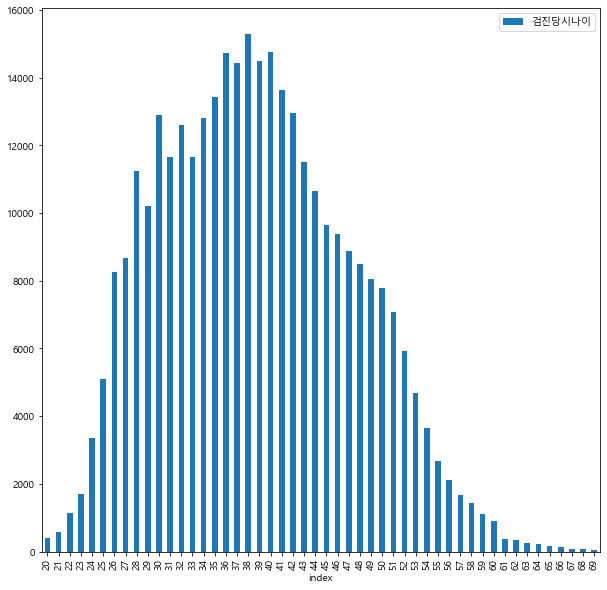

In [391]:
df_woman['검진당시나이'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='검진당시나이')

In [392]:
df_woman['검진당시나이'].value_counts().reset_index().sort_values('index')

,index,검진당시나이
40,20,409
39,21,582
36,22,1126
33,23,1688
30,24,3341
27,25,5111
22,26,8255
20,27,8675
14,28,11238
16,29,10216


# 검진항목 시각화

In [393]:
df_woman.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid),알부민_kde,총단백 (T-Protein)_kde,글로블린_kde,요산(Uric acid)_kde,kde_mean,target
count,333322.000000,3.333220e+05,3.333220e+05,333322.0,333322.000000,333322.000000,333322.000000,333322.000000,333322.000000,333322.000000,333322.000000,333322.000000,333322.000000,333322.000000,333322.000000
mean,2021.891234,4.829900e+05,1.451143e+06,2.0,38.764510,4.478680,7.164903,2.677763,4.506337,101.502970,107.827349,108.301009,103.017881,105.062876,102.529809
std,1.579647,3.587046e+05,8.180284e+05,0.0,8.460079,0.277621,0.410967,0.318457,0.943763,37.812999,40.245550,36.927611,42.294802,21.515033,10.760680
min,2010.000000,5.300000e+01,2.130000e+02,2.0,20.000000,3.810000,6.030000,1.700000,1.400000,2.000000,0.510000,0.360000,0.000000,13.230000,57.000000
25%,2021.000000,2.144450e+05,6.243720e+05,2.0,32.000000,4.300000,6.900000,2.500000,3.900000,82.090000,82.020000,96.700000,72.560000,91.360000,96.000000
50%,2022.000000,3.642940e+05,1.366940e+06,2.0,38.000000,4.500000,7.160000,2.670000,4.500000,100.000000,120.770000,116.210000,114.180000,108.230000,104.000000
75%,2023.000000,8.016285e+05,2.161303e+06,2.0,45.000000,4.700000,7.400000,2.900000,5.100000,121.070000,143.040000,138.220000,140.810000,121.340000,111.000000
max,2024.000000,1.473590e+06,2.871326e+06,2.0,69.000000,5.390000,8.390000,3.650000,9.800000,199.910000,150.850000,152.650000,150.300000,156.430000,128.000000


<AxesSubplot:xlabel='검진당시나이'>

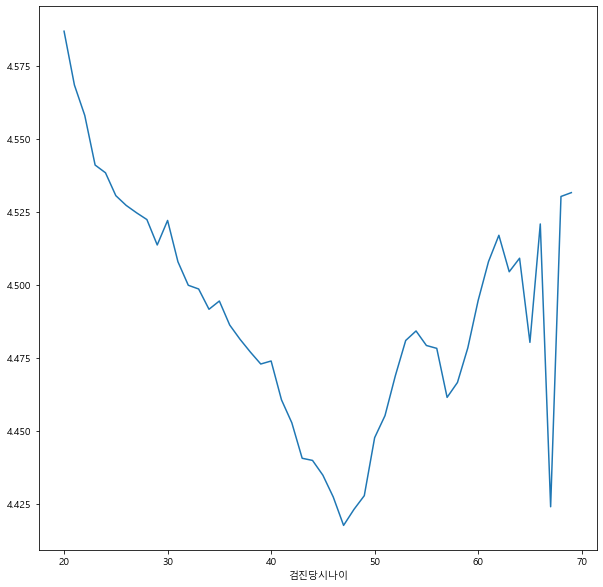

In [394]:
df_woman.groupby('검진당시나이').mean()[target_cols[0]].plot()

<AxesSubplot:xlabel='검진당시나이'>

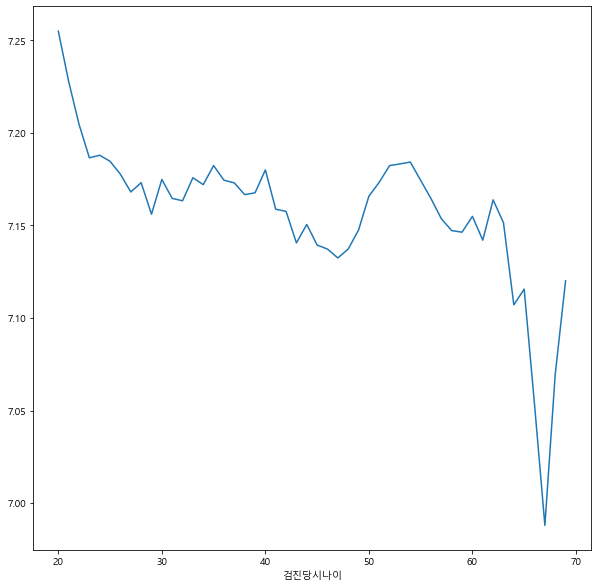

In [395]:
df_woman.groupby('검진당시나이').mean()[target_cols[1]].plot()

In [396]:
# df_woman.groupby('검진당시나이').mean()[target_cols[2]].plot()

<AxesSubplot:xlabel='검진당시나이', ylabel='target'>

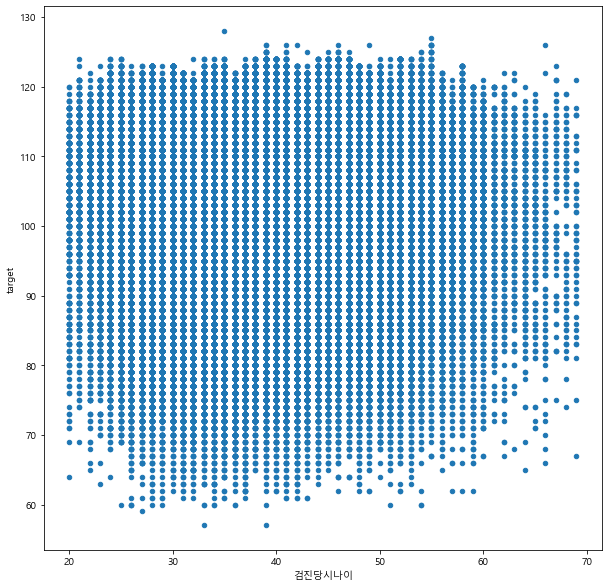

In [397]:
df_woman.plot.scatter(x='검진당시나이', y='target')

# 건강지수 Sampling

<AxesSubplot:xlabel='index'>

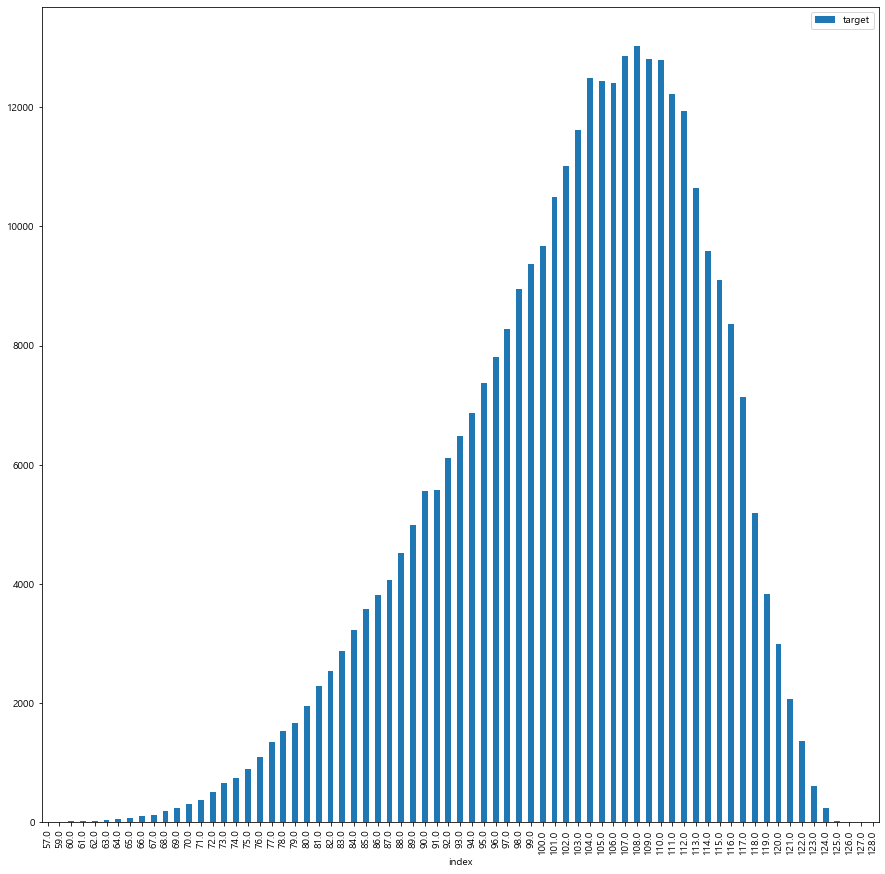

In [398]:
plt.rcParams["figure.figsize"] = (15, 15)
df_woman['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [399]:
df_woman['target'].value_counts().reset_index().sort_values('index')

,index,target
67,57.0,2
68,59.0,1
65,60.0,16
64,61.0,18
62,62.0,30
61,63.0,43
60,64.0,51
59,65.0,77
58,66.0,111
57,67.0,132


In [400]:
df_woman_sampling = pd.DataFrame()

# for target in range(int(df_woman['target'].min()), 100):
for target in range(50, 100):
    
#     print(target, 200 - target)
    left_len = len(df_woman[df_woman['target'] == target])
    right_len = len(df_woman[df_woman['target'] == (200 - target)])
    
#     print(target, left_len, right_len)
    
    if left_len >= right_len:
        if left_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == target].sample(left_len, replace=True, random_state=87)])
        if right_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == (200 - target)].sample(left_len, replace=True, random_state=87)])
    else:
        if left_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == target].sample(right_len, replace=True, random_state=87)])
        if right_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == (200 - target)].sample(right_len, replace=True, random_state=87)])   

df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == 100]])                    

In [401]:
# df_woman = df_woman_sampling.copy()

<AxesSubplot:xlabel='index'>

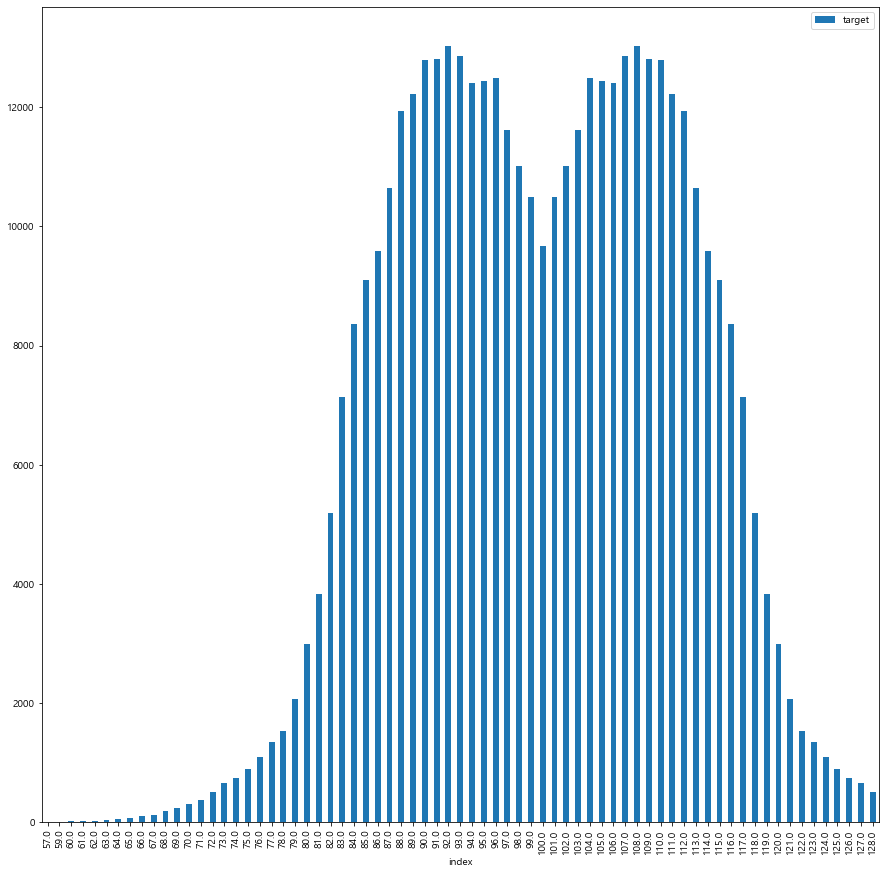

In [402]:
plt.rcParams["figure.figsize"] = (15, 15)
df_woman_sampling['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [403]:
df_woman_sampling['target'].value_counts().reset_index().sort_values('index')

,index,target
69,57.0,2
70,59.0,1
68,60.0,16
67,61.0,18
66,62.0,30
65,63.0,43
64,64.0,51
63,65.0,77
62,66.0,111
61,67.0,132


# 나이별 확인하기

In [404]:
# df_woman['검진당시나이'].value_counts()

In [405]:
# int(df_woman['검진당시나이'].value_counts().mean())

In [406]:
# df_woman['검진당시나이'].min()

In [407]:
# df_woman['검진당시나이'].max()

In [408]:
# df_woman.columns

In [409]:
# df_temp = None
# # sample_len = int(df_woman['검진당시나이'].value_counts().mean())
# # sample_len = 500
                 
# for age in range(df_woman['검진당시나이'].min(), df_woman['검진당시나이'].max()):
#     temp_ = df_woman[df_woman['검진당시나이'] == age].sample(n = sample_len, replace=True)
# #     df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(temp))
# #     print(df_impute.columns)
# #     df_impute.columns = df_man.columns
    
# #     np_imputed = mice(temp.values)
# #     np_imputed = fast_knn(temp.values, k=5)
# #     df_impute = pd.DataFrame(np_immputed)
# #     temp = df_impute
    
#     df_temp = pd.concat([df_temp, temp_])

In [410]:
# df_temp.info()

In [411]:
# df_temp.reset_index(drop=True, inplace=True)

In [412]:
# df_woman = df_temp.copy()

In [413]:
# df_woman['검진당시나이'].value_counts()

In [414]:
# df_woman[df_woman['검진당시나이']==20]

In [415]:
# df_woman[df_woman['검진당시나이']==20]['UID'].value_counts()

# model train

In [416]:
# train_columns = ['공복시혈당', '당화혈색소', '체질량지수', '허리둘레', '신장', '체중']
# train_columns = ['공복시혈당', '당화혈색소', '체질량지수', '허리둘레', '체중']

In [417]:
train_columns

['검진당시나이', '알부민', '총단백 (T-Protein)', '글로블린', '요산(Uric acid)']

In [418]:
# target_col = '검진당시나이'

In [419]:
target_col

'target'

## Min Max Scaling

In [420]:
from sklearn.preprocessing import MinMaxScaler

In [421]:
scaling_bool

False

In [422]:
if scaling_bool:
    scaler = MinMaxScaler()
    data_scaler = scaler.fit_transform(df_woman_sampling[train_columns])
    df_woman_scaled = pd.DataFrame(data=data_scaler, columns=train_columns)

In [423]:
if scaling_bool:
    X_train2, X_test2, y_train2, y_test2 = train_test_split(df_woman_scaled[train_columns], df_woman_sampling[target_col], test_size=0.25, random_state=87)
else:
    X_train2, X_test2, y_train2, y_test2 = train_test_split(df_woman_sampling[train_columns], df_woman_sampling[target_col], test_size=0.25, random_state=87)

## Linear Regression

In [424]:
# model2 = LinearRegression()

In [425]:
# model2.fit(X_train2, y_train2)

In [426]:
# model2.intercept_

In [427]:
# model2.coef_

## Randomized SearchCV, 파라미터 튜닝

In [428]:
model2 = XGBRegressor()

In [429]:
# A parameter grid for XGBoost
params = {
    'n_estimators':[500],
#     'min_child_weight':[4,5], 
#     'gamma':[i/10.0 for i in range(3,6)],  
#     'subsample':[i/10.0 for i in range(6,11)],
#     'colsample_bytree':[i/10.0 for i in range(6,11)], 
#     'max_depth': [2,3,4,6,7],
    'objective': ['reg:squarederror', 'reg:tweedie'],
    'booster': ['gbtree', 'gblinear'],
    'eval_metric': ['rmse'],
    'eta': [i/10.0 for i in range(3,6)],
}

In [430]:
# run randomized search
n_iter_search = 10

random_search = RandomizedSearchCV(model2, param_distributions=params,
                                   n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error')

In [431]:
import time
start = time.time()
random_search.fit(X_train2, y_train2)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))# best parameter

RandomizedSearchCV took 1530.65 seconds for 10 candidates parameter settings.


In [432]:
# best parameter
random_search.best_params_

{'objective': 'reg:squarederror',
 'n_estimators': 500,
 'eval_metric': 'rmse',
 'eta': 0.5,
 'booster': 'gbtree'}

In [433]:
# best score
random_search.best_score_

-0.4601037384504932

In [434]:
model2 = random_search.best_estimator_
model2

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.5,
             eval_metric='rmse', gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.5, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=8,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

## Keras

In [435]:
# def build_model():
#     model = keras.Sequential([
#         layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
#         layers.Dense(64, activation='relu'),
#         layers.Dense(16, activation='relu'),
#         layers.Dense(4, activation='relu'),
#         layers.Dense(1)
#     ])

#     optimizer = keras.optimizers.RMSprop(0.001)
    
#     model.compile(loss='mse',
#                 optimizer=optimizer,
#                 metrics=['mae', 'mse'])
    
#     return model

In [436]:
# model = build_model()

In [437]:
# # 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
# class PrintDot(keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs):
#         if epoch % 10 == 0: print('')
#         print('.', end='')

# EPOCHS = 100

# # patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
# early_stop = EarlyStopping(monitor='val_loss', patience=10)

# history = model.fit(
#     X_train, y_train,
#     epochs=EPOCHS, validation_split=0.2, verbose=0,
#     callbacks=[early_stop, PrintDot()])
# #     callbacks=[PrintDot()])

In [438]:
# model.summary()

In [439]:
# hist = pd.DataFrame(history.history)
# hist['epoch'] = history.epoch
# hist.tail()

In [440]:
# def plot_history(history):
#     hist = pd.DataFrame(history.history)
#     hist['epoch'] = history.epoch

#     plt.figure(figsize=(8,12))

#     plt.subplot(2,1,1)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Abs Error [MPG]')
#     plt.plot(hist['epoch'], hist['mae'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
# #     plt.ylim([0,5])
#     plt.legend()

#     plt.subplot(2,1,2)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Square Error [$MPG^2$]')
#     plt.plot(hist['epoch'], hist['mse'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
# #     plt.ylim([0,20])
#     plt.legend()
#     plt.show()

In [441]:
# plot_history(history)

## pyTorch 신경망

In [442]:
np.shape(X_train)[1]

5

In [443]:
# class Regressor(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.fc1 = nn.Linear(np.shape(X_train)[1], 100) #첫 번째 레이어 
#         self.fc2 = nn.Linear(100, 50) #두 번째 레이어
#         self.fc3 = nn.Linear(50, 1) #출력 레이어 
# #         self.dropout = nn.Dropout(0.5) #연산 마다 50%의 노드를 랜덤하게 없앤다
# #         self.relu = nn.ReLU()
        
#     def forward(self, x):
#         x = F.relu(self.fc1(x)) #활성화 함수 적용                 
# #         x = self.dropout(F.relu(self.fc2(x))) #은닉층에서 전달할 때, 50% 를 dropout 
#         x = F.relu(self.fc2(x)) #활성화 함수 적용 
#         x = F.relu(self.fc3(x))
# #         x = self.fc1(x)
# #         x = self.fc2(x)
# #         x = self.fc3(x)
# #         x = self.relu(x)
#         return x

In [444]:
# model = Regressor()
# reg_loss = nn.MSELoss()
# # optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-7)
# optimizer = optim.Adam(model.parameters(), lr=0.001)

In [445]:
# epochs = 1000

In [446]:
# X_train  = torch.Tensor(X_train.to_numpy())
# X_test  = torch.Tensor(X_test.to_numpy())
# y_train  = torch.Tensor(y_train.to_numpy().reshape(-1, 1))
# y_test  = torch.Tensor(y_test.to_numpy().reshape(-1, 1))

In [447]:
# losses = []

# # 총 100번의 에포크 동안 모델 학습
# for epoch in range(epochs):
#     optimizer.zero_grad()      # 옵티마이저의 기울기 초기화
#     y_pred = model(X_train)          # 순전파 연산으로 예측값 계산
#     loss = reg_loss(y_pred, y_train)  # 손실 함수로 비용 계산
#     loss.backward()            # 역전파 연산으로 기울기 계산
#     optimizer.step()           # 옵티마이저를 통해 파라미터 업데이트

#     # 10번째 에포크마다 현재 에포크와 손실 값 출력
#     if epoch % 100 == 0:
#         print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, epochs, loss.item()))

#     # 손실 값을 리스트에 추가하여 추적
#     losses.append(loss.item())

In [448]:
# plt.plot(losses)

## coef 계산

In [449]:
# df_coef2 = pd.concat([pd.DataFrame(train_columns).reset_index(drop=True), pd.DataFrame(model2.coef_).reset_index(drop=True)], axis=1)

In [450]:
# df_coef2.columns = ['검사항목', 'coef']

In [451]:
# df_coef2['coef'] = df_coef2['coef'].round(4)

In [452]:
# df_coef2['abs_coef'] = df_coef2['coef'].abs()

In [453]:
# df_coef2.sort_values('abs_coef', ascending=False)

## Linear Regression Poly

In [454]:
# from sklearn.preprocessing import PolynomialFeatures
# poly2 = PolynomialFeatures(degree=1, include_bias=False)

In [455]:
# X_train2_poly = poly2.fit_transform(X_train2)
# X_test2_poly = poly2.fit_transform(X_test2)

In [456]:
# slr2 = LinearRegression()

In [457]:
# slr2.fit(X_train2_poly, y_train2)

In [458]:
# np.shape(X_train2)

In [459]:
# np.shape(X_train2_poly)

In [460]:
# np.shape(X_test2)

In [461]:
# np.shape(X_test2_poly)

In [462]:
# y_pred2_poly = slr2.predict(X_test2_poly)

In [463]:
# '''
# 성능 평가
# '''
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(y_test2, y_pred2_poly))
# # MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
# print('MSE :', mean_squared_error(y_test2, y_pred2_poly))
# #  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
# print('RMSE :', np.sqrt(mean_squared_error(y_test2, y_pred2_poly)))

In [464]:
# from sklearn.metrics import r2_score
# r2_score(y_test2, y_pred2_poly)

# model save

In [465]:
import pickle
with open(model_path_woman,'wb') as f:
    pickle.dump(model2, f)

In [466]:
import pickle
with open(model_path_woman, 'rb') as f:
    model2 = pickle.load(f)

# 성능 평가

## pyTorch 예측

In [467]:
if pyTorch_bool:
    # Get predictions, 
    with torch.no_grad():
        model2.eval()
        y_pred2 = model2(X_test2)
        y_pred2 = y_pred2.numpy()

## XGBRegressor

In [468]:
if XGB_bool:
    y_pred2 = model2.predict(X_test2)

In [469]:
'''
성능 평가
'''
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(y_test2, y_pred2))
# MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
print('MSE :', mean_squared_error(y_test2, y_pred2))
#  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
print('RMSE :', np.sqrt(mean_squared_error(y_test2, y_pred2)))

MAE : 0.4318521388150784
MSE : 0.44744910444465497
RMSE : 0.6689163658071575


In [470]:
from sklearn.metrics import r2_score
r2_score(y_test2, y_pred2)

0.9965314580434709

In [471]:
model2.score(X_test2, y_test2)

0.9965314580434709

## feature importance

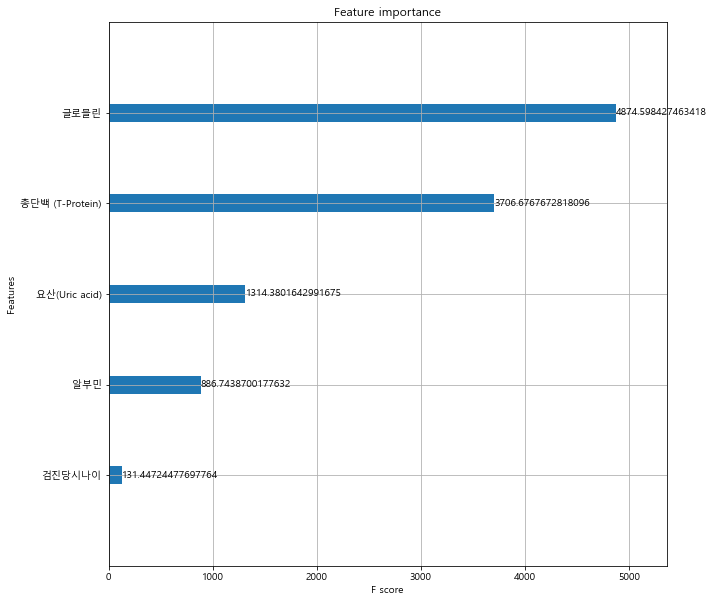

In [472]:
if XGB_bool:
    plt.rcParams["figure.figsize"] = (10, 10)
    xgboost.plot_importance(model2, importance_type='gain')

In [473]:
model2.feature_importances_

array([0.01204408, 0.08124944, 0.33963063, 0.4466435 , 0.12043234],
      dtype=float32)

In [474]:
df_feature2 = pd.concat([pd.DataFrame(train_columns), pd.DataFrame(model2.feature_importances_)], axis=1)
df_feature2.columns = ['columns', 'feature_importance']

In [475]:
df_feature2.sort_values('feature_importance', ascending=False)

,columns,feature_importance
3,글로블린,0.446644
2,총단백 (T-Protein),0.339631
4,요산(Uric acid),0.120432
1,알부민,0.081249
0,검진당시나이,0.012044


# 실제나이 - 예측나이 결과

In [476]:
df_test2 = pd.concat([pd.DataFrame(y_test2).reset_index(drop=True), pd.DataFrame(y_pred2).reset_index(drop=True)], axis=1)

In [477]:
df_test2.head()

,target,0
0,105.0,105.025650
1,107.0,106.542603
2,76.0,76.030296
3,117.0,116.914841
4,106.0,105.622833


In [478]:
df_test2.columns

Index(['target', 0], dtype='object')

In [479]:
df_test2.columns = ['실제지수', '예측지수']

In [480]:
df_test2['diff'] = df_test2['예측지수'] - df_test2['실제지수']

In [481]:
df_test2.head()

,실제지수,예측지수,diff
0,105.0,105.025650,0.025650
1,107.0,106.542603,-0.457397
2,76.0,76.030296,0.030296
3,117.0,116.914841,-0.085159
4,106.0,105.622833,-0.377167


In [482]:
df_test2['diff_int'] = df_test2['diff'].round(0)

In [483]:
len(df_test2)

108744

In [484]:
df_test2.head()

,실제지수,예측지수,diff,diff_int
0,105.0,105.025650,0.025650,0.0
1,107.0,106.542603,-0.457397,-0.0
2,76.0,76.030296,0.030296,0.0
3,117.0,116.914841,-0.085159,-0.0
4,106.0,105.622833,-0.377167,-0.0


<AxesSubplot:>

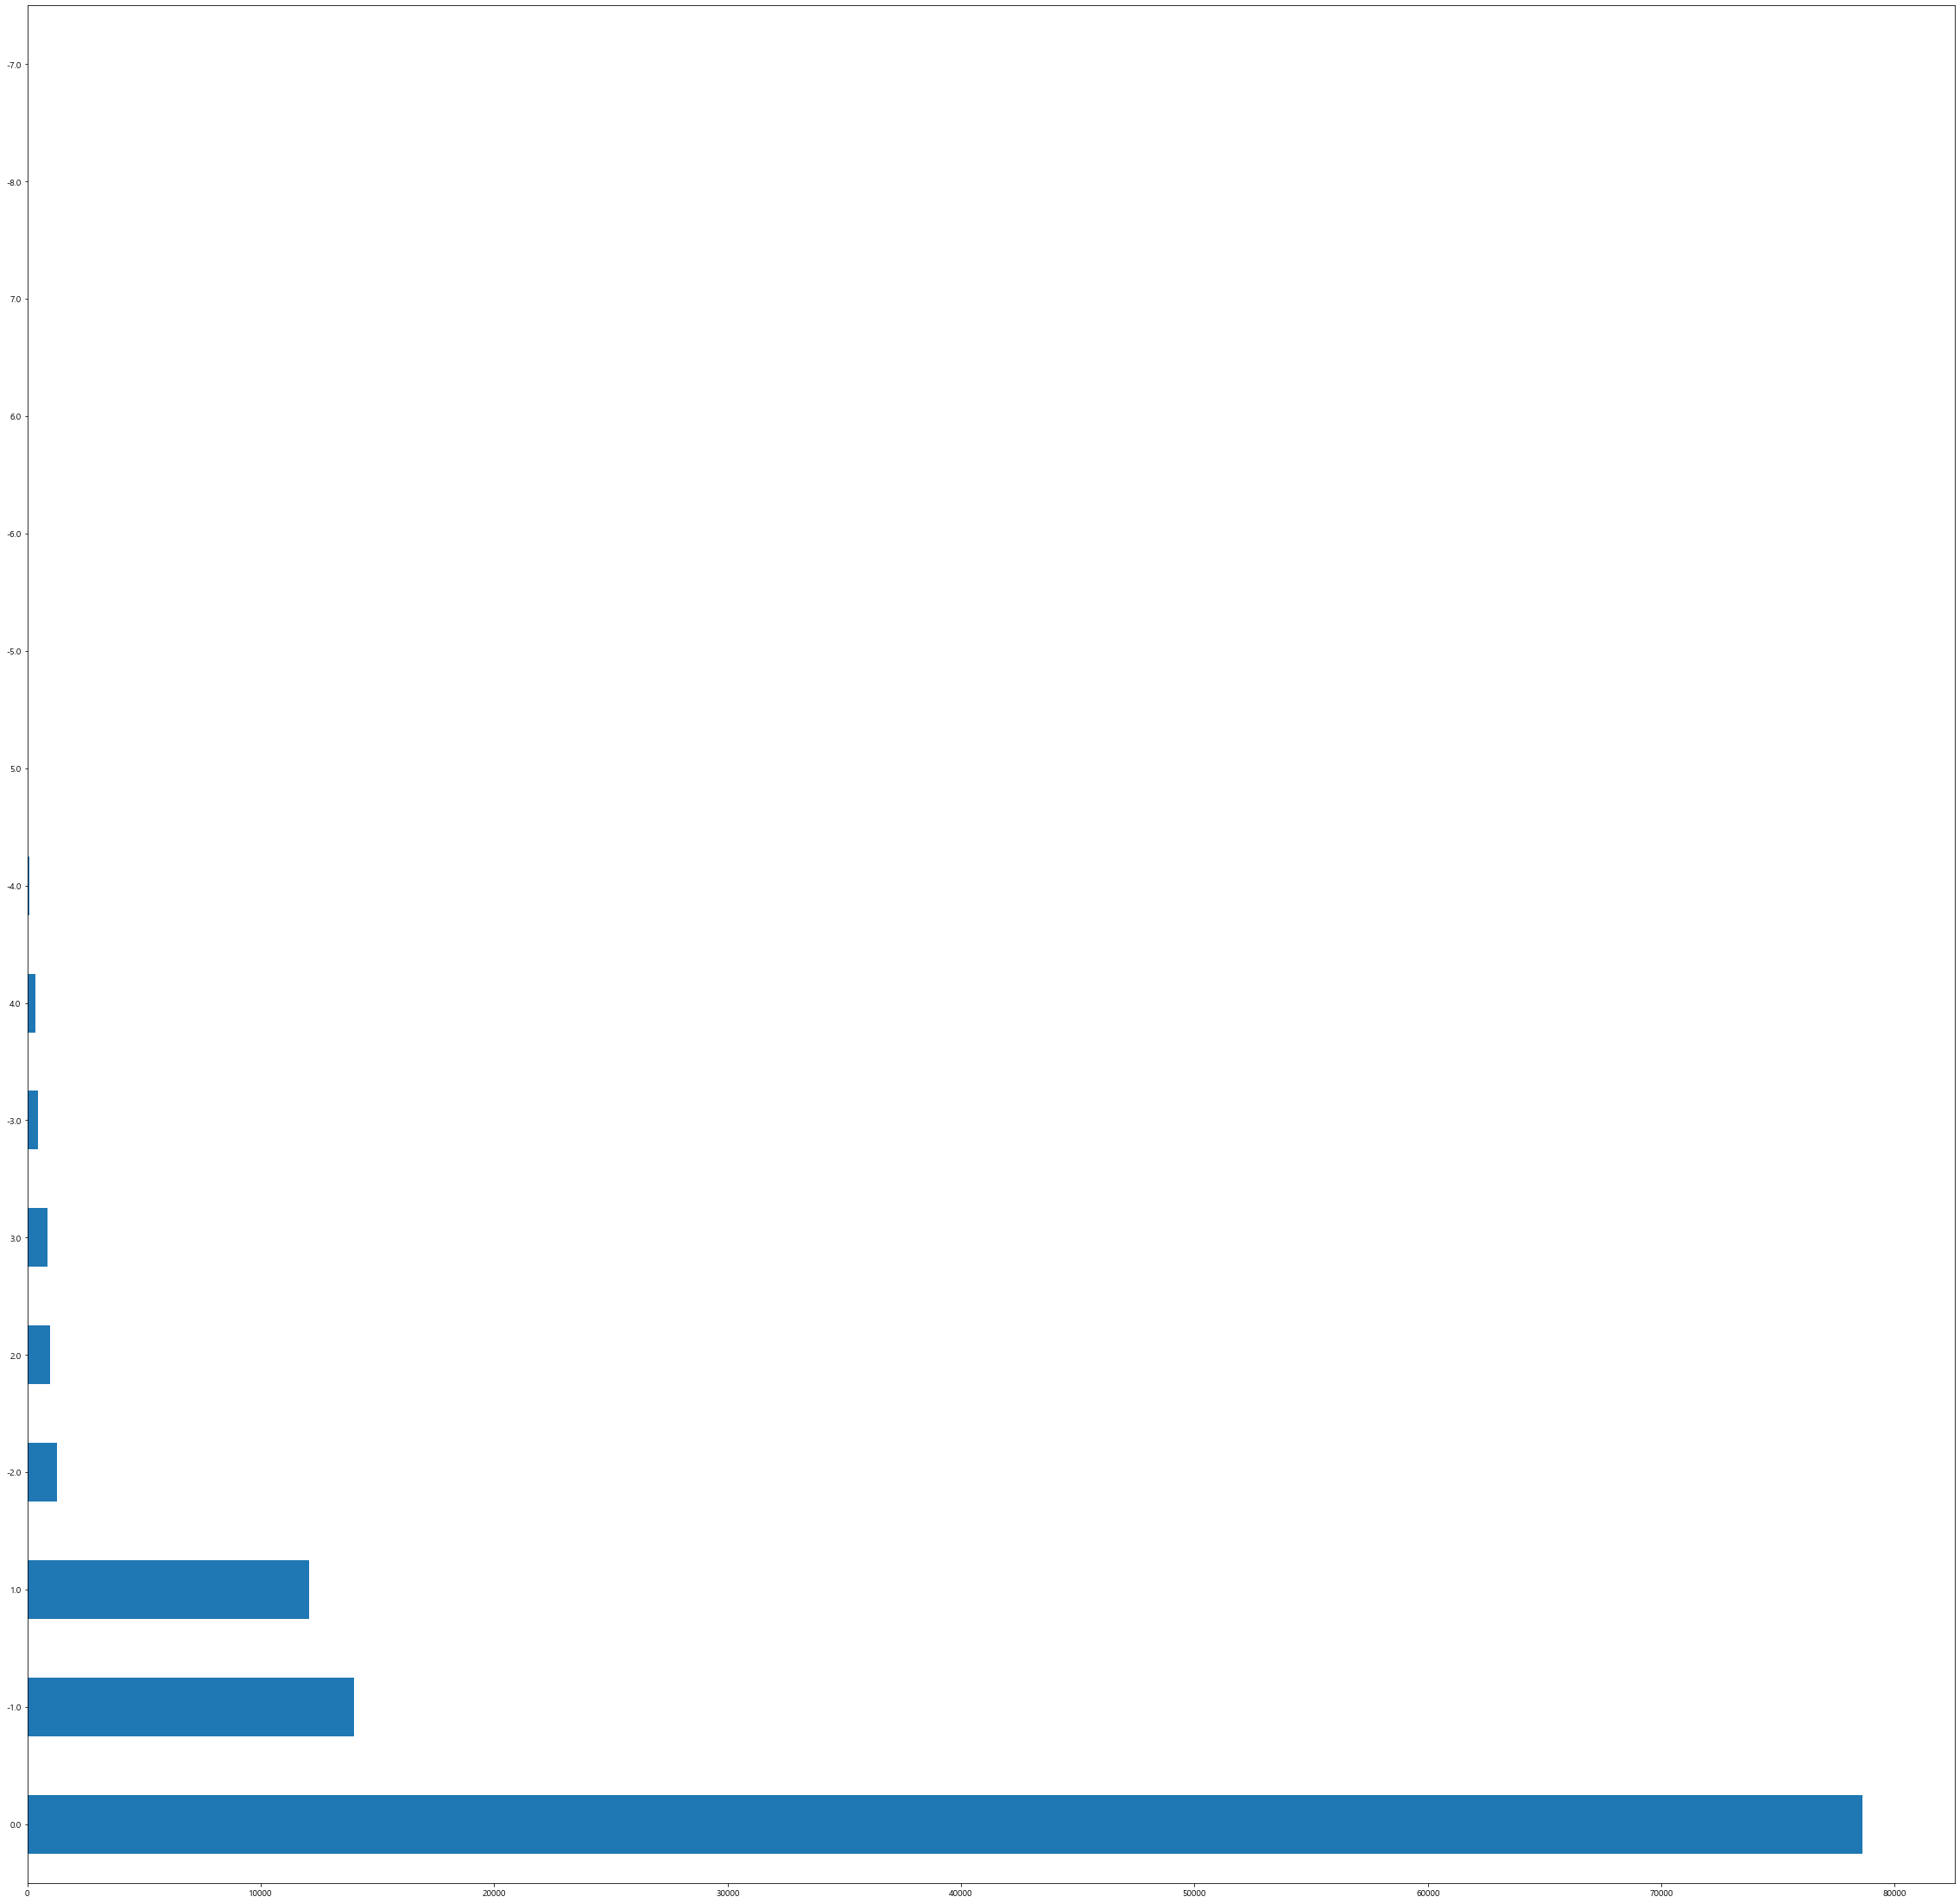

In [485]:
plt.figure(figsize=(40, 40))
df_test2['diff_int'].value_counts().plot(kind='barh')
# plt.savefig('./output/png/숙취나이_결측치제거_20대_여자.png')

# 예측 나이 분포

In [486]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model2.eval()
        X_train_pred2 = model2(X_train2)
        X_train_pred2 = X_train_pred2.numpy()

    df_train2 = pd.DataFrame(X_train_pred2).reset_index(drop=True)
    y_test2 = pd.DataFrame(y_test2.numpy())

In [487]:
if XGB_bool:
    df_train2 = pd.DataFrame(model2.predict(X_train2)).reset_index(drop=True)

In [488]:
df_train2 = pd.DataFrame(model2.predict(X_train2)).reset_index(drop=True)

In [489]:
df_train2.round(0).value_counts()

107.0    9816
93.0     9799
109.0    9731
91.0     9665
108.0    9660
92.0     9637
110.0    9626
90.0     9592
94.0     9463
106.0    9369
105.0    9369
96.0     9320
95.0     9207
104.0    9143
89.0     9124
88.0     9045
111.0    8992
112.0    8979
97.0     8849
103.0    8643
102.0    8256
98.0     8131
113.0    8078
87.0     8043
101.0    7954
99.0     7910
114.0    7431
100.0    7164
86.0     7116
115.0    7006
85.0     6743
116.0    6250
84.0     6216
83.0     5312
117.0    5293
82.0     4013
118.0    3839
119.0    2944
81.0     2913
80.0     2214
120.0    2131
79.0     1529
121.0    1480
122.0    1160
78.0     1125
77.0      980
123.0     915
124.0     827
76.0      768
75.0      694
125.0     660
74.0      590
126.0     567
127.0     512
73.0      461
72.0      390
128.0     381
71.0      278
70.0      235
69.0      180
68.0      149
67.0      110
66.0       82
65.0       55
64.0       34
63.0       29
62.0       24
61.0       16
60.0       12
57.0        2
59.0        1
dtype:

In [490]:
y_test2.value_counts()

92.0     3257
108.0    3256
91.0     3255
107.0    3220
110.0    3203
109.0    3190
90.0     3181
94.0     3140
95.0     3130
105.0    3128
96.0     3120
111.0    3119
104.0    3108
93.0     3100
106.0    3070
89.0     3051
88.0     2948
112.0    2942
103.0    2918
97.0     2907
102.0    2780
98.0     2747
87.0     2709
99.0     2629
113.0    2617
101.0    2609
100.0    2477
114.0    2398
86.0     2379
85.0     2307
115.0    2196
84.0     2157
116.0    2050
117.0    1793
83.0     1760
118.0    1324
82.0     1280
119.0     955
81.0      949
120.0     781
80.0      758
121.0     526
79.0      498
78.0      396
122.0     380
77.0      344
123.0     319
76.0      288
124.0     287
125.0     225
75.0      212
74.0      186
126.0     180
73.0      175
127.0     154
72.0      148
128.0     131
71.0       93
70.0       81
69.0       61
68.0       40
67.0       29
66.0       27
65.0       25
64.0       16
63.0       11
62.0        7
60.0        5
61.0        2
Name: target, dtype: int64

In [491]:
df_plot = pd.DataFrame(y_test2.value_counts())

In [492]:
df_plot.columns = ['count']

In [493]:
df_plot.reset_index(inplace=True)

In [494]:
df_plot = df_plot.sort_values('index', ascending=True)

In [495]:
df_plot.set_index('index', inplace=True)

<AxesSubplot:xlabel='index'>

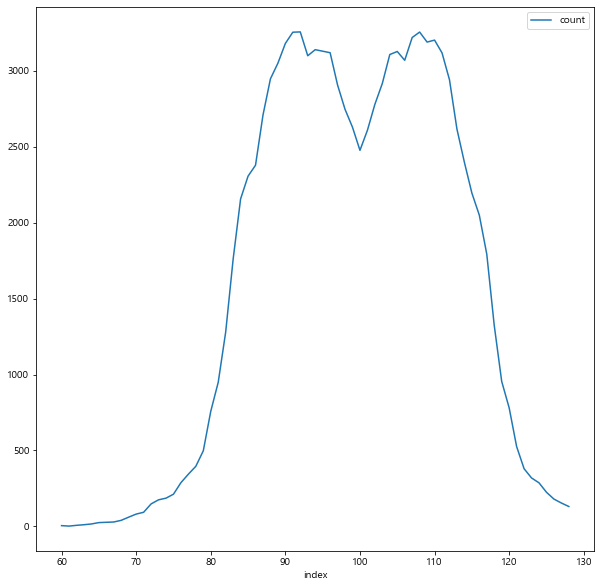

In [496]:
df_plot.plot()

In [497]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model2.eval()
        X_test_pred2 = model2(X_test2)
        X_test_pred2 = X_test_pred2.numpy()
    df_test2 = pd.DataFrame(X_test_pred2).reset_index(drop=True)

In [498]:
if XGB_bool:
    df_test2 = pd.DataFrame(model2.predict(X_test2)).reset_index(drop=True)

In [499]:
df_test2.round(0).value_counts()

107.0    3347
91.0     3283
92.0     3253
109.0    3223
110.0    3193
90.0     3192
94.0     3189
108.0    3180
105.0    3111
95.0     3105
93.0     3101
106.0    3086
97.0     3051
111.0    3043
104.0    3040
89.0     3034
96.0     2990
88.0     2971
103.0    2953
112.0    2951
102.0    2797
87.0     2748
98.0     2725
99.0     2670
101.0    2633
113.0    2624
114.0    2477
100.0    2366
86.0     2360
115.0    2262
85.0     2247
84.0     2183
116.0    2024
117.0    1793
83.0     1739
118.0    1288
82.0     1283
119.0    1001
81.0      984
120.0     744
80.0      734
121.0     507
79.0      491
122.0     376
78.0      368
77.0      361
124.0     289
123.0     281
76.0      263
75.0      233
125.0     224
74.0      195
126.0     180
73.0      162
127.0     154
72.0      146
128.0     131
71.0       99
70.0       81
69.0       57
68.0       44
67.0       33
66.0       31
65.0       23
63.0       13
64.0       11
62.0        7
60.0        3
61.0        2
59.0        1
dtype: int64

In [500]:
df_plot2 = pd.DataFrame(df_test2.round(0).value_counts())

In [501]:
df_plot2.columns = ['count']

In [502]:
df_plot2.reset_index(inplace=True)

In [503]:
df_plot2

,0,count
0,107.0,3347
1,91.0,3283
2,92.0,3253
3,109.0,3223
4,110.0,3193
5,90.0,3192
6,94.0,3189
7,108.0,3180
8,105.0,3111
9,95.0,3105


In [504]:
df_plot2 = df_plot2.sort_values(0, ascending=True)

In [505]:
df_plot2.set_index(0, inplace=True)

In [506]:
df_plot2

,count
0,
59.0,1
60.0,3
61.0,2
62.0,7
63.0,13
64.0,11
65.0,23
66.0,31
67.0,33


<AxesSubplot:xlabel='0'>

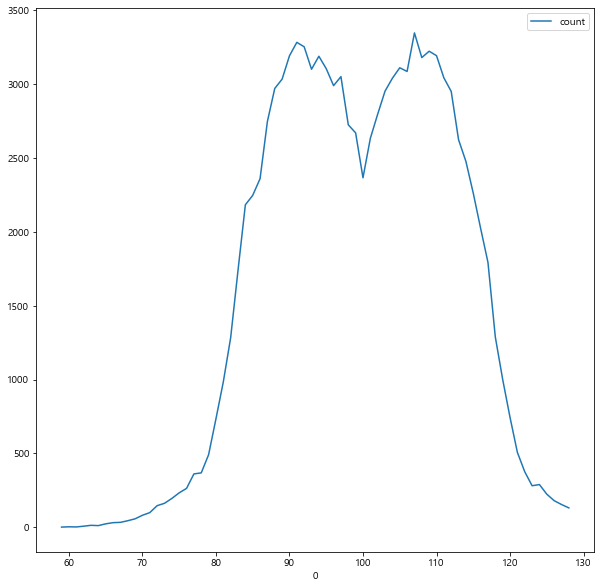

In [507]:
df_plot2.plot()

# 시각화

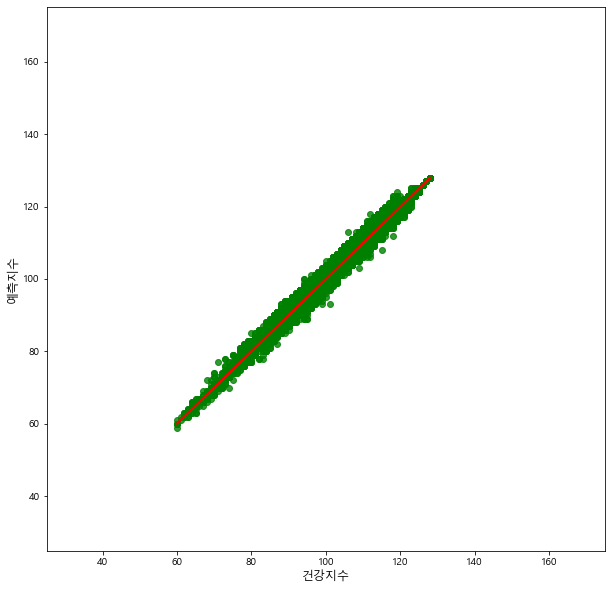

In [508]:
plt.rcParams["figure.figsize"] = (10, 10)
df_scatter = pd.concat([pd.DataFrame(y_test2).reset_index(drop=True), df_test2.round(0)], axis = 1)
df_scatter.columns = ['건강지수', '예측지수']

import seaborn as sns

# plt.figure(figsize=(10, 10))
# plt.scatter(df_scatterx='나이', y='예측나이', s=9, cmap='Reds', color='green', trendline="ols")
# plt.colorbar()
# sns.scatterplot(x=df_scatter['나이'], y=df_scatter['예측나이'], color='green')
sns.regplot(x=df_scatter['건강지수'], y=df_scatter['예측지수'], scatter_kws={'color':'green'}, line_kws={'color':'red'})
plt.xlabel('건강지수', fontsize=12)
plt.ylabel('예측지수', fontsize=12)
plt.xlim([25, 175])
plt.ylim([25, 175])
plt.show()

# 여성 데이터 전체 계산

In [509]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid),알부민_kde,총단백 (T-Protein)_kde,글로블린_kde,요산(Uric acid)_kde,kde_mean,target
0,2021,53,2632765,2,26,4.8,7.2,2.4,4.3,125.95,146.81,118.00,141.89,133.81,117.0
1,2024,53,2658222,2,29,4.5,7.1,2.6,5.2,102.79,149.99,150.00,115.25,128.88,114.0
2,2020,54,497669,2,30,4.1,7.0,2.9,4.8,39.92,134.36,116.64,140.81,103.77,102.0
3,2022,54,1319859,2,32,4.1,6.8,2.7,4.4,42.43,103.34,135.00,150.00,100.73,100.0
4,2023,54,2039511,2,33,4.1,6.4,2.3,4.4,40.22,30.10,94.07,148.70,69.65,85.0


In [510]:
df_woman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333322 entries, 0 to 333321
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   검진년도                 333322 non-null  int64  
 1   UID                  333322 non-null  int64  
 2   CU_REC_ID            333322 non-null  int64  
 3   SEX                  333322 non-null  int64  
 4   검진당시나이               333322 non-null  int64  
 5   알부민                  333322 non-null  float64
 6   총단백 (T-Protein)      333322 non-null  float64
 7   글로블린                 333322 non-null  float64
 8   요산(Uric acid)        333322 non-null  float64
 9   알부민_kde              333322 non-null  float64
 10  총단백 (T-Protein)_kde  333322 non-null  float64
 11  글로블린_kde             333322 non-null  float64
 12  요산(Uric acid)_kde    333322 non-null  float64
 13  kde_mean             333322 non-null  float64
 14  target               333322 non-null  float64
dtypes: float64(10), i

In [511]:
df_woman[df_woman['UID'] == 196909]

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid),알부민_kde,총단백 (T-Protein)_kde,글로블린_kde,요산(Uric acid)_kde,kde_mean,target
72944,2021,196909,2495703,2,28,4.8,7.9,3.1,4.8,143.93,41.81,67.75,136.79,96.63,98.0
72945,2023,196909,2495700,2,30,4.7,7.8,3.1,4.6,114.03,50.61,73.26,149.29,93.90,97.0
72946,2024,196909,2495697,2,31,4.7,7.8,3.1,4.3,120.12,46.32,59.73,147.42,91.36,96.0


In [512]:
if scaling_bool:
    df_pred2 = df_woman_scaled.copy()
else:
    df_pred2 = df_woman.copy()

In [513]:
len(df_pred2)

333322

In [514]:
df_pred2.reset_index(drop=True, inplace=True)

In [515]:
X_test2

,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid)
250413,31,4.7,7.3,2.60,7.0
14733,32,5.0,7.5,2.50,6.7
172458,46,3.9,6.2,2.30,4.9
42224,30,4.9,7.4,2.67,4.4
16099,45,4.4,7.3,2.90,3.2
...,...,...,...,...,...
164978,36,4.9,7.7,2.80,5.4
116097,29,4.6,6.6,2.00,5.4
141562,57,4.3,6.7,2.40,3.3
266447,38,4.2,6.9,2.70,4.1


In [516]:
df_pred2.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '알부민', '총단백 (T-Protein)',
       '글로블린', '요산(Uric acid)', '알부민_kde', '총단백 (T-Protein)_kde', '글로블린_kde',
       '요산(Uric acid)_kde', 'kde_mean', 'target'],
      dtype='object')

In [517]:
df_pred2[train_columns]

,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid)
0,26,4.8,7.2,2.4,4.3
1,29,4.5,7.1,2.6,5.2
2,30,4.1,7.0,2.9,4.8
3,32,4.1,6.8,2.7,4.4
4,33,4.1,6.4,2.3,4.4
...,...,...,...,...,...
333317,47,4.8,7.5,2.7,4.1
333318,50,5.0,7.8,2.8,5.7
333319,57,4.5,7.7,3.2,4.7
333320,35,5.0,7.7,2.7,3.6


In [518]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model2.eval()
        pred_data2 = model2(torch.Tensor(df_pred2[train_columns].to_numpy()))
        pred_data2 = pred_data2.numpy()

In [519]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data2 = model2.predict(df_pred2[train_columns])

In [520]:
pred_data2

array([116.93609 , 114.28059 , 101.92815 , ...,  93.00807 , 111.30245 ,
        88.068535], dtype=float32)

In [521]:
df_output2 = pd.concat([df_pred2, pd.DataFrame(pred_data2, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [522]:
if scaling_bool:
    df_output2 = pd.concat([df_woman[['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']], df_output2], axis=1)

In [523]:
df_output2.head(10)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid),알부민_kde,총단백 (T-Protein)_kde,글로블린_kde,요산(Uric acid)_kde,kde_mean,target,예측지수
0,2021,53,2632765,2,26,4.8,7.2,2.4,4.3,125.95,146.81,118.00,141.89,133.81,117.0,116.936089
1,2024,53,2658222,2,29,4.5,7.1,2.6,5.2,102.79,149.99,150.00,115.25,128.88,114.0,114.280586
2,2020,54,497669,2,30,4.1,7.0,2.9,4.8,39.92,134.36,116.64,140.81,103.77,102.0,101.928146
3,2022,54,1319859,2,32,4.1,6.8,2.7,4.4,42.43,103.34,135.00,150.00,100.73,100.0,100.496689
4,2023,54,2039511,2,33,4.1,6.4,2.3,4.4,40.22,30.10,94.07,148.70,69.65,85.0,84.886414
5,2024,54,2750990,2,34,4.5,7.1,2.6,4.9,100.00,149.84,150.00,119.56,128.86,114.0,114.631187
6,2022,56,1351361,2,33,4.1,6.5,2.4,4.2,40.22,49.50,124.48,149.02,81.62,91.0,90.491302
7,2023,56,2032999,2,34,4.5,7.1,2.6,4.7,100.00,149.84,150.00,137.76,132.50,116.0,116.294952
8,2021,59,701026,2,29,4.3,7.1,2.8,4.5,80.26,149.99,118.98,148.48,122.57,111.0,108.935867
9,2022,59,1376992,2,30,4.3,6.9,2.6,4.0,75.03,127.70,150.00,116.94,114.21,107.0,107.500648


## 예측지수 성능평가

In [524]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output2['target'], df_output2['예측지수'])

0.44326944423468184

# target으로 나이 계산

In [525]:
df_output2['예측나이'] = ((100 - df_output2['예측지수']) / 5) + df_output2['검진당시나이']
df_output2['예측나이'] = df_output2['예측나이'].round(2)

In [526]:
df_output2.head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid),알부민_kde,총단백 (T-Protein)_kde,글로블린_kde,요산(Uric acid)_kde,kde_mean,target,예측지수,예측나이
0,2021,53,2632765,2,26,4.8,7.20,2.40,4.3,125.95,146.81,118.00,141.89,133.81,117.0,116.936089,22.61
1,2024,53,2658222,2,29,4.5,7.10,2.60,5.2,102.79,149.99,150.00,115.25,128.88,114.0,114.280586,26.14
2,2020,54,497669,2,30,4.1,7.00,2.90,4.8,39.92,134.36,116.64,140.81,103.77,102.0,101.928146,29.61
3,2022,54,1319859,2,32,4.1,6.80,2.70,4.4,42.43,103.34,135.00,150.00,100.73,100.0,100.496689,31.90
4,2023,54,2039511,2,33,4.1,6.40,2.30,4.4,40.22,30.10,94.07,148.70,69.65,85.0,84.886414,36.02
5,2024,54,2750990,2,34,4.5,7.10,2.60,4.9,100.00,149.84,150.00,119.56,128.86,114.0,114.631187,31.07
6,2022,56,1351361,2,33,4.1,6.50,2.40,4.2,40.22,49.50,124.48,149.02,81.62,91.0,90.491302,34.90
7,2023,56,2032999,2,34,4.5,7.10,2.60,4.7,100.00,149.84,150.00,137.76,132.50,116.0,116.294952,30.74
8,2021,59,701026,2,29,4.3,7.10,2.80,4.5,80.26,149.99,118.98,148.48,122.57,111.0,108.935867,27.21
9,2022,59,1376992,2,30,4.3,6.90,2.60,4.0,75.03,127.70,150.00,116.94,114.21,107.0,107.500648,28.50


## 예측나이 성능평가

In [527]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output2['검진당시나이'], df_output2['예측나이'])

1.8385680213127245

# 최종 산출

In [528]:
df_output2.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid),알부민_kde,총단백 (T-Protein)_kde,글로블린_kde,요산(Uric acid)_kde,kde_mean,target,예측지수,예측나이
0,2021,53,2632765,2,26,4.8,7.2,2.4,4.3,125.95,146.81,118.00,141.89,133.81,117.0,116.936089,22.61
1,2024,53,2658222,2,29,4.5,7.1,2.6,5.2,102.79,149.99,150.00,115.25,128.88,114.0,114.280586,26.14
2,2020,54,497669,2,30,4.1,7.0,2.9,4.8,39.92,134.36,116.64,140.81,103.77,102.0,101.928146,29.61
3,2022,54,1319859,2,32,4.1,6.8,2.7,4.4,42.43,103.34,135.00,150.00,100.73,100.0,100.496689,31.90
4,2023,54,2039511,2,33,4.1,6.4,2.3,4.4,40.22,30.10,94.07,148.70,69.65,85.0,84.886414,36.02


# DataMart csv

In [529]:
df_copy = df.copy()

In [530]:
df_copy.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid)
0,2010,7282,2520,1,42,4.4,7.6,NaN,6.9
1,2010,7490,3638,1,39,4.5,6.9,2.4,5.3
2,2010,7915,3997,1,36,4.3,7.3,3.0,5.4
3,2010,8056,4745,1,42,4.7,7.2,2.5,7.5
4,2010,8457,3929,1,38,4.5,7.6,3.1,6.1


In [531]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 9 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   검진년도             1213899 non-null  int64  
 1   UID              1213899 non-null  int64  
 2   CU_REC_ID        1213899 non-null  int64  
 3   SEX              1213899 non-null  int64  
 4   검진당시나이           1213899 non-null  int64  
 5   알부민              1111635 non-null  float64
 6   총단백 (T-Protein)  1111245 non-null  float64
 7   글로블린             962998 non-null   float64
 8   요산(Uric acid)    1096571 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 83.4 MB


In [532]:
minimums

[3.800000000000001, 6.000000000000001, 1.65, 1.4]

In [533]:
maximums

[5.399999999999999, 8.399999999999999, 3.65, 9.88]

In [534]:
train_columns

['검진당시나이', '알부민', '총단백 (T-Protein)', '글로블린', '요산(Uric acid)']

In [535]:
target_cols

['알부민', '총단백 (T-Protein)', '글로블린', '요산(Uric acid)']

In [536]:
for idx, col in enumerate(target_cols):
    df_copy.loc[df_copy[col] < minimums[idx], col] = minimums[idx]
    df_copy.loc[df_copy[col] > maximums[idx], col] = maximums[idx]

In [537]:
df_woman_csv = df_copy[df_copy['SEX'] == 2]
len(df_woman_csv)

448440

In [538]:
df_woman_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid)
10,2010,15894,2533,2,29,4.6,7.1,2.5,3.8
22,2010,42223,1364,2,24,4.6,7.6,3.0,4.1
37,2011,364096,6645,2,32,4.2,7.5,NaN,3.1
45,2010,120518,3595,2,30,4.5,7.3,2.8,4.3
63,2011,698706,6600,2,36,NaN,NaN,NaN,NaN


## 총단백 스크리닝

In [539]:
screening = 8.5

In [540]:
scr_col = '총단백 (T-Protein)'

In [541]:
df_woman_csv[df_woman_csv[scr_col] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid)
10,2010,15894,2533,2,29,4.6,7.1,2.5,3.8
22,2010,42223,1364,2,24,4.6,7.6,3.0,4.1
37,2011,364096,6645,2,32,4.2,7.5,NaN,3.1
45,2010,120518,3595,2,30,4.5,7.3,2.8,4.3
87,2010,167053,3087,2,26,4.0,6.4,2.4,4.7


In [542]:
len(df_woman_csv[df_woman_csv[scr_col] < screening])

407686

In [543]:
# df_woman_csv.loc[df_woman_csv[scr_col] < screening, scr_col] = screening

In [544]:
df_woman_csv[df_woman_csv[scr_col] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid)
10,2010,15894,2533,2,29,4.6,7.1,2.5,3.8
22,2010,42223,1364,2,24,4.6,7.6,3.0,4.1
37,2011,364096,6645,2,32,4.2,7.5,NaN,3.1
45,2010,120518,3595,2,30,4.5,7.3,2.8,4.3
87,2010,167053,3087,2,26,4.0,6.4,2.4,4.7


In [545]:
len(df_woman_csv[df_woman_csv[scr_col] < screening])

407686

## 글로블린 스크리닝

In [546]:
screening = 3.5

In [547]:
scr_col = '글로블린'

In [548]:
df_woman_csv[df_woman_csv[scr_col] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid)
10,2010,15894,2533,2,29,4.6,7.1,2.5,3.8
22,2010,42223,1364,2,24,4.6,7.6,3.0,4.1
45,2010,120518,3595,2,30,4.5,7.3,2.8,4.3
87,2010,167053,3087,2,26,4.0,6.4,2.4,4.7
245,2019,7687,1867229,2,42,4.6,7.2,2.6,4.3


In [549]:
len(df_woman_csv[df_woman_csv[scr_col] < screening])

346126

In [550]:
# df_woman_csv.loc[df_woman_csv[scr_col] < screening, scr_col] = screening

In [551]:
df_woman_csv[df_woman_csv[scr_col] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid)
10,2010,15894,2533,2,29,4.6,7.1,2.5,3.8
22,2010,42223,1364,2,24,4.6,7.6,3.0,4.1
45,2010,120518,3595,2,30,4.5,7.3,2.8,4.3
87,2010,167053,3087,2,26,4.0,6.4,2.4,4.7
245,2019,7687,1867229,2,42,4.6,7.2,2.6,4.3


In [552]:
len(df_woman_csv[df_woman_csv[scr_col] < screening])

346126

## 검진 항목 all 결측치 지우기

In [553]:
target_cols

['알부민', '총단백 (T-Protein)', '글로블린', '요산(Uric acid)']

In [554]:
df_woman_csv.dropna(subset=target_cols, how='all', inplace=True)

In [555]:
df_woman_csv.reset_index(drop=True, inplace=True)

In [556]:
len(df_woman_csv)

410278

## fillna

In [557]:
df_woman.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '알부민', '총단백 (T-Protein)',
       '글로블린', '요산(Uric acid)', '알부민_kde', '총단백 (T-Protein)_kde', '글로블린_kde',
       '요산(Uric acid)_kde', 'kde_mean', 'target'],
      dtype='object')

In [558]:
df_woman_csv.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '알부민', '총단백 (T-Protein)',
       '글로블린', '요산(Uric acid)'],
      dtype='object')

In [559]:
df_woman_csv.fillna(df_woman.mean().round(2), inplace=True)

## 모델 예측

In [560]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data2 = model2.predict(df_woman_csv[train_columns])

In [561]:
pred_data2 = pred_data2.round(0)

In [562]:
df_woman_csv = pd.concat([df_woman_csv, pd.DataFrame(pred_data2, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [563]:
df_woman_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid),예측지수
0,2010,15894,2533,2,29,4.6,7.1,2.50,3.8,113.0
1,2010,42223,1364,2,24,4.6,7.6,3.00,4.1,102.0
2,2011,364096,6645,2,32,4.2,7.5,2.68,3.1,90.0
3,2010,120518,3595,2,30,4.5,7.3,2.80,4.3,115.0
4,2010,167053,3087,2,26,4.0,6.4,2.40,4.7,84.0


### 성능 평가

In [564]:
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(df_woman_csv['target'], df_woman_csv['예측지수']))

In [565]:
# r2_score(df_woman_csv['target'], df_woman_csv['예측지수'])

## 예측나이 계산

In [566]:
df_woman_csv['예측나이'] = ((100 - df_woman_csv['예측지수']) / 5) + df_woman_csv['검진당시나이']
df_woman_csv['예측나이'] = df_woman_csv['예측나이'].round(2)

### 성능 평가

In [567]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(df_woman_csv['검진당시나이'], df_woman_csv['예측나이']))

MAE : 1.9851968665149005


In [568]:
r2_score(df_woman_csv['검진당시나이'], df_woman_csv['예측나이'])

0.9206081482110627

In [569]:
df_woman_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid),예측지수,예측나이
0,2010,15894,2533,2,29,4.6,7.1,2.50,3.8,113.0,26.4
1,2010,42223,1364,2,24,4.6,7.6,3.00,4.1,102.0,23.6
2,2011,364096,6645,2,32,4.2,7.5,2.68,3.1,90.0,34.0
3,2010,120518,3595,2,30,4.5,7.3,2.80,4.3,115.0,27.0
4,2010,167053,3087,2,26,4.0,6.4,2.40,4.7,84.0,29.2


In [570]:
df_woman_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410278 entries, 0 to 410277
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   검진년도             410278 non-null  int64  
 1   UID              410278 non-null  int64  
 2   CU_REC_ID        410278 non-null  int64  
 3   SEX              410278 non-null  int64  
 4   검진당시나이           410278 non-null  int64  
 5   알부민              410278 non-null  float64
 6   총단백 (T-Protein)  410278 non-null  float64
 7   글로블린             410278 non-null  float64
 8   요산(Uric acid)    410278 non-null  float64
 9   예측지수             410278 non-null  float32
 10  예측나이             410278 non-null  float64
dtypes: float32(1), float64(5), int64(5)
memory usage: 32.9 MB


# 최종 UID별 확인

In [571]:
# 성윤..
df_woman_csv[df_woman_csv['UID'] == 261581].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid),예측지수,예측나이
108399,2021,261581,806568,2,50,4.8,7.9,3.1,4.4,102.0,49.6
108407,2021,261581,2243879,2,50,4.8,7.9,3.1,4.4,102.0,49.6
108408,2021,261581,2418909,2,50,4.8,7.9,3.1,4.4,102.0,49.6
108409,2021,261581,2418910,2,50,4.8,7.9,3.1,4.4,102.0,49.6
169200,2022,261581,751339,2,51,4.6,7.2,2.6,4.1,117.0,47.6
169203,2022,261581,2243878,2,51,4.6,7.2,2.6,4.1,117.0,47.6
259147,2023,261581,1519764,2,52,4.5,7.5,3.0,5.2,102.0,51.6
259148,2023,261581,2243877,2,52,4.5,7.5,3.0,5.2,102.0,51.6
376120,2024,261581,2418911,2,53,4.3,6.7,2.4,3.9,96.0,53.8


In [572]:
# 차종..
df_woman_csv[df_woman_csv['UID'] == 477944].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid),예측지수,예측나이
54022,2022,477944,956268,2,31,4.5,6.5,2.0,4.1,89.0,33.2
200364,2022,477944,2212776,2,31,4.5,6.5,2.0,4.1,89.0,33.2
302670,2023,477944,1454346,2,32,4.5,7.0,2.5,4.2,114.0,29.2
302671,2023,477944,2212775,2,32,4.5,7.0,2.5,4.2,114.0,29.2
388460,2024,477944,2362855,2,33,4.9,7.9,3.0,4.9,106.0,31.8


In [573]:
# 성혜빈
df_woman_csv[df_woman_csv['UID'] == 896916].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,알부민,총단백 (T-Protein),글로블린,요산(Uric acid),예측지수,예측나이
327920,2023,896916,1459636,2,28,4.8,7.1,2.3,5.4,112.0,25.6
327909,2023,896916,1842092,2,28,4.8,7.1,2.3,5.4,112.0,25.6
327921,2023,896916,2031853,2,28,4.8,7.1,2.3,5.4,112.0,25.6
327922,2023,896916,2253054,2,28,4.8,7.1,2.3,5.4,112.0,25.6
322178,2023,896916,2257188,2,28,4.8,7.1,2.3,5.4,112.0,25.6
399266,2024,896916,2253058,2,29,4.1,6.5,2.4,5.3,87.0,31.6


# 최종 CSV 병합 Extract

In [574]:
len(df_man_csv)

706355

In [575]:
len(df_woman_csv)

410278

In [576]:
df_csv = pd.concat([df_man_csv, df_woman_csv])

In [577]:
df_csv.to_csv(csv_path)